<a href="https://colab.research.google.com/github/antoniogss/notebooks_guia_pratico_sc/blob/main/notebook_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

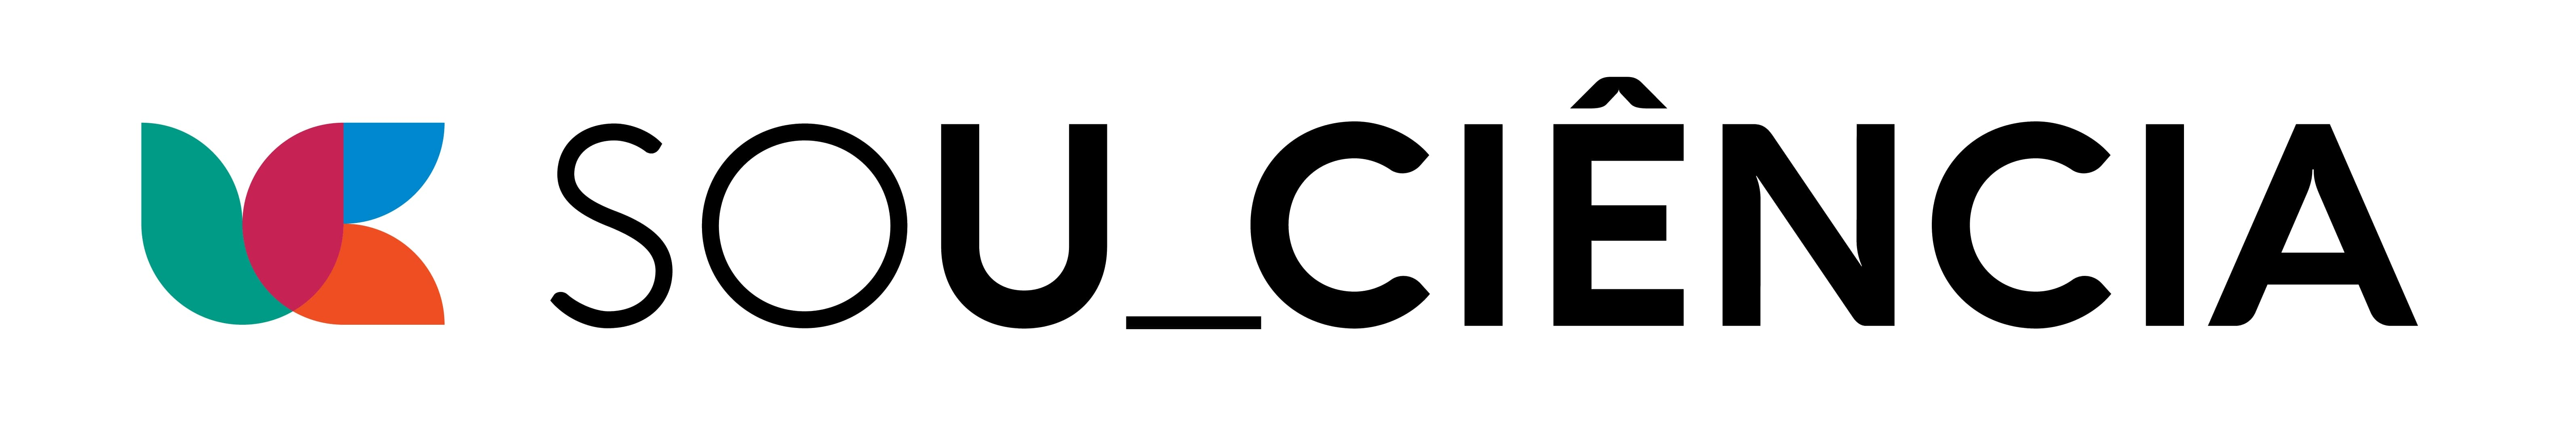

**Coordenação Geral:** \\
Soraya Soubhi Smaili (UNIFESP)

**Coordenação de Pesquisa:** \\
Maria Angélica Pedra Minhoto (UNIFESP) \\
Pedro Arantes (UNIFESP) 

**Equipe de Dados** \\

**Coordenação:** \\
Thaís Cavalcante Martins 

**Pesquisadora Colaboradora:** \\
Daniela Leal Musa (UNIFESP)

**Equipe Técnica:** 

Alexsandro Cardoso Carvalho \\
Antonio Guerreiro Silva Serrano \\
Ecila Alves de Oliveira Migliori \\
Fabiana Yumi Sato Kayanoki \\
Meyrele Torres Nascimento \\
Ricardo Ireno dos Santos \\

**Autor: Antonio Guerreiro Silva Serrano**

# Análise Exploratória de Dados com R

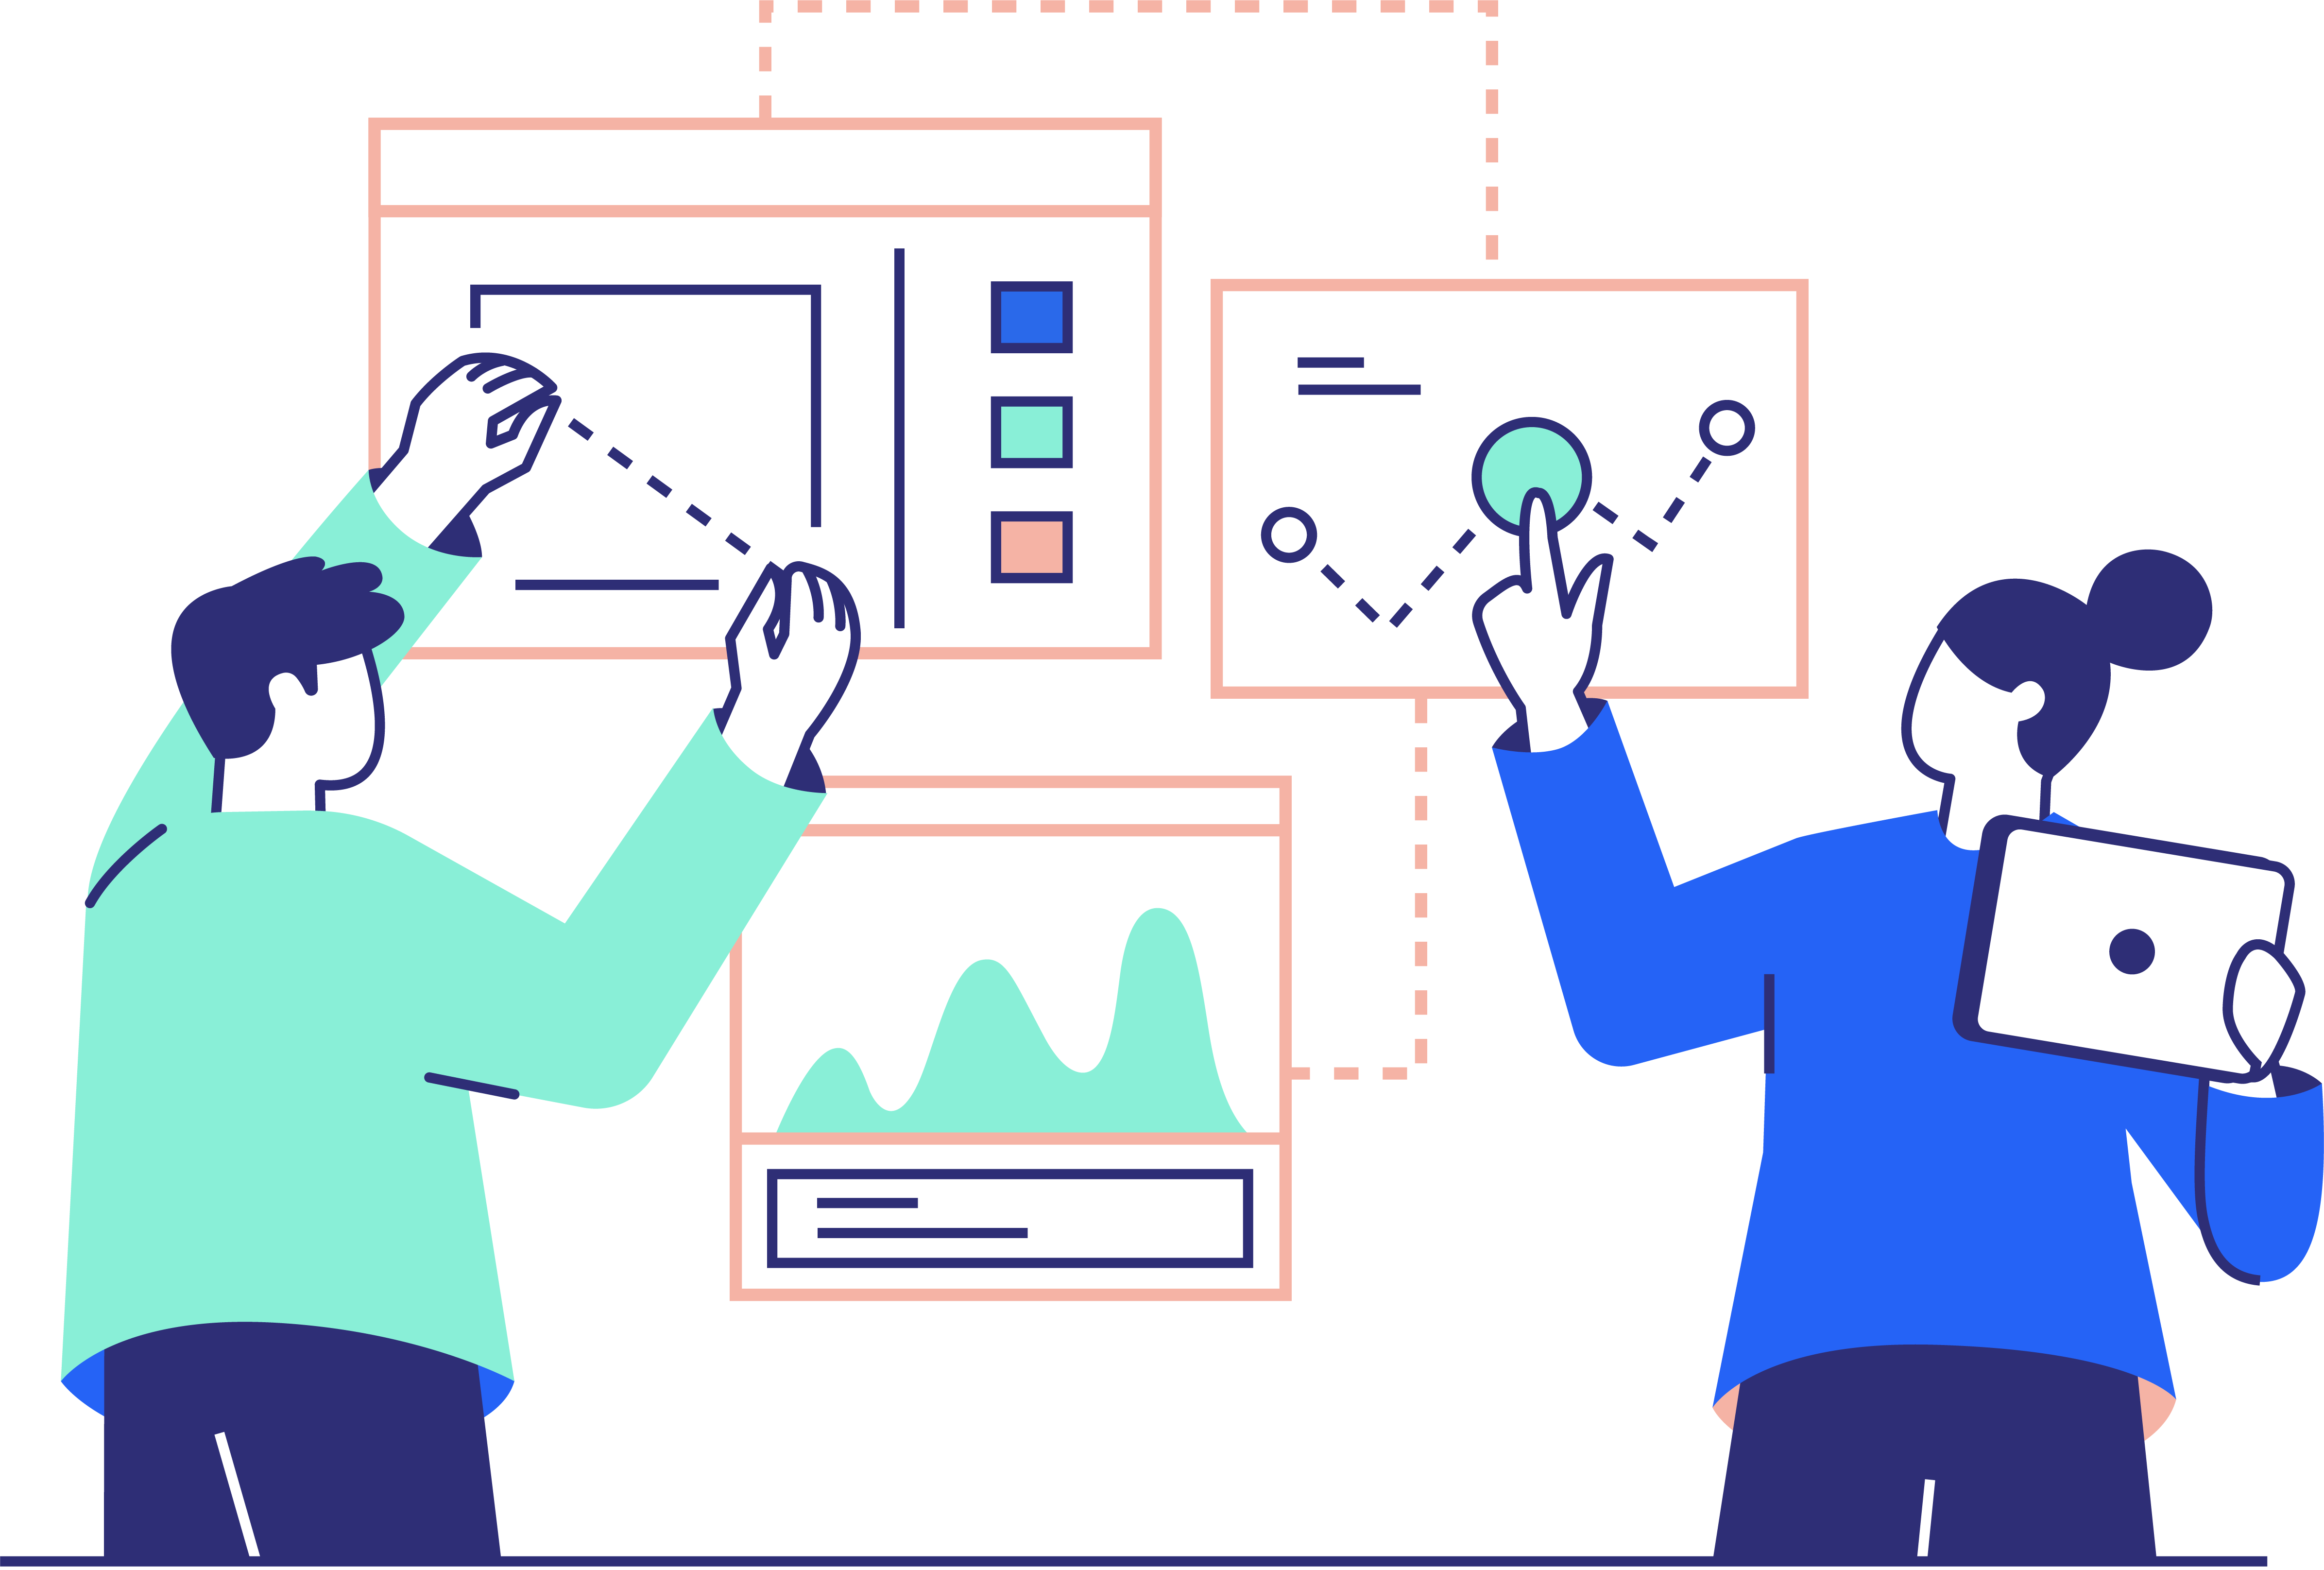

## Introdução

**O que é Análise Exploratória de Dados?**

Análise Exploratória de Dados (AED) é um processo de investigação utilizado para entender e analisar conjuntos de dados de forma sistemática e detalhada. O objetivo principal da AED é extrair *insights* e conhecimentos relevantes sobre os dados, identificando padrões, tendências e anomalias. É uma etapa fundamental em qualquer projeto de análise de dados, pois ajuda a entender a qualidade e a integridade dos dados e pode levar a descobertas que orientam a tomada de decisões embasadas.

**Como realizar uma Análise Exploratória de Dados?**

Para realizar uma AED, é importante seguir alguns passos básicos. Primeiramente, é necessário ter uma compreensão clara dos objetivos da análise e do conjunto de dados em questão. Em seguida, é recomendado explorar as estatísticas descritivas básicas, como média, mediana e desvio padrão, e visualizações gráficas, como diagramas de caixas e gráficos de dispersão. Além disso, é importante investigar a distribuição dos dados e identificar possíveis valores extremos e valores ausentes. Por fim, a AED deve ser iterativa, ou seja, é preciso voltar a alguns passos e refinar a análise à medida que novas informações são descobertas.

**Quais dados serão utilizados nesta demonstração?**

Nesta demonstração, utilizou-se apenas o triênio 2009, 2010 e 2011 do banco de dados ENADE-IESs do SoU_Ciência.

O conjunto de dados do INEP sobre o ENADE das IESs permite a comparação do desempenho das IESs em relação a outras instituições em todo o país, tornando-se uma ferramenta importante para avaliar a qualidade do ensino superior no Brasil. Esses dados são amplamente utilizados por gestores públicos, pesquisadores e instituições de ensino para orientar políticas públicas e tomadas de decisão relacionadas à educação.

## 1. Preparando o ambiente de programação em R

**1.1 Importando os pacotes necessárias para AED**

As bibliotecas do R contêm funções, pacotes e recursos que permitem que os usuários executem tarefas avançadas sem ter que escrever o código do zero. Importar bibliotecas pode economizar tempo, reduzir erros e aumentar a produtividade do desenvolvedor. Além disso, muitas bibliotecas em R são mantidas por uma comunidade ativa de usuários, o que significa que elas estão em constante evolução e melhorias, tornando-as uma ferramenta valiosa para qualquer projeto em R.

In [ ]:
#####################
#   Bibliotecas R   #
#####################

# O código a seguir realiza a instalação e carregamento de um conjunto de pacotes. 
# Utilizando um loop "for", o código verifica se cada pacote está instalado e, caso 
# não esteja, realiza a instalação e carregamento do mesmo. Isso garante que todos 
# os pacotes necessários estejam disponíveis para serem utilizados no restante do 
# código. A função "suppressMessages()" é usada para suprimir as mensagens de aviso 
# ou informação que seriam exibidas durante o processo de instalação e carregamento 
# dos pacotes.

pacotes <- c(
              "readr", 
              "dplyr", 
              "tidyverse", 
              "tibble", 
              "tidyr", 
              "ggplot2", 
              "viridis", 
              "ggforce", 
              "reshape2",
              "RColorBrewer",
              "gridExtra",
              "IRdisplay"
              )

suppressMessages({
  for (pacote in pacotes) {
    if (!require(pacote, character.only = TRUE, quietly = TRUE)) {
      cat("Instalando a biblioteca", pacote, "do R ... ")
      install.packages(pacote)
      library(pacote, character.only = TRUE)
      cat("Instalada!\n")
    }
  }
})

Instalando a biblioteca viridis do R ... Instalada!
Instalando a biblioteca ggforce do R ... Instalada!
Instalando a biblioteca reshape2 do R ... Instalada!


**1.2 Download dos dados**

Em sua versão mais recente, os dados estão disponíveis no repositório  (http://  )  e estão  em formato CSV delimitados por ponto e vírgula (sep = ";") . Os arquivos encontram-se compactados (em formato .zip) e devem ser descompactados no seu disco rígido.


## 2. Carregando os dados na forma de um dataframe

**2.1 Manualmente**

Para carregar arquivos com dados no Google Colab manualmente, basta clicar no ícone de pasta no menu à esquerda da tela, selecionar "Upload" e escolher o arquivo desejado no pop-up que aparecerá. O arquivo será carregado na pasta raiz do seu notebook e poderá ser acessado através de seu nome de arquivo.

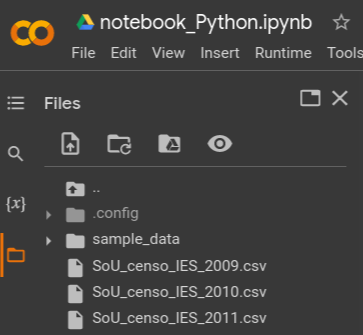

In [ ]:
##############################################
#   Identificar o diretório de trabalho      #
##############################################

# A função "getwd()" permite obter o caminho do diretório em que o código está sendo 
# executado, fornecendo uma referência para localizar e manipular arquivos dentro 
# desse diretório.

getwd()

[1] "/content"

**2.2 Descompactar múltiplos arquivos**

Descompactar múltiplos arquivos .zip de uma vez só economiza tempo, é mais organizado e pode economizar espaço em disco. Além disso, é uma estratégia útil em ambientes de trabalho com grande volume de arquivos compactados.

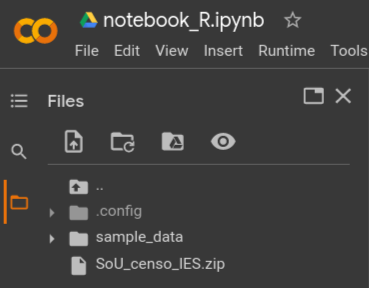

In [ ]:
#############################################
#    Verificar o conteúdo do diretório      #
#############################################

# O código a seguir utiliza a função "list.files()" com o parâmetro pattern para  
# buscararquivos no diretório de trabalho atual que possuam a extensão ".zip". A  
# função retorna uma lista contendo os nomes dos arquivos que correspondem ao padrão 
# especificado. Em seguida, a função "print()" é usada para exibir os nomes dos  
# arquivos ZIP encontrados na saída do console. Dessa forma, o código permite 
# identificar e exibir os nomes dos arquivos ZIP presentes no diretório de trabalho 
# atual.

csv_files <- list.files(pattern = ".zip")

print(csv_files)

[1] "SoU_censo_IES.zip"


In [ ]:
##############################################################################
#     Descompactar todos os arquivos .zip presentes no diretório atual       #
##############################################################################

# Este código realiza a descompactação de arquivos ZIP presentes no diretório de 
# trabalho atual. Primeiro, a função list.files() com o parâmetro pattern é utilizada 
# para buscar os arquivos que possuem a extensão ".zip". Os nomes dos arquivos ZIP 
# encontrados são armazenados em uma lista chamada zip_files. Em seguida, é iniciado 
# um loop for para percorrer cada arquivo da lista. Dentro do loop, a função unzip() 
# é usada para descompactar o arquivo, e a função file.remove() é utilizada para 
# remover o arquivo ZIP original após a descompactação. Dessa forma, o código 
# automatiza o processo de descompactação de arquivos ZIP no diretório de trabalho 
# atual, tornando mais fácil e rápido o acesso aos arquivos contidos nos arquivos 
# compactados.

zip_files <- list.files(pattern = ".zip")

for (file in zip_files) {

  unzip(file)
  
  file.remove(file)
}

In [ ]:
#########################################
#   Verificar o conteúdo do diretório   #
#########################################

# O código abaixo realiza a busca de arquivos no diretório atual que possuam a extensão 
# ".csv". Ele utiliza a função list.files() com o argumento pattern definido como "*.csv", 
# que representa um padrão de busca para arquivos com essa extensão. Em seguida, o 
# resultado da busca é armazenado na variável csv_files. Por fim, a função print() é 
# utilizada para exibir no console a lista de arquivos encontrados com a extensão ".csv". 
# Isso é útil para verificar quais arquivos CSV estão presentes no diretório e obter 
# uma visão geral dos dados disponíveis para análise ou processamento posterior.

csv_files <- list.files(pattern = "*.csv")

print(csv_files)

[1] "SoU_censo_IES_2009.csv" "SoU_censo_IES_2010.csv" "SoU_censo_IES_2011.csv"


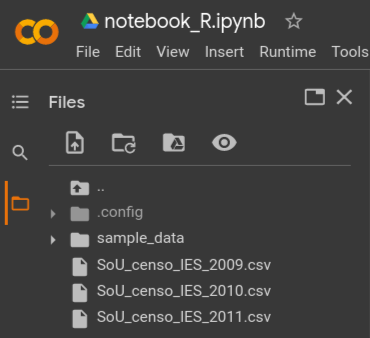

In [ ]:
# Identificar o separador ("sep") dos arquivos CSV

# O código em R apresentado tem como objetivo identificar o separador utilizado 
# em vários arquivos CSV presentes em um diretório específico. Ele percorre todos 
# os arquivos CSV do diretório e exibe o nome de cada arquivo juntamente com o 
# separador identificado.
# Primeiramente, são listados todos os arquivos CSV do diretório utilizando a 
# função list.files. Em seguida, é realizado um loop para cada arquivo, onde a 
# função readLines é usada para ler a primeira linha do arquivo e a função grepl 
# é utilizada para verificar a presença dos possíveis separadores. Se um separador 
# é encontrado, ele é exibido junto com o nome do arquivo. O código fornece uma 
# maneira prática de identificar o separador utilizado nos arquivos CSV de um 
# diretório, facilitando o processamento subsequente desses arquivos.

caminho <- "./"

arquivos_csv <- list.files(caminho, pattern = "\\.csv$", full.names = TRUE)

for (arquivo_csv in arquivos_csv) {
  cat("Arquivo:", arquivo_csv, "\n")
  
  delimitadores <- c(",", ";", "\t", "|")
  
  for (delimitador in delimitadores) {
    linha <- readLines(arquivo_csv, n = 1)
    
    if (grepl(delimitador, linha)) {
      cat("Separador:", delimitador, "\n")
      break
    }
  }
  
  cat("-------------------------------------\n")
}

Arquivo: .//SoU_censo_IES_2009.csv 
Separador: | 
-------------------------------------
Arquivo: .//SoU_censo_IES_2010.csv 
Separador: | 
-------------------------------------
Arquivo: .//SoU_censo_IES_2011.csv 
Separador: | 
-------------------------------------


**2.3 Leitura de múltiplos arquivos CSV em dataframes individuais, um a um**

O R possui funções nativas para importar dados de arquivos CSV, como a função "read.csv", que lê arquivos CSV e retorna um dataframe. Além disso, o R também permite a customização da leitura de arquivos CSV, permitindo que o usuário especifique o separador de colunas, o cabeçalho e outras opções. Com a leitura de arquivos CSV em R, é possível manipular e analisar dados de forma rápida e eficiente.

In [ ]:
#############################################
#    Leitura de arquivos no formato CSV     #
#############################################

# Define a variável "caminho" como "./", ou seja, o diretório atual em que
# o notebook está sendo executado.

caminho <- "./"

# Estes três comandos leem arquivos CSV contendo informações sobre 
# IESs nos anos de 2009, 2010 e 2011, respectivamente. Eles utilizam 
# o caminho definido anteriormente e especificam o separador e a 
# codificação a serem utilizados.

df_2009 <- read.csv(paste0(caminho, "SoU_censo_IES_2009.csv"), sep = "|", encoding = "UTF-8", na.strings = c("NA", "N/A", "", " "))

df_2010 <- read.csv(paste0(caminho, "SoU_censo_IES_2010.csv"), sep = "|", encoding = "UTF-8", na.strings = c("NA", "N/A", "", " "))

df_2011 <- read.csv(paste0(caminho, "SoU_censo_IES_2011.csv"), sep = "|", encoding = "UTF-8", na.strings = c("NA", "N/A", "", " "))

**2.4 Leitura de múltiplos arquivos CSV em dataframes individuais, através de um loop (for)**


A leitura de múltiplos arquivos CSV em dataframes individuais, através de um loop (for), é uma tarefa comum na análise de dados em R. Essa técnica permite automatizar a leitura de arquivos e facilitar a organização e manipulação dos dados. Dessa forma, é possível manipular cada dataframe individualmente e combiná-los posteriormente, se necessário, para obter insights mais amplos sobre os dados. Essa abordagem é particularmente útil quando se trabalha com grandes conjuntos de dados, onde a leitura manual de cada arquivo seria impraticável.

In [ ]:
#############################################
#    Leitura de arquivos no formato CSV     #
#############################################

# Define o caminho como "./", ou seja, o diretório atual em que o código está 
# sendo executado.

caminho <- "./"

# Lista os arquivos no diretório atual utilizando a função list.files(), 
# filtrando apenas os arquivos com extensão .csv.

arquivos <- list.files(caminho, pattern = "\\.csv$", full.names = TRUE)

# Define a função "extrair_nome_arquivos" para extrair o nome dos arquivos sem 
# a extensão .csv e em letras minúsculas.

extrair_nome_arquivos <- function(texto) {
  nome_arquivo <- tolower(gsub("\\.csv$", "", basename(texto)))
  return(nome_arquivo)
}

# Lista os arquivos aplicando a função "extrair_nome_arquivos" em cada arquivo 
# listado.

nomes_de_arquivos <- sapply(arquivos, extrair_nome_arquivos)

# Cria os dataframes a partir dos arquivos listados utilizando a função read.csv(), 
# e imprime uma mensagem de sucesso ou de erro.

for (i in seq_along(nomes_de_arquivos)) {
  tryCatch({
    df <- read.csv(arquivos[i], sep = "|", encoding = "utf-8")
    assign(nomes_de_arquivos[i], df, envir = .GlobalEnv)
    cat("Dataframe \033[34m", nomes_de_arquivos[i], "\033[0m criado a partir do arquivo \033[34m", basename(arquivos[i]), "\033[0m\n")
  }, error = function(e) {
    cat("Erro ao criar o dataframe a partir do arquivo:", basename(arquivos[i]), "\n")
    message(e)
  })
}


Dataframe  sou_censo_ies_2009  criado a partir do arquivo  SoU_censo_IES_2009.csv 
Dataframe  sou_censo_ies_2010  criado a partir do arquivo  SoU_censo_IES_2010.csv 
Dataframe  sou_censo_ies_2011  criado a partir do arquivo  SoU_censo_IES_2011.csv 


**2.5 Leitura de múltiplos arquivos CSV, juntando todos no mesmo dataframe**

A leitura de múltiplos arquivos CSV e a junção deles em um único dataframe em R apresenta diversas vantagens. Em primeiro lugar, essa abordagem permite trabalhar com dados mais complexos e completos, que muitas vezes são armazenados em diferentes arquivos. Além disso, é possível automatizar o processo de leitura e junção de arquivos, economizando tempo e reduzindo possíveis erros manuais.

In [ ]:
#############################################
#    Leitura de arquivos no formato CSV     #
#############################################

# Definir o caminho onde os arquivos CSV estão armazenados.

caminho <- './'

# Usar a função list.files() para obter uma lista de todos 
# os arquivos CSV no caminho especificado e ordená-los 
# em ordem alfabética.

arquivos_csv <- sort(list.files(caminho, pattern = "\\.csv$"))

# Criar uma lista de dataframes, um para cada arquivo CSV 
# encontrado, usando a função lapply() e read.csv(). 
# Os dataframes são lidos com o separador '|' e o encoding 'UTF-8'.

lista_dfs <- lapply(arquivos_csv, function(arquivo) {
  read.csv(file.path(caminho, arquivo), sep='|', encoding = 'UTF-8', na.strings = c("NA", "N/A", ""))
})

# Concatenar todos os dataframes da lista em um único dataframe, 
# usando a função do.call() e rbind(). 
# O argumento ignore.row.names = TRUE é usado para redefinir 
# os índices do dataframe resultante.

df_trienio <- do.call(rbind, lista_dfs)

**2.6 Leitura de múltiplos arquivos CSV pela numeração final, com base em uma lista de anos fornecida**

Em R, é possível realizar a leitura de múltiplos arquivos CSV com base na numeração final dos mesmos, usando uma lista de anos pré-fornecida. Por meio da função list.files(), é possível obter a lista de arquivos CSV em um diretório específico. Em seguida, é realizada a filtragem dos arquivos com base na numeração final correspondente aos anos presentes na lista. Utilizando a função read.csv(), é feita a leitura de cada arquivo CSV selecionado. Os dados são então armazenados em uma estrutura de dados adequada, permitindo o processamento posterior. Dessa forma, é possível manipular e analisar conjuntos de dados distribuídos em diferentes arquivos CSV, facilitando a leitura e o manuseio de informações relevantes para análises e tomadas de decisão.

In [ ]:
#############################################
#    Leitura de arquivos no formato CSV     #
#############################################

# Define o caminho onde os arquivos CSV estão armazenados.

caminho <- "./"

# A lista "anos" permite selecionar e processar arquivos específicos com base 
# nos anos fornecidos.

anos <- c(2009, 2010, 2011)

# Usa a função list.files() para obter uma lista de todos os arquivos CSV no 
# caminho especificado e ordená-los em ordem alfabética.

arquivos_csv <- list.files(caminho, pattern = "\\.csv$", full.names = TRUE)

# A lista "arquivos_selecionados" é composta por arquivos filtrados com base na 
# numeração final correspondente aos anos presentes na lista "anos".

arquivos_selecionados <- arquivos_csv[sapply(arquivos_csv, function(arquivo) as.numeric(sub('.*_(\\d{4})\\.csv$', '\\1', arquivo))) %in% anos]

# Cria uma lista de dataframes, um para cada arquivo CSV encontrado, usando a 
# função read.csv(), com o separador '|' e encoding 'UTF-8'.

lista_dfs <- lapply(arquivos_selecionados, function(arquivo) read.csv(arquivo, sep = "|", encoding = "UTF-8"))

# Concatena todos os dataframes da lista em um único dataframe, usando a função 
# do.call(rbind, lista_dfs).

df_trienio <- do.call(rbind, lista_dfs)

## 3. Visualização do *dataframe*

**3.1 Comando *head***

O comando *head* é utilizado em R para mostrar as primeiras linhas de um objeto, seja ele um dataframe, uma matriz ou um vetor. Por padrão, o comando *head* mostra as 6 primeiras linhas do objeto, mas esse número pode ser alterado através do argumento n. O comando é útil para dar uma rápida olhada nas primeiras observações de um conjunto de dados e verificar se a importação foi feita corretamente ou se é necessário fazer algum pré-processamento antes de continuar a análise. 

In [ ]:
#####################
#   Comando head    #
#####################

# Se o argumento n de head(df, n) for omitido, por padrão serão exibidas 
# apenas as 6 primeiras linhas.

head(df_trienio)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#####################
#   Comando head    #
#####################

# Exibir as 2 primeiras linhas do dataframe df_trienio

head(df_trienio, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92


**3.2 Comando *tail***

O comando *tail* do R é uma função que permite visualizar as últimas linhas de um objeto de dados, como um dataframe ou uma matriz. É especialmente útil para examinar grandes conjuntos de dados e visualizar rapidamente as últimas observações. O comando *tail* exige apenas um argumento, que é o objeto de dados que se deseja examinar. Por padrão, a função exibe as últimas 6 linhas do objeto, mas esse número pode ser especificado usando o argumento "n".

In [ ]:
#####################
#   Comando tail    #
#####################

# Se o argumento n de tail(df, n) for omitido, por padrão serão exibidas 
# apenas as 6 últimas linhas.

tail(df_trienio) 

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
89542,2011,585,UNIVERSIDADE FEDERAL DE SANTA CATARINA,UFSC,1,Pública Federal,1,Universidade,23,0,⋯,0,0,0,40,0,0,0,38,40,62
89543,2011,585,UNIVERSIDADE FEDERAL DE SANTA CATARINA,UFSC,1,Pública Federal,1,Universidade,126,0,⋯,0,0,40,40,40,0,0,105,120,202
89544,2011,585,UNIVERSIDADE FEDERAL DE SANTA CATARINA,UFSC,1,Pública Federal,1,Universidade,96,0,⋯,0,80,0,0,0,0,0,93,80,154
89545,2011,585,UNIVERSIDADE FEDERAL DE SANTA CATARINA,UFSC,1,Pública Federal,1,Universidade,409,0,⋯,0,400,0,0,0,0,0,383,400,662
89546,2011,12,UNIVERSIDADE FEDERAL DO RIO GRANDE,FURG,1,Pública Federal,1,Universidade,78,0,⋯,0,80,0,0,0,0,0,79,80,575
89547,2011,2,UNIVERSIDADE DE BRASÃ�LIA,UNB,1,Pública Federal,1,Universidade,521,0,⋯,0,360,0,0,0,0,0,466,360,2478


In [ ]:
#####################
#   Comando tail    #
#####################

# Exibir as 2 últimas linhas do dataframe df_trienio

tail(df_trienio, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
89546,2011,12,UNIVERSIDADE FEDERAL DO RIO GRANDE,FURG,1,Pública Federal,1,Universidade,78,0,⋯,0,80,0,0,0,0,0,79,80,575
89547,2011,2,UNIVERSIDADE DE BRASÃ�LIA,UNB,1,Pública Federal,1,Universidade,521,0,⋯,0,360,0,0,0,0,0,466,360,2478


## 4. Tipos de dados em R

1.   **Inteiros** (*integer*) são um tipo de dado numérico em R que representa números inteiros sem decimais. Eles são representados sem ponto decimal e podem ser positivos ou negativos. 
2.   **Números de ponto flutuante** (*numeric*) são um tipo de dado numérico em R que representa números com decimais. Eles são representados com um ponto decimal e podem ser positivos ou negativos.
3.   **Caracteres** (*character*) são um tipo de dado em R que representa texto ou sequências de caracteres. Eles são definidos entre aspas simples ou duplas. 
4.   **Datas** (*Date*) são um tipo de dado em R que representa datas. Elas são representadas no formato "AAAA-MM-DD" e podem ser manipuladas usando as funções do pacote "base" de R, como as.Date(). As datas em R são geralmente usadas em análises temporais e em gráficos de séries temporais.

In [ ]:
############################################
#   Checar todas as colunas do dataframe   #
############################################

# O código abaixo é utilizado para exibir uma visualização resumida dos 
# tipos de dados presentes no objeto df_trienio. Ao executar essa linha de código, 
# será impressa no console uma representação estrutural do objeto, fornecendo 
# informações sobre os diferentes tipos de variáveis contidas no df_trienio. Essa 
# visualização é útil para identificar os tipos de dados das variáveis, como numérico, 
# caractere, fator, entre outros. Com essa informação, é possível compreender melhor 
# a composição dos dados e realizar análises ou manipulações específicas de acordo 
# com o tipo de cada variável.

str(df_trienio)

'data.frame':	89547 obs. of  126 variables:
 $ NU_ANO_CENSO                 : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ CO_IES                       : int  699 1540 1540 1540 1540 833 833 833 4613 4613 ...
 $ NO_IES                       : chr  "FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA" "INSTITUTO DE ENSINO SUPERIOR DE RONDONIA" "INSTITUTO DE ENSINO SUPERIOR DE RONDONIA" "INSTITUTO DE ENSINO SUPERIOR DE RONDONIA" ...
 $ SG_IES                       : chr  "UNIR" "IESUR" "IESUR" "IESUR" ...
 $ TP_CATEGORIA_ADMINISTRATIVA  : int  1 5 5 5 5 5 5 5 4 4 ...
 $ NO_CATEGORIA_ADMINISTRATIVA  : chr  "Pública Federal" "Privada sem fins lucrativos" "Privada sem fins lucrativos" "Privada sem fins lucrativos" ...
 $ TP_ORGANIZACAO_ACADEMICA     : int  1 3 3 3 3 3 3 3 3 3 ...
 $ NO_ORGANIZACAO_ACADEMICA     : chr  "Universidade" "Faculdade" "Faculdade" "Faculdade" ...
 $ QT_MATRICULA_TOTAL           : int  44 127 547 104 123 14 284 174 68 229 ...
 $ QT_CONCLUINTE_TOTAL          :

In [ ]:
#################################################
#    Checar colunas específicas do dataframe    #
#################################################

# Este código define uma lista chamada "colunas" que contém os nomes das colunas  
# do dataframe "df_trienio" que serão selecionadas para a análise. As colunas 
# escolhidas são "NO_IES", "NU_ANO_CENSO", "TP_CATEGORIA_ADMINISTRATIVA" e 
# "QT_INSCRITO_TOTAL". Em seguida, use a função "sapply()" para exibir 
# os tipos de dados das colunas selecionadas em formato de tabela empilhada.

colunas <- c('NO_IES', 
             'NU_ANO_CENSO', 
             'TP_CATEGORIA_ADMINISTRATIVA', 
             'QT_INSCRITO_TOTAL')

stack(sapply(df_trienio[colunas], class))

values,ind
<chr>,<fct>
character,NO_IES
integer,NU_ANO_CENSO
integer,TP_CATEGORIA_ADMINISTRATIVA
integer,QT_INSCRITO_TOTAL


In [ ]:
#######################################################
#    Checar colunas com um tipo específico de dado    #
#######################################################

# Este código cria uma variável chamada "colunas_objeto" que armazena um subconjunto 
# do dataframe "df_trienio" contendo apenas as colunas cujo tipo de dado é "character", 
# ou seja, colunas que contêm valores de texto. Em seguida, a função "sapply" é usada 
# para aplicar a função "class" em cada uma das colunas da variável "colunas_objeto",
# retornando um vetor com o tipo de dados de cada coluna. A função "stack" é usada para 
# empilhar verticalmente as informações contidas no vetor retornado por "sapply",
# criando uma tabela que mostra o nome de cada coluna e o tipo de dados correspondente.

colunas_objeto <- df_trienio[sapply(df_trienio, is.character)]

stack(sapply(colunas_objeto, class))

values,ind
<chr>,<fct>
character,NO_IES
character,SG_IES
character,NO_CATEGORIA_ADMINISTRATIVA
character,NO_ORGANIZACAO_ACADEMICA
character,NO_LOCAL_OFERTA
character,NO_ESTADO_IES
character,SIGLA_UF_IES
character,NO_REGIAO_IES
character,NO_MUNICIPIO_IES


In [ ]:
##############################################################################
#   Checar colunas excluindo um tipo específico de dado (!=, diferente de)   #
##############################################################################

# Este código é usado para exibir no console os nomes das variáveis no objeto df_trienio 
# que não são do tipo inteiro. Ele faz uso da função sapply() para iterar sobre as 
# variáveis do objeto df_trienio e verifica se o tipo de cada variável é diferente de 
# "integer" usando a função class(). Em seguida, a função names() é usada para obter 
# os nomes das variáveis que atendem a essa condição. Por fim, a função cat() é 
# utilizada para imprimir esses nomes no console, separados por uma quebra de linha 
# definida pelo argumento sep = "\n". Essa linha de código é útil para identificar e 
# listar as variáveis não inteiras presentes no objeto df_trienio, auxiliando na 
# compreensão da composição dos tipos de dados presentes nos dados e possibilitando 
# análises e manipulações específicas para essas variáveis.

cat(names(df_trienio[sapply(df_trienio, function(x) class(x) != "integer")]), sep = "\n")

NO_IES
SG_IES
NO_CATEGORIA_ADMINISTRATIVA
NO_ORGANIZACAO_ACADEMICA
NO_LOCAL_OFERTA
NO_ESTADO_IES
SIGLA_UF_IES
NO_REGIAO_IES
NO_MUNICIPIO_IES
NO_CURSO
NO_SITUACAO
CO_CINE_ROTULO
NO_GRAU_ACADEMICO
NO_MODALIDADE_ENSINO
NO_NIVEL_ACADEMICO
NO_ATRIBUTO_INGRESSO
DT_INICIO_FUNCIONAMENTO
DT_AUTORIZACAO_CURSO
NU_INTEGRALIZACAO_INTEGRAL
NU_INTEGRALIZACAO_MATUTINO
NU_INTEGRALIZACAO_VESPERTINO
NU_INTEGRALIZACAO_NOTURNO
NU_INTEGRALIZACAO_EAD
NU_PERC_CARGA_SEMI_PRES


## 5. Manipulando colunas

**5.1 Indicando quantas linhas e colunas tem o dataframe**

Saber a dimensão do dataframe permite ao analista ter uma visão geral da estrutura dos dados e entender melhor como eles podem ser manipulados. Além disso, a informação sobre o número de linhas e colunas é essencial para a realização de cálculos e operações em diferentes partes do conjunto de dados. 

In [ ]:
####################
#   Comando dim    #
####################

# O código a seguir retorna as dimensões do objeto df_trienio, fornecendo o número 
# de linhas e colunas do data frame. Essa informação é útil para entender o tamanho 
# do conjunto de dados. Por exemplo, se o retorno for (100, 5), isso indica que o 
# data frame possui 100 linhas e 5 colunas. Saber as dimensões é importante para 
# realizar operações de indexação e manipulação dos dados.

dim(df_trienio)

[1] 89547   126

In [ ]:
####################
#   Comando dim    #
####################

# Este código exibe informações sobre as dimensões do objeto df_trienio. A função cat() 
# é usada para imprimir no console o nome do objeto seguido por informações sobre o 
# número de linhas e colunas. Utilizando dim(df_trienio)[1] obtemos o número de linhas 
# e dim(df_trienio)[2] obtemos o número de colunas do data frame. Essas informações 
# são úteis para ter uma noção do tamanho do conjunto de dados, fornecendo o número 
# de observações e variáveis. 

cat('df_trienio: \n\n Linhas =', dim(df_trienio)[1], '\n Colunas =', dim(df_trienio)[2])

df_trienio: 

 Linhas = 89547 
 Colunas = 126

**5.2 Mostrar os nomes das colunas do dataframe**

Visualizar os nomes das colunas em dataframes é uma tarefa importante em análises de dados com R, pois ajuda a entender a estrutura do dataframe e quais variáveis estão disponíveis para uso. Além disso, quando se trabalha com grandes conjuntos de dados, ter uma visão geral dos nomes das colunas ajuda a identificar rapidamente quais variáveis podem ser relevantes para a análise em questão. 

In [ ]:
#####################################################
#   Exibir todos os nomes de colunas do dataframe   #
#####################################################

# O código a seguir é um loop for que itera sobre cada nome de coluna no data frame 
# df_trienio. A cada iteração, o nome da coluna atual é impresso no console utilizando 
# a função print().

for (i in colnames(df_trienio)) {
  print(i)
}

[1] "NU_ANO_CENSO"
[1] "CO_IES"
[1] "NO_IES"
[1] "SG_IES"
[1] "TP_CATEGORIA_ADMINISTRATIVA"
[1] "NO_CATEGORIA_ADMINISTRATIVA"
[1] "TP_ORGANIZACAO_ACADEMICA"
[1] "NO_ORGANIZACAO_ACADEMICA"
[1] "QT_MATRICULA_TOTAL"
[1] "QT_CONCLUINTE_TOTAL"
[1] "QT_INGRESSO_TOTAL"
[1] "CO_LOCAL_OFERTA"
[1] "NO_LOCAL_OFERTA"
[1] "CO_UF"
[1] "NO_ESTADO_IES"
[1] "SIGLA_UF_IES"
[1] "NO_REGIAO_IES"
[1] "CO_MUNICIPIO"
[1] "NO_MUNICIPIO_IES"
[1] "IN_CAPITAL"
[1] "CO_CURSO"
[1] "NO_CURSO"
[1] "TP_SITUACAO"
[1] "NO_SITUACAO"
[1] "CO_CINE_ROTULO"
[1] "TP_GRAU_ACADEMICO"
[1] "NO_GRAU_ACADEMICO"
[1] "TP_MODALIDADE_ENSINO"
[1] "NO_MODALIDADE_ENSINO"
[1] "TP_NIVEL_ACADEMICO"
[1] "NO_NIVEL_ACADEMICO"
[1] "IN_GRATUITO"
[1] "TP_ATRIBUTO_INGRESSO"
[1] "NO_ATRIBUTO_INGRESSO"
[1] "NU_CARGA_HORARIA"
[1] "DT_INICIO_FUNCIONAMENTO"
[1] "DT_AUTORIZACAO_CURSO"
[1] "IN_AJUDA_DEFICIENTE"
[1] "IN_MATERIAL_DIGITAL"
[1] "IN_MATERIAL_AMPLIADO"
[1] "IN_MATERIAL_TATIL"
[1] "IN_MATERIAL_IMPRESSO"
[1] "IN_MATERIAL_AUDIO"
[1] "IN_MATERIAL_B

In [ ]:
################################################################
#     Exibir os n primeiros nomes de colunas do dataframe      #
################################################################

# O código abaixo define uma variável n com o valor 20 e em seguida exibe uma mensagem 
# no console utilizando a função cat() juntamente com a função paste() para concatenar 
# o valor de n na frase. A mensagem informa que serão exibidos os nomes das primeiras 
# n colunas do data frame. Em seguida, o código utiliza um loop for para iterar sobre 
# os nomes das colunas do df_trienio até o índice n. A cada iteração, o nome da coluna 
# é impresso no console utilizando a função print(). Dessa forma, o código exibe os 
# nomes das primeiras n colunas do data frame df_trienio.

n <- 20

cat(paste('Os', n, 'primeiros nomes de colunas do dataframe são: \n\n'))

for (i in names(df_trienio)[1:n]) {
  print(i)
}

Os 20 primeiros nomes de colunas do dataframe são: 

[1] "NU_ANO_CENSO"
[1] "CO_IES"
[1] "NO_IES"
[1] "SG_IES"
[1] "TP_CATEGORIA_ADMINISTRATIVA"
[1] "NO_CATEGORIA_ADMINISTRATIVA"
[1] "TP_ORGANIZACAO_ACADEMICA"
[1] "NO_ORGANIZACAO_ACADEMICA"
[1] "QT_MATRICULA_TOTAL"
[1] "QT_CONCLUINTE_TOTAL"
[1] "QT_INGRESSO_TOTAL"
[1] "CO_LOCAL_OFERTA"
[1] "NO_LOCAL_OFERTA"
[1] "CO_UF"
[1] "NO_ESTADO_IES"
[1] "SIGLA_UF_IES"
[1] "NO_REGIAO_IES"
[1] "CO_MUNICIPIO"
[1] "NO_MUNICIPIO_IES"
[1] "IN_CAPITAL"


In [ ]:
#############################################################
#     Exibir os n últimos nomes de colunas do dataframe     #
#############################################################

# O código abaixo define uma variável n com o valor 20 e em seguida exibe uma mensagem 
# no console utilizando a função cat() juntamente com a função paste() para concatenar 
# o valor de n na frase. A mensagem informa que serão exibidos os nomes das últimas 
# n colunas do data frame. Em seguida, o código utiliza um loop for para iterar sobre 
# os nomes das colunas do df_trienio até o índice n. A cada iteração, o nome da coluna 
# é impresso no console utilizando a função print(). Dessa forma, o código exibe os 
# nomes das últimas n colunas do data frame df_trienio.

n <- 20

cat(paste('Os', n, 'últimos nomes de colunas do dataframe são: \n\n'))

for (i in tail(colnames(df_trienio), n)) {
  print(i)
}

Os 20 últimos nomes de colunas do dataframe são: 

[1] "QT_VAGAS_PROG_ESP_EAD"
[1] "QT_VAGAS_PRINCIPAL_INTEGRAL"
[1] "QT_VAGAS_PRINCIPAL_MATUTINO"
[1] "QT_VAGAS_PRINCIPAL_VESPERTINO"
[1] "QT_VAGAS_PRINCIPAL_NOTURNO"
[1] "QT_VAGAS_PRINCIPAL_EAD"
[1] "QT_VAGAS_OUTRAS_INTEGRAL"
[1] "QT_VAGAS_OUTRAS_MATUTINO"
[1] "QT_VAGAS_OUTRAS_VESPERTINO"
[1] "QT_VAGAS_OUTRAS_NOTURNO"
[1] "QT_VAGAS_OUTRAS_EAD"
[1] "QT_VAGAS_ANUAL_INTEGRAL"
[1] "QT_VAGAS_ANUAL_MATUTINO"
[1] "QT_VAGAS_ANUAL_VESPERTINO"
[1] "QT_VAGAS_ANUAL_NOTURNO"
[1] "QT_VAGAS_ANUAL_EAD"
[1] "QT_INGRESSO_VAGA_NOVA"
[1] "QT_INGRESSO_PROCESSO_SELETIVO"
[1] "QT_VAGA_TOTAL"
[1] "QT_INSCRITO_TOTAL"


**5.3 Selecionando colunas específicas do dataframe**

Selecionar colunas específicas em dataframes usando R é uma técnica importante para otimizar a análise de dados, permitindo que o usuário trabalhe apenas com as informações relevantes para suas necessidades. Ao selecionar colunas específicas, é possível reduzir o tamanho do dataframe, economizar recursos de processamento e visualizar apenas as informações relevantes para a análise.

In [ ]:
#####################################################
#    Selecionando colunas por nome, uma por uma     #
#####################################################

# O código a seguir cria um vetor chamado colunas contendo os nomes das colunas 
# desejadas: "NU_ANO_CENSO", "NO_ORGANIZACAO_ACADEMICA" e "QT_INSCRITO_TOTAL". 
# Em seguida, é criado um novo data frame chamado df que contém apenas as colunas 
# selecionadas do data frame original df_trienio. A notação [ , ] é usada para 
# selecionar as colunas específicas do data frame, utilizando o vetor colunas como 
# índice. Por fim, a função head() é usada para exibir as primeiras linhas do novo 
# data frame df, permitindo visualizar um resumo dos dados contidos nessas colunas 
# selecionadas.

colunas <- c("NU_ANO_CENSO", 
             "NO_ORGANIZACAO_ACADEMICA", 
             "QT_INSCRITO_TOTAL")

df <- df_trienio[, colunas]

head(df)

,NU_ANO_CENSO,NO_ORGANIZACAO_ACADEMICA,QT_INSCRITO_TOTAL
,<int>,<chr>,<int>
1,2009,Universidade,200
2,2009,Faculdade,92
3,2009,Faculdade,337
4,2009,Faculdade,37
5,2009,Faculdade,109
6,2009,Faculdade,0


In [ ]:
##############################################
#    Selecionando as n primeiras colunas     #
##############################################

# Este código define uma variável n com o valor 5. Em seguida, é criado um novo data 
# frame chamado df que contém as primeiras n colunas do data frame original df_trienio. 
# A notação [ , ] é utilizada para selecionar as colunas desejadas, especificando o 
# intervalo de colunas de 1 até n. Dessa forma, o novo data frame df irá conter apenas 
# as primeiras 5 colunas do df_trienio. A função head() é aplicada ao novo data frame 
# para exibir as primeiras linhas, permitindo visualizar um resumo dos dados contidos 
# nessas colunas selecionadas.

n <- 5

df <- df_trienio[, 1:n]

head(df)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA
,<int>,<int>,<chr>,<chr>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5


In [ ]:
###########################################
#    Selecionando as n últimas colunas    #
###########################################

# Este código define uma variável n com o valor 5. Em seguida, é criado um novo data 
# frame chamado df que contém as últimas n colunas do data frame original df_trienio. 
# A notação [ , ] é utilizada para selecionar as colunas desejadas, especificando o 
# intervalo de colunas de 1 até n. Dessa forma, o novo data frame df irá conter apenas 
# as últimas 5 colunas do df_trienio. A função head() é aplicada ao novo data frame 
# para exibir as últimas linhas, permitindo visualizar um resumo dos dados contidos 
# nessas colunas selecionadas.

n <- 5

df <- df_trienio[, (ncol(df_trienio)-n+1):ncol(df_trienio)]

head(df)

,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>
1,0,0,44,45,200
2,0,0,45,100,92
3,0,0,136,100,337
4,0,0,23,80,37
5,0,0,46,100,109
6,0,0,0,120,0


In [ ]:
#################################################
#    Selecionar apenas as colunas tipo float    #
#################################################

# Este código cria um novo data frame chamado df_float a partir do data frame original 
# df_trienio. Ele seleciona apenas as colunas numéricas do df_trienio utilizando a 
# função sapply() em conjunto com is.numeric() para verificar se cada coluna é 
# numérica. Além disso, exclui as colunas que são do tipo inteiro usando o operador 
# "!" junto com sapply() e is.integer().
# Em seguida, o novo data frame df_float é formatado com a função format(), especificando 
# digits = 1 para manter apenas uma casa decimal e nsmall = 1 para garantir que haja 
# pelo menos uma casa decimal mesmo quando o número é arredondado. Isso é útil para 
# reduzir a precisão dos valores numéricos e torná-los mais legíveis.

df_float <- format(df_trienio[, sapply(df_trienio, is.numeric) & !sapply(df_trienio, is.integer)], digits = 1, nsmall = 1)

head(df_float)


,NU_INTEGRALIZACAO_INTEGRAL,NU_INTEGRALIZACAO_MATUTINO,NU_INTEGRALIZACAO_VESPERTINO,NU_INTEGRALIZACAO_NOTURNO,NU_INTEGRALIZACAO_EAD,NU_PERC_CARGA_SEMI_PRES
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,9.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,8.0,0.0,0.0
3,0.0,0.0,0.0,10.0,0.0,0.0
4,0.0,0.0,0.0,8.0,0.0,0.0
5,0.0,0.0,0.0,10.0,0.0,0.0
6,0.0,0.0,0.0,8.0,0.0,0.0


In [ ]:
################################################
#   Selecionar apenas as colunas tipo string   #
################################################

# O código abaixo cria um novo data frame chamado df_string a partir do data frame 
# original df_trienio. Ele seleciona apenas as colunas do df_trienio que são do 
# tipo caractere, utilizando a função sapply() em conjunto com is.character() para 
# verificar o tipo de cada coluna. Isso permite extrair apenas as colunas que contêm 
# valores de texto.

df_string <- df_trienio[, sapply(df_trienio, is.character)]

head(df_string)

,NO_IES,SG_IES,NO_CATEGORIA_ADMINISTRATIVA,NO_ORGANIZACAO_ACADEMICA,NO_LOCAL_OFERTA,NO_ESTADO_IES,SIGLA_UF_IES,NO_REGIAO_IES,NO_MUNICIPIO_IES,NO_CURSO,NO_SITUACAO,CO_CINE_ROTULO,NO_GRAU_ACADEMICO,NO_MODALIDADE_ENSINO,NO_NIVEL_ACADEMICO,NO_ATRIBUTO_INGRESSO,DT_INICIO_FUNCIONAMENTO,DT_AUTORIZACAO_CURSO
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,Pública Federal,Universidade,CAMPUS DE ARIQUEMES,Rondônia,RO,Norte,Ariquemes,ENGENHARIA DE ALIMENTOS,INEXISTENTE,0721E01,Bacharelado,Presencial,Graduação,INEXISTENTE,27JUL2009:00:00:00,INEXISTENTE
2,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,Privada sem fins lucrativos,Faculdade,UNIDADE SEDE,Rondônia,RO,Norte,Ariquemes,ADMINISTRACAO,INEXISTENTE,0413A01,Bacharelado,Presencial,Graduação,INEXISTENTE,28AUG2000:00:00:00,INEXISTENTE
3,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,Privada sem fins lucrativos,Faculdade,UNIDADE SEDE,Rondônia,RO,Norte,Ariquemes,DIREITO,INEXISTENTE,0421D01,Bacharelado,Presencial,Graduação,INEXISTENTE,24APR2002:00:00:00,INEXISTENTE
4,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,Privada sem fins lucrativos,Faculdade,UNIDADE SEDE,Rondônia,RO,Norte,Ariquemes,SISTEMAS DE INFORMACAO,INEXISTENTE,0615S02,Bacharelado,Presencial,Graduação,INEXISTENTE,05AUG2000:00:00:00,INEXISTENTE
5,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,Privada sem fins lucrativos,Faculdade,UNIDADE SEDE,Rondônia,RO,Norte,Ariquemes,PSICOLOGIA,INEXISTENTE,0313P01,Bacharelado,Presencial,Graduação,INEXISTENTE,18SEP2006:00:00:00,INEXISTENTE
6,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,Privada sem fins lucrativos,Faculdade,UNIDADE SEDE,Rondônia,RO,Norte,Ariquemes,TURISMO,INEXISTENTE,1015T01,Bacharelado,Presencial,Graduação,INEXISTENTE,05FEB2007:00:00:00,INEXISTENTE


In [ ]:
###############################################
#   Selecionar apenas as colunas numéricas    #
###############################################

# O código a seguir cria um novo data frame chamado df_string a partir do data frame 
# original df_trienio. Ele seleciona apenas as colunas do df_trienio que são do tipo
# caractere, utilizando a função sapply() em conjunto com is.character() para verificar 
# o tipo de cada coluna. Isso permite extrair apenas as colunas que contêm valores 
# de texto.

df_numerico <- df_trienio[, sapply(df_trienio, is.numeric)]

head(df_numerico)

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,CO_LOCAL_OFERTA,CO_UF,CO_MUNICIPIO,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,1,1,44,0,44,34601,11,1100023,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,5,3,127,38,46,76466,11,1100023,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,5,3,547,61,149,76466,11,1100023,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,5,3,104,32,23,76466,11,1100023,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,5,3,123,0,62,76466,11,1100023,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,5,3,14,0,0,77476,11,1100023,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#####################################################################
#    Selecionar colunas cujo nome possui uma string específica      #
#####################################################################

# Este código cria um novo data frame chamado df_QT a partir do data frame original 
# df_trienio. Ele seleciona apenas as colunas cujos nomes começam com "QT", utilizando 
# a função grepl() em conjunto com o padrão "^QT" para identificar essas colunas. 
# Isso permite extrair as colunas que representam quantidades ou quantitativos 
# específicos dentro do conjunto de dados.

df_QT <- df_trienio[, grepl("^QT", colnames(df_trienio))]

head(df_QT)

,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INSC_VAGA_NOVA_INTEGRAL,QT_INSC_VAGA_NOVA_MATUTINO,QT_INSC_VAGA_NOVA_VESPERTINO,QT_INSC_VAGA_NOVA_NOTURNO,QT_INSC_VAGA_NOVA_EAD,QT_INSC_VAGA_REMAN_INTEGRAL,QT_INSC_VAGA_REMAN_MATUTINO,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,44,0,44,0,0,0,0,0,0,0,⋯,0,45,0,0,0,0,0,44,45,200
2,127,38,46,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,45,100,92
3,547,61,149,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,136,100,337
4,104,32,23,0,0,0,0,0,0,0,⋯,0,0,0,0,80,0,0,23,80,37
5,123,0,62,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,46,100,109
6,14,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
###########################################################################
#    Selecionar colunas com uma string específica em qualquer posição     #
###########################################################################

# O código abaixo cria um novo data frame chamado df_INSC_VAGA a partir do data frame 
# original df_trienio. Ele seleciona apenas as colunas cujos nomes contêm a substring
# "INSC_VAGA", utilizando a função grepl() em conjunto com o padrão "INSC_VAGA" para 
# identificar essas colunas. Isso permite extrair as colunas que representam informações 
# relacionadas a inscrições e vagas em um determinado contexto.

df_INSC_VAGA <- df_trienio[, grepl("INSC_VAGA", colnames(df_trienio))]

head(df_INSC_VAGA)

,QT_INSC_VAGA_NOVA_INTEGRAL,QT_INSC_VAGA_NOVA_MATUTINO,QT_INSC_VAGA_NOVA_VESPERTINO,QT_INSC_VAGA_NOVA_NOTURNO,QT_INSC_VAGA_NOVA_EAD,QT_INSC_VAGA_REMAN_INTEGRAL,QT_INSC_VAGA_REMAN_MATUTINO,QT_INSC_VAGA_REMAN_VESPERTINO,QT_INSC_VAGA_REMAN_NOTURNO,QT_INSC_VAGA_REMAN_EAD
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [ ]:
######################################################################
#   Selecionar colunas cujo nome termina com uma string específica   #
######################################################################

# O código abaixo cria um novo data frame chamado df_TOTAL a partir do data frame 
# original df_trienio. Ele seleciona apenas as colunas cujos nomes terminam com a 
# palavra "TOTAL", utilizando a função grepl() em conjunto com o padrão "TOTAL$". 
# Essa abordagem permite extrair as colunas que representam totais ou quantidades 
# acumuladas em um determinado contexto.

df_TOTAL <- df_trienio[, grepl("TOTAL$", colnames(df_trienio))]

head(df_TOTAL)

,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>
1,44,0,44,45,200
2,127,38,46,100,92
3,547,61,149,100,337
4,104,32,23,80,37
5,123,0,62,100,109
6,14,0,0,120,0


In [ ]:
###############################################################################
#   Selecionar colunas cujo nome possui duas (ou mais) strings específicas    #
###############################################################################

# Este código cria um novo data frame chamado df_QT_e_VAGA a partir do data frame 
# original df_trienio. Ele seleciona apenas as colunas cujos nomes começam com "QT" 
# e contêm a palavra "VAGA" em seu nome. Isso é feito utilizando a função grepl() 
# em conjunto com os padrões "^QT" e "VAGA".

df_QT_e_VAGA <- df_trienio[, grepl("^QT", colnames(df_trienio)) & grepl("VAGA", colnames(df_trienio))]

head(df_QT_e_VAGA)

,QT_INSC_VAGA_NOVA_INTEGRAL,QT_INSC_VAGA_NOVA_MATUTINO,QT_INSC_VAGA_NOVA_VESPERTINO,QT_INSC_VAGA_NOVA_NOTURNO,QT_INSC_VAGA_NOVA_EAD,QT_INSC_VAGA_REMAN_INTEGRAL,QT_INSC_VAGA_REMAN_MATUTINO,QT_INSC_VAGA_REMAN_VESPERTINO,QT_INSC_VAGA_REMAN_NOTURNO,QT_INSC_VAGA_REMAN_EAD,⋯,QT_VAGAS_OUTRAS_VESPERTINO,QT_VAGAS_OUTRAS_NOTURNO,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_VAGA_TOTAL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,45,0,0,0,0,0,45
2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,100,0,0,100
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,100,0,0,100
4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,80,0,0,80
5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,100,0,0,100
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,120,0,0,120


In [ ]:
######################################################################################
#  Selecionar colunas cujo nome possui uma ou outra strings específicas, ou as duas  #
######################################################################################

# O código a seguir cria um novo data frame chamado df_QT_ou_VAGA a partir do data 
# frame original df_trienio. Ele seleciona as colunas que possuem em seus nomes o 
# padrão "QT" ou a palavra "VAGA". Isso é feito utilizando a função grepl() em conjunto 
# com a expressão regular "QT|VAGA".

df_QT_ou_VAGA <- df_trienio[, grepl("QT|VAGA", colnames(df_trienio))]

head(df_QT_ou_VAGA)

,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INSC_VAGA_NOVA_INTEGRAL,QT_INSC_VAGA_NOVA_MATUTINO,QT_INSC_VAGA_NOVA_VESPERTINO,QT_INSC_VAGA_NOVA_NOTURNO,QT_INSC_VAGA_NOVA_EAD,QT_INSC_VAGA_REMAN_INTEGRAL,QT_INSC_VAGA_REMAN_MATUTINO,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,44,0,44,0,0,0,0,0,0,0,⋯,0,45,0,0,0,0,0,44,45,200
2,127,38,46,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,45,100,92
3,547,61,149,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,136,100,337
4,104,32,23,0,0,0,0,0,0,0,⋯,0,0,0,0,80,0,0,23,80,37
5,123,0,62,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,46,100,109
6,14,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,120,0,0,0,120,0


**5.4 Eliminando colunas desnecessárias do dataframe**


Remover colunas desnecessárias em dataframes utilizando R é importante para deixar o conjunto de dados mais organizado e fácil de trabalhar. Além disso, reduz o tamanho do dataframe, o que pode ser útil em casos em que há limitações de memória. 

In [ ]:
##########################################################
#    Eliminando múltiplas colunas por nome, uma a uma    #
##########################################################

# O código abaixo cria um novo data frame chamado df_trienio_sub a partir do data 
# frame original df_trienio. Ele seleciona todas as colunas do df_trienio exceto 
# aquelas especificadas na variável colunas.
# A função select() do pacote dplyr é usada para realizar essa seleção. 
# O operador -one_of(colunas) indica que as colunas listadas em colunas devem ser 
# excluídas do novo data frame. Portanto, o df_trienio_sub conterá todas as colunas 
# do df_trienio exceto as mencionadas em colunas.

colunas <- c('NU_ANO_CENSO', 'NO_ORGANIZACAO_ACADEMICA', 'QT_INSCRITO_TOTAL')

df_trienio_sub <- select(df_trienio, -one_of(colunas))

head(df_trienio_sub)

,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,CO_LOCAL_OFERTA,⋯,QT_VAGAS_OUTRAS_NOTURNO,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,44,0,44,34601,⋯,0,0,45,0,0,0,0,0,44,45
2,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,127,38,46,76466,⋯,0,0,0,0,0,100,0,0,45,100
3,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,547,61,149,76466,⋯,0,0,0,0,0,100,0,0,136,100
4,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,104,32,23,76466,⋯,0,0,0,0,0,80,0,0,23,80
5,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,123,0,62,76466,⋯,0,0,0,0,0,100,0,0,46,100
6,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,14,0,0,77476,⋯,0,0,0,0,0,120,0,0,0,120


In [ ]:
#############################################
#    Eliminando as n primeiras colunas      #
#############################################

# O código abaixo cria um novo data frame chamado df_trienio_sub a partir do dataframe 
# original df_trienio. Ele seleciona todas as colunas do df_trienio excluindo as primeiras 
# n colunas, onde n é definido como 5.
# A função select() do pacote dplyr é usada para realizar essa seleção. O operador -(1:n) 
# indica que as primeiras n colunas devem ser excluídas do novo data frame. Portanto, 
# o df_trienio_sub conterá todas as colunas do df_trienio a partir da (n + 1)-ésima 
# coluna em diante.

n <- 5

df_trienio_sub <- select(df_trienio, -(1:n))

head(df_trienio_sub)

,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,CO_UF,NO_ESTADO_IES,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Pública Federal,1,Universidade,44,0,44,34601,CAMPUS DE ARIQUEMES,11,Rondônia,⋯,0,45,0,0,0,0,0,44,45,200
2,Privada sem fins lucrativos,3,Faculdade,127,38,46,76466,UNIDADE SEDE,11,Rondônia,⋯,0,0,0,0,100,0,0,45,100,92
3,Privada sem fins lucrativos,3,Faculdade,547,61,149,76466,UNIDADE SEDE,11,Rondônia,⋯,0,0,0,0,100,0,0,136,100,337
4,Privada sem fins lucrativos,3,Faculdade,104,32,23,76466,UNIDADE SEDE,11,Rondônia,⋯,0,0,0,0,80,0,0,23,80,37
5,Privada sem fins lucrativos,3,Faculdade,123,0,62,76466,UNIDADE SEDE,11,Rondônia,⋯,0,0,0,0,100,0,0,46,100,109
6,Privada sem fins lucrativos,3,Faculdade,14,0,0,77476,UNIDADE SEDE,11,Rondônia,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#######################################
#   Eliminando as n últimas colunas   #
#######################################

# O código abaixo cria um novo data frame chamado df_trienio_sub a partir do dataframe 
# original df_trienio. Ele seleciona as colunas do df_trienio desde a primeira coluna 
# a coluna que está a n colunas de distância do final, onde n é definido como 5.
# A função select() do pacote dplyr é usada para realizar essa seleção. O argumento 
# 1:(ncol(df_trienio)-n) especifica um intervalo de colunas que vai desde a primeira 
# coluna (1) até a coluna que está a n colunas de distância do final. A função ncol() 
# é usada para obter o número total de colunas do df_trienio.

n <- 5

df_trienio_sub <- select(df_trienio, 1:(ncol(df_trienio)-n))

head(df_trienio_sub)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_PRINCIPAL_EAD,QT_VAGAS_OUTRAS_INTEGRAL,QT_VAGAS_OUTRAS_MATUTINO,QT_VAGAS_OUTRAS_VESPERTINO,QT_VAGAS_OUTRAS_NOTURNO,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,0,0,0,0,0,45,0,0,0
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,0,0,0,0,0,100
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,0,0,0,0,0,100
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,0,0,0,0,0,80
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,0,0,0,0,0,100
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,0,0,0,0,0,120


In [ ]:
################################################################################
#   Eliminando colunas de um intervalo específico através do índice numérico   #
################################################################################

# O código a seguir cria um novo data frame chamado df_trienio_sub a partir do dataframe 
# original df_trienio. Ele exclui as colunas do df_trienio que estão no intervalo de 
# colunas de a até b, onde a é igual a 5 e b é igual a 10.
# Para realizar essa exclusão, o código utiliza a sintaxe de indexação de colunas do R. 
# O argumento -c(a:b) indica quais colunas devem ser excluídas. O operador : é usado 
# para criar uma sequência de números de a até b, e a função c() é usada para criar 
# um vetor com esses números.

a <- 5

b <- 10

df_trienio_sub <- df_trienio[ , -c(a:b)]

head(df_trienio_sub)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,QT_INGRESSO_TOTAL,CO_LOCAL_OFERTA,NO_LOCAL_OFERTA,CO_UF,NO_ESTADO_IES,SIGLA_UF_IES,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,44,34601,CAMPUS DE ARIQUEMES,11,Rondônia,RO,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,46,76466,UNIDADE SEDE,11,Rondônia,RO,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,149,76466,UNIDADE SEDE,11,Rondônia,RO,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,23,76466,UNIDADE SEDE,11,Rondônia,RO,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,62,76466,UNIDADE SEDE,11,Rondônia,RO,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,0,77476,UNIDADE SEDE,11,Rondônia,RO,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
########################################################
#   Identificar as colunas eliminadas do dataframe     #
########################################################

# Este código exibe uma mensagem na tela informando as colunas eliminadas de um 
# dataframe. Em seguida, um loop percorre as colunas do dataframe no intervalo de 
# a até b, exibindo cada nome de coluna. Isso proporciona uma visão clara das colunas 
# removidas. O valor de a e b determina o intervalo de colunas a serem percorridas 
# e exibidas. Essa abordagem é útil para rastrear e comunicar quais colunas foram 
# eliminadas do dataframe.

cat("As colunas eliminadas do dataframe são: \n\n")

for (i in names(df_trienio)[a:b]) {
  cat(i, "\n")
}

As colunas eliminadas do dataframe são: 

TP_CATEGORIA_ADMINISTRATIVA 
NO_CATEGORIA_ADMINISTRATIVA 
TP_ORGANIZACAO_ACADEMICA 
NO_ORGANIZACAO_ACADEMICA 
QT_MATRICULA_TOTAL 
QT_CONCLUINTE_TOTAL 


**5.5 Alterando a coluna índice do dataframe**

Em R, não é possível designar uma coluna de um dataframe que contenha valores repetidos como índice do dataframe. Portanto, quando há a necessidade de definir uma coluna como índice, é necessário verificar se ela contém valores duplicados e, em caso afirmativo, realizar um procedimento de fusão de colunas ou seleção de um valor único para representar cada registro. Este procedimento é importante para garantir que o índice seja exclusivo para cada linha do dataframe, o que é fundamental para a realização de operações de seleção, filtragem e agrupamento de dados.

In [ ]:
#############################################################
#   Criando uma coluna numérica consecutiva como índice     #
#############################################################

# Este código cria um novo dataframe chamado df_novo_indice com uma coluna adicional 
# chamada "id", que representa o número da linha em cada observação do dataframe 
# original df_trienio. A função mutate() do pacote dplyr é usada para adicionar 
# a coluna "id" e atribuir a ela o número da linha correspondente usando a função 
# row_number(). Em seguida, o dataframe df_novo_indice é modificado usando a função 
# column_to_rownames(), que redefine os nomes das linhas do dataframe para 
# corresponderem aos valores da coluna "id". 

df_novo_indice <- df_trienio %>%
               mutate(id = row_number())


df_novo_indice <- df_novo_indice %>%
               column_to_rownames("id")
  
head(df_novo_indice)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


## 6. Renomeando colunas


Renomear colunas em dataframes é uma prática importante ao se trabalhar com dados no R. Isso pode tornar o código mais legível e fácil de entender para outras pessoas que podem ter que interagir com seus dados. Além disso, nomes de colunas claros e precisos podem ajudar a evitar confusões e erros em análises e manipulações de dados posteriores.

In [ ]:
############################################
#    Renomear manualmente, uma por uma     #
############################################

# O código a seguir renomeia as colunas selecionadas de um dataframe df_trienio para 
# novos nomes especificados em um vetor colunas. A função %>% do pacote dplyr é usada 
# para redirecionar o dataframe através de uma sequência de operações. A função 
# rename_with() é aplicada para renomear as colunas usando uma função anônima que 
# mapeia os nomes originais para os novos nomes fornecidos no vetor colunas. As 
# colunas a serem renomeadas são especificadas no argumento .cols, que contém os 
# nomes originais das colunas. O resultado é atribuído a um novo dataframe chamado 
# df, e as primeiras linhas são exibidas usando a função head().

colunas <- c("NU_ANO_CENSO" = "Ano", "CO_IES" = "Código", "NO_IES" = "Instituição")

df <- df_trienio %>% rename_with(~colunas[.], .cols = c("NU_ANO_CENSO", "CO_IES", "NO_IES"))

head(df)

,Ano,Código,Instituição,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#####################################################
#  Renomeando todas as colunas em letra minúscula   # 
#####################################################

# O código abaixo realiza uma transformação nas colunas de um dataframe chamado df, 
# aplicando a função tolower para converter todos os nomes das colunas em letras 
# minúsculas. O operador %>% do pacote dplyr é utilizado para encadear essa operação 
# com outras operações subsequentes. A função rename_all() é aplicada para renomear 
# todas as colunas do dataframe. O resultado é atribuído novamente ao dataframe df, 
# e as primeiras linhas do dataframe resultante são exibidas usando a função head(). 

df <- df %>% rename_all(tolower)

head(df)

,ano,código,instituição,sg_ies,tp_categoria_administrativa,no_categoria_administrativa,tp_organizacao_academica,no_organizacao_academica,qt_matricula_total,qt_concluinte_total,⋯,qt_vagas_outras_ead,qt_vagas_anual_integral,qt_vagas_anual_matutino,qt_vagas_anual_vespertino,qt_vagas_anual_noturno,qt_vagas_anual_ead,qt_ingresso_vaga_nova,qt_ingresso_processo_seletivo,qt_vaga_total,qt_inscrito_total
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
################################################################
#    Somente a primeira letra de cada palavra em maiúscula     #
################################################################

# O código abaixo realiza uma transformação nas colunas de um dataframe chamado df, 
# utilizando a função rename_with() combinada com o operador %>% do pacote dplyr. 
# A função str_to_title() é aplicada a todas as colunas do dataframe, convertendo 
# o texto de cada coluna para o formato de título, onde a primeira letra de cada 
# palavra é maiúscula. O resultado da transformação é atribuído novamente ao dataframe 
# df, e as primeiras linhas do dataframe resultante são exibidas usando a função head().

df <- df %>%
  rename_with(~ str_to_title(.), everything())
  
head(df)

,Ano,Código,Instituição,Sg_ies,Tp_categoria_administrativa,No_categoria_administrativa,Tp_organizacao_academica,No_organizacao_academica,Qt_matricula_total,Qt_concluinte_total,⋯,Qt_vagas_outras_ead,Qt_vagas_anual_integral,Qt_vagas_anual_matutino,Qt_vagas_anual_vespertino,Qt_vagas_anual_noturno,Qt_vagas_anual_ead,Qt_ingresso_vaga_nova,Qt_ingresso_processo_seletivo,Qt_vaga_total,Qt_inscrito_total
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
########################################################
#    Renomeando todas as colunas em letra maiúscula    #
########################################################

# O código a seguir realiza uma transformação nas colunas de um dataframe df existente. 
# Utilizando a função colnames(), são obtidos os nomes das colunas do dataframe. 
# Em seguida, a função toupper() é aplicada a esses nomes, convertendo-os para letras 
# maiúsculas. A transformação é feita atribuindo os novos nomes de coluna de volta 
# ao dataframe utilizando o operador <-. Por fim, a função head() é utilizada para 
#  as primeiras linhas do dataframe após a transformação.

colnames(df) <- toupper(colnames(df))

head(df)

,ANO,CÓDIGO,INSTITUIÇÃO,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#######################################################################
#    Remover strings specíficas dos nomes das colunas do dataframe    #
#######################################################################

# O código abaixo realiza um processo de substituição de strings nos nomes das 
# colunas de um dataframe df. Uma lista de strings list_strings é definida, contendo 
# os padrões a serem substituídos. Em um loop for, cada string a ser substituída é 
# percorrida. A função grep() é usada para encontrar os índices das colunas que 
# contêm a string a ser substituída nos nomes. Em seguida, outro loop for é executado 
# para cada índice encontrado. O nome original da coluna é armazenado em col_name, 
# e a função gsub() é usada para substituir a string pelo caractere vazio, removendo-a 
# do nome da coluna. Em seguida, a função toupper() é aplicada para converter o nome 
# da coluna resultante em letras maiúsculas. Por fim, o novo nome da coluna é atribuído 
# de volta ao dataframe df. A função head() é usada para exibir as primeiras linhas 
# do dataframe após o processo de substituição.

list_strings <- c('TP_', 'NO_', 'QT_', 'IN_', 'CO_')

for (str_to_replace in list_strings) {
  col_indices <- grep(str_to_replace, names(df))
  for (col_index in col_indices) {
    col_name <- names(df)[col_index]
    new_col_name <- toupper(trimws(gsub(str_to_replace, '', col_name)))
    names(df)[col_index] <- new_col_name
  }
}

head(df)

,ANO,CÓDIGO,INSTITUIÇÃO,SG_IES,CATEGORIA_ADMINISTRATIVA,CATEGORIA_ADMINISTRATIVA.1,ORGANIZACAO_ACADEMICA,ORGANIZACAO_ACADEMICA.1,MATRICULA_TOTAL,CONCLUINTE_TOTAL,⋯,VAGAS_OUTRAS_EAD,VAGAS_ANUAL_INTEGRAL,VAGAS_ANUAL_MATUTINO,VAGAS_ANUAL_VESPERTINO,VAGAS_ANUAL_NOTURNO,VAGAS_ANUAL_EAD,INGRESSO_VAGA_NOVA,INGRESSO_PROCESSO_SELETIVO,VAGA_TOTAL,INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#############################################################
#   Exclusão de caracteres especiais dos nomes de colunas   #
#############################################################

# O código a seguir realiza a substituição de todos os caracteres de sublinhado (_) 
# nos nomes das colunas de um dataframe df por espaços em branco. Isso é feito 
# utilizando a função gsub(), que recebe três argumentos: o padrão a ser substituído 
# (neste caso, o sublinhado), o valor de substituição (espaço em branco) e a sequência 
# de caracteres na qual a substituição será aplicada (os nomes das colunas do dataframe). 
# A atribuição colnames(df) <- ... é usada para atualizar os nomes das colunas do 
# dataframe original com os novos nomes que resultam da substituição. Em seguida, 
# a função head() é usada para exibir as primeiras linhas do dataframe, agora com 
# os nomes das colunas modificados. 

colnames(df) <- gsub("_", " ", colnames(df))

head(df)

,ANO,CÓDIGO,INSTITUIÇÃO,SG IES,CATEGORIA ADMINISTRATIVA,CATEGORIA ADMINISTRATIVA.1,ORGANIZACAO ACADEMICA,ORGANIZACAO ACADEMICA.1,MATRICULA TOTAL,CONCLUINTE TOTAL,⋯,VAGAS OUTRAS EAD,VAGAS ANUAL INTEGRAL,VAGAS ANUAL MATUTINO,VAGAS ANUAL VESPERTINO,VAGAS ANUAL NOTURNO,VAGAS ANUAL EAD,INGRESSO VAGA NOVA,INGRESSO PROCESSO SELETIVO,VAGA TOTAL,INSCRITO TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


##7. Operações matemáticas

**7.1 Operadores Matemáticos**


Em R, é possível realizar operações matemáticas com colunas de dataframes de maneira simples e eficiente. Por exemplo, pode-se somar, subtrair, multiplicar e dividir colunas entre si, ou ainda com valores constantes, usando operadores matemáticos padrão (+, -, *, /). Essa funcionalidade é útil para cálculos estatísticos e de análise de dados em geral, permitindo obter novas informações a partir de combinações de variáveis existentes. É importante lembrar que os dataframes devem estar devidamente organizados e com dados coerentes para que as operações sejam realizadas corretamente.

In [ ]:
##########################################################################
#    Criando uma nova coluna com o resultado de cálculos - Adição (+)    #
##########################################################################

df$NOVA_COLUNA_ADICAO <- df$`VAGA TOTAL` + df$CÓDIGO

head(df$NOVA_COLUNA_ADICAO)

[1]  744 1640 1640 1620 1640  953

In [ ]:
###########################################################################
#   Criando uma nova coluna com o resultado de cálculos - Subtração (-)   #
###########################################################################

df$NOVA_COLUNA_SUBTRACAO <- df$`VAGA TOTAL` - df$CÓDIGO

head(df$NOVA_COLUNA_SUBTRACAO)

[1]  -654 -1440 -1440 -1460 -1440  -713

In [ ]:
#############################################################################
#  Criando uma nova coluna com o resultado de cálculos - Multiplicação (*)  #
#############################################################################

df$NOVA_COLUNA_MULTIPLICACAO <- df$`VAGA TOTAL` * df$`CÓDIGO`

head(df$NOVA_COLUNA_MULTIPLICACAO)

[1]  31455 154000 154000 123200 154000  99960

In [ ]:
##########################################################################
#   Criando uma nova coluna com o resultado de cálculos - Divisão (/)    #
##########################################################################

df$NOVA_COLUNA_DIVISAO <- df$`VAGA TOTAL` / df$`CÓDIGO`

head(df$NOVA_COLUNA_DIVISAO)

[1] 0.06437768 0.06493506 0.06493506 0.05194805 0.06493506 0.14405762

In [ ]:
###############################################################################
#   Criando uma nova coluna com o resultado de cálculos - Exponenciação (^)   #
###############################################################################

df$NOVA_COLUNA_EXPONENCIACAO <- df$`VAGA TOTAL` ^ 3

head(df$NOVA_COLUNA_EXPONENCIACAO)

[1]   91125 1000000 1000000  512000 1000000 1728000

## 8. Linhas duplicadas

Identificar e eliminar linhas duplicadas em um dataframe usando R é importante para garantir a qualidade e a confiabilidade dos dados. Linhas duplicadas podem levar a resultados incorretos ou enviesados em análises estatísticas, além de ocuparem espaço desnecessário na memória. Identificar e remover duplicatas também pode ajudar a detectar possíveis erros na coleta ou no armazenamento dos dados.

In [ ]:
################################################################
#    Contagem de linhas duplicadas por coluna do dataframe     #
################################################################

# Este código define a opção max.print para o número de colunas do dataframe df_trienio 
# mais um. Essa opção é utilizada para controlar a quantidade de colunas exibidas 
# quando um objeto é impresso. Em seguida, é criado um novo dataframe chamado df_duplicatas, 
# que contém as linhas duplicadas do dataframe original df_trienio. A função duplicated() 
# é usada para identificar as linhas duplicadas. Em seguida, a função colSums() é 
# aplicada ao dataframe df_duplicatas, retornando um vetor com a contagem das duplicatas 
# em cada coluna. Essa contagem é armazenada no dataframe resultado_tabela com a coluna 
# chamada 'Duplicatas'. Por fim, o resultado é impresso usando a função print(), 
# exibindo a tabela com a contagem de duplicatas por coluna. Esse código é útil 
# para identificar e contar as duplicatas em um dataframe específico.

options(max.print=ncol(df_trienio)+1)

df_duplicatas <- df_trienio[duplicated(df_trienio), ]

contagem_dup_coluna <- colSums(df_duplicatas)

resultado_tabela <- data.frame('Duplicatas' = contagem_dup_coluna)

print(resultado_tabela)

                              Duplicatas
NU_ANO_CENSO                           0
CO_IES                                 0
NO_IES                                 0
SG_IES                                 0
TP_CATEGORIA_ADMINISTRATIVA            0
NO_CATEGORIA_ADMINISTRATIVA            0
TP_ORGANIZACAO_ACADEMICA               0
NO_ORGANIZACAO_ACADEMICA               0
QT_MATRICULA_TOTAL                     0
QT_CONCLUINTE_TOTAL                    0
QT_INGRESSO_TOTAL                      0
CO_LOCAL_OFERTA                        0
NO_LOCAL_OFERTA                        0
CO_UF                                  0
NO_ESTADO_IES                          0
SIGLA_UF_IES                           0
NO_REGIAO_IES                          0
CO_MUNICIPIO                           0
NO_MUNICIPIO_IES                       0
IN_CAPITAL                             0
CO_CURSO                               0
NO_CURSO                               0
TP_SITUACAO                            0
NO_SITUACAO     

In [ ]:
#############################################
#    Visualização das linhas duplicadas     #
#############################################

# O código abaixo cria um novo dataframe chamado 'duplicado' que armazena as linhas 
# duplicadas do dataframe original 'df_trienio'. A função 'duplicated()' é utilizada 
# para identificar as linhas duplicadas. Em seguida, é atribuído o número de linhas 
# duplicadas à variável 'num_duplicatas' usando a função 'nrow()'. A função 'cat()' 
# é utilizada para exibir uma mensagem contendo o número de linhas duplicadas. Em 
# seguida, é exibido o cabeçalho 'Linhas Duplicadas:' seguido pelo conteúdo do dataframe 
# 'duplicado'. Esse código é útil para identificar e exibir as linhas duplicadas 
# em um dataframe, juntamente com o número total de duplicatas encontradas.

#Obs.: As mensagens de erro que aparecem podem ser ignoradas!

duplicado <- df_trienio[duplicated(df_trienio), ]

num_duplicatas <- nrow(duplicado)

cat(paste("Número de linhas duplicadas:", num_duplicatas, "\n\n"))

cat("Linhas Duplicadas: \n\n")

duplicado

Número de linhas duplicadas: 0 

Linhas Duplicadas: 



Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>


In [ ]:
###########################################################
#   Eliminando todas as duplicatas de todas as colunas    #
###########################################################

# O código abaixo utiliza a função 'unique()' para remover as linhas duplicadas do 
# dataframe 'df_trienio' e, em seguida, atribui o resultado de volta ao próprio 
# dataframe 'df_trienio' utilizando o operador de atribuição '<-'. A função 'head()'
# é utilizada para exibir as primeiras linhas do dataframe após a remoção das duplicatas. 
# Dessa forma, o código garante que o dataframe contenha apenas as linhas únicas, 
# permitindo uma análise mais precisa dos dados sem repetições.

head(df_trienio <- unique(df_trienio))

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
#####################################################################
#   Eliminando as duplicatas, mantendo apenas os últimos valores    #
#####################################################################

# Este utiliza a função 'duplicated()' em conjunto com o argumento 'fromLast = TRUE' 
# para identificar e remover as linhas duplicadas no dataframe 'df_trienio'. Em seguida, 
# o operador de atribuição '<-' é utilizado para atualizar o dataframe 'df_trienio' 
# com as linhas não duplicadas. A função 'head()' é usada para exibir as primeiras 
# linhas do dataframe atualizado, permitindo verificar se as duplicatas foram removidas 
# corretamente. Dessa forma, o código garante que apenas a última ocorrência de linhas 
# duplicadas seja mantida, eliminando as duplicatas anteriores e garantindo a integridade 
# dos dados.

head(df_trienio <- df_trienio[!duplicated(df_trienio, fromLast = TRUE), ])

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337
4,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,104,32,⋯,0,0,0,0,80,0,0,23,80,37
5,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,123,0,⋯,0,0,0,0,100,0,0,46,100,109
6,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0


In [ ]:
##########################################################
#   Eliminando duplicatas de um subconjunto de colunas   #
##########################################################

# O código a seguir utiliza o operador pipe %>% para encadear uma série de operações 
# no dataframe 'df_trienio'. A função 'distinct()' é aplicada com os argumentos 'NU_ANO_CENSO' 
# e 'CO_IES' para remover as linhas duplicadas com base nesses dois atributos. O parâmetro 
# '.keep_all = TRUE' é utilizado para manter todas as colunas no dataframe resultante. 
# Em seguida, a função 'head()' é utilizada para exibir as primeiras linhas do dataframe 
# 'df_sem_dups', permitindo verificar se as duplicatas foram removidas corretamente. 
# Assim, o código garante que apenas uma instância de cada combinação única de 
# 'NU_ANO_CENSO' e 'CO_IES' seja mantida, eliminando as duplicatas e preservando a 
# integridade dos dados.

df_sem_dups <- df_trienio %>%
  distinct(NU_ANO_CENSO, CO_IES, .keep_all = TRUE)

head(df_sem_dups)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,833,FACULDADES INTEGRADAS DE ARIQUEMES,FIAR,5,Privada sem fins lucrativos,3,Faculdade,14,0,⋯,0,0,0,0,120,0,0,0,120,0
4,2009,4613,FACULDADE DE EDUCACAO E MEIO AMBIENTE,FAEMA,4,Privada com fins lucrativos,3,Faculdade,68,0,⋯,0,0,0,50,50,0,0,26,100,238
5,2009,4255,FACULDADES INTEGRADAS DE CACOAL,UNESC,5,Privada sem fins lucrativos,3,Faculdade,183,29,⋯,0,0,0,0,120,0,0,44,120,157
6,2009,1917,FACULDADE DE CIENCIAS BIOMEDICAS DE CACOAL,FACIMED,4,Privada com fins lucrativos,3,Faculdade,171,15,⋯,0,0,0,0,50,0,0,33,50,74


## 9. Eliminando dados ausentes


A eliminação de dados ausentes em conjuntos de dados é uma tarefa importante em análises de dados, incluindo o uso do R. A presença de dados ausentes pode afetar significativamente a precisão dos resultados de uma análise. A eliminação de dados ausentes pode ajudar a garantir que os resultados de uma análise sejam confiáveis e representativos dos dados disponíveis. 

In [ ]:
################################################
#   Identificando o total de dados ausentes    #
################################################

# O código a seguir utiliza a função is.na() para identificar os valores ausentes 
# no dataframe df_trienio. A função sum() é aplicada aos valores resultantes de is.na() 
# para calcular o total de dados ausentes no dataframe. Em seguida, a função cat() 
# é usada para exibir a mensagem "Total de dados ausentes:" seguida pelo valor 
# retornado por sum(is.na(df_trienio)). Essa linha de código fornece uma maneira 
# rápida de calcular e exibir o número total de dados ausentes no dataframe df_trienio.

cat("Total de dados ausentes: ", sum(is.na(df_trienio)))

Total de dados ausentes:  3228

In [ ]:
##########################################################
#   Identificando o total de dados ausentes por coluna   #
##########################################################

# Este código começa criando um novo dataframe chamado df_dados_ausentes usando a 
# função stack(). Essa função calcula a soma de valores ausentes (NA) para cada 
# coluna do dataframe df_trienio e empilha os resultados em uma estrutura de dados 
# com duas colunas: "ind" (indicando as colunas) e "values" (indicando a contagem 
# de valores ausentes). Em seguida, o código utiliza a função select() para renomear 
# as colunas para "Colunas" e "NAs" respectivamente, a fim de tornar o nome mais 
# descritivo. Por fim, a função cat() é usada para imprimir a mensagem 
# "Número de dados ausentes por coluna:" e, em seguida, a função print() é usada 
# para exibir o dataframe df_dados_ausentes, que contém a contagem de valores ausentes 
# por coluna. Esse trecho de código oferece uma maneira de visualizar a contagem de 
# dados ausentes em cada coluna do dataframe df_trienio.

options(max.print=ncol(df_trienio)+1)

df_dados_ausentes <- stack(colSums(is.na(df_trienio)))

df_dados_ausentes <- select(df_dados_ausentes, Colunas = ind, NAs = values)

cat("Número de dados ausentes por coluna: \n\n")

print(df_dados_ausentes)

Número de dados ausentes por coluna: 

                        Colunas  NAs
1                  NU_ANO_CENSO    0
2                        CO_IES    0
3                        NO_IES    0
4                        SG_IES 3228
5   TP_CATEGORIA_ADMINISTRATIVA    0
6   NO_CATEGORIA_ADMINISTRATIVA    0
7      TP_ORGANIZACAO_ACADEMICA    0
8      NO_ORGANIZACAO_ACADEMICA    0
9            QT_MATRICULA_TOTAL    0
10          QT_CONCLUINTE_TOTAL    0
11            QT_INGRESSO_TOTAL    0
12              CO_LOCAL_OFERTA    0
13              NO_LOCAL_OFERTA    0
14                        CO_UF    0
15                NO_ESTADO_IES    0
16                 SIGLA_UF_IES    0
17                NO_REGIAO_IES    0
18                 CO_MUNICIPIO    0
19             NO_MUNICIPIO_IES    0
20                   IN_CAPITAL    0
21                     CO_CURSO    0
22                     NO_CURSO    0
23                  TP_SITUACAO    0
24                  NO_SITUACAO    0
25               CO_CINE_ROTULO    0

In [ ]:
################################
#   Eliminar dados ausentes    # 
################################

# Este código começa criando um novo dataframe chamado df_sem_na utilizando a função 
# na.omit(). Essa função remove as linhas que contêm valores ausentes (NA) na coluna 
# "SG_IES" do dataframe df_trienio. Em seguida, a função cat() é utilizada para 
# imprimir a mensagem "Dados ausentes da coluna 'SG_IES':" e, em seguida, a função 
# cat() novamente é usada para exibir a contagem de valores ausentes na coluna 
# "SG_IES" do dataframe df_sem_na. Essa sequência de código permite identificar 
# e exibir a quantidade de dados ausentes específicos na coluna "SG_IES" do dataframe.

df_sem_na <- na.omit(df_trienio[c("SG_IES")])

cat("Dados ausentes da coluna 'SG_IES': \n\n")

cat(sum(is.na(df_sem_na$SG_IES)))

Dados ausentes da coluna 'SG_IES': 

0

## 10. Filtros

Usar filtros no R oferece diversas vantagens na manipulação e análise de dados. Com eles, é possível selecionar e visualizar apenas as informações que interessam, facilitando a identificação de padrões e tendências. Além disso, filtros ajudam a diminuir a complexidade dos dados, permitindo que sejam explorados de forma mais eficiente. Com as ferramentas de filtragem disponíveis no R, é possível realizar análises mais precisas e econômicas, evitando erros ou conclusões equivocadas baseadas em dados que não são relevantes para a questão em análise.

In [ ]:
#############################
#   Filtrar dados por ano   #
#############################

# O código a seguir tem como objetivo filtrar o dataframe df_trienio com base em 
# uma condição específica. Primeiramente, é definido um vetor lógico filtro_ano 
# que verifica se os valores da coluna "NU_ANO_CENSO" são iguais a 2009. Em seguida, 
# o dataframe df_2009 é criado selecionando as linhas do dataframe df_trienio que 
# atendem ao filtro definido. Por fim, a função head() é utilizada para exibir as 
# duas primeiras linhas do dataframe df_2009. Dessa forma, o código resulta em um 
# novo dataframe contendo apenas as linhas em que o valor da coluna "NU_ANO_CENSO" 
# é igual a 2009, permitindo uma visualização inicial dessas duas primeiras linhas.

filtro_ano <- df_trienio$NU_ANO_CENSO == 2009

df_2009 <- df_trienio[filtro_ano, ]

head(df_2009, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92


In [ ]:
##########################################################
#   Filtrar dados por categoria administrativa da IES    #
##########################################################

# O código abaixo tem como objetivo filtrar o dataframe df_trienio com base em uma 
# condição específica. É definido um vetor lógico chamado filtro_categ_adm que verifica 
# se os valores da coluna "NO_CATEGORIA_ADMINISTRATIVA" são iguais a "Pública Federal". 
# Em seguida, o dataframe df_categ_adm é criado selecionando as linhas do dataframe 
# df_trienio que atendem ao filtro definido. Por fim, a função head() é utilizada 
# para exibir as duas primeiras linhas do dataframe df_categ_adm. Dessa forma, o 
# código resulta em um novo dataframe contendo apenas as linhas em que a coluna 
# "NO_CATEGORIA_ADMINISTRATIVA" possui o valor "Pública Federal", permitindo uma 
# visualização inicial dessas duas primeiras linhas.

filtro_categ_adm <- (df_trienio$NO_CATEGORIA_ADMINISTRATIVA == 'Pública Federal')

df_categ_adm <- df_trienio[filtro_categ_adm,]

head(df_categ_adm, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,44,0,⋯,0,45,0,0,0,0,0,44,45,200
13,2009,699,FUNDACAO UNIVERSIDADE FEDERAL DE RONDONIA,UNIR,1,Pública Federal,1,Universidade,187,43,⋯,0,0,0,0,50,0,0,48,50,325


In [ ]:
#######################################################################################
#  Filtrar por ano, categoria administrativa da IES e nome da organização acadêmica   #
#######################################################################################

# O código a seguir realiza um filtro no dataframe df_trienio com base em múltiplas 
# condições. É criado um vetor lógico chamado filt_categ_adm_nome_2011, que combina 
# três condições: a coluna "NO_CATEGORIA_ADMINISTRATIVA" deve ser igual a 
# "Pública Federal", a coluna "NU_ANO_CENSO" deve ser igual a 2011 e a coluna 
# "NO_ORGANIZACAO_ACADEMICA" deve ser igual a "Universidade". Em seguida, o dataframe 
# df_categ_adm_nome_2011 é criado selecionando as linhas do dataframe df_trienio 
# que atendem a todas as condições definidas no filtro. Por fim, a função head() é 
# utilizada para exibir as duas primeiras linhas do dataframe df_categ_adm_nome_2011. 
# Dessa forma, o código resulta em um novo dataframe contendo apenas as linhas que 
# atendem às condições de categoria administrativa, ano do censo e organização 
# acadêmica especificadas.

filt_categ_adm_nome_2011 <- (df_trienio$NO_CATEGORIA_ADMINISTRATIVA == "Pública Federal" &
                             df_trienio$NU_ANO_CENSO == 2011 &
                             df_trienio$NO_ORGANIZACAO_ACADEMICA == "Universidade")
                             
df_categ_adm_nome_2011 <- df_trienio[filt_categ_adm_nome_2011, ]

head(df_categ_adm_nome_2011, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
58814,2011,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,UNIR,1,Pública Federal,1,Universidade,92,0,⋯,0,45,0,0,0,0,0,28,45,41
58831,2011,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,UNIR,1,Pública Federal,1,Universidade,239,37,⋯,0,0,0,50,50,0,0,83,100,275


In [ ]:
#####################################################################################
#   Filtrar por nome da organização acadêmica e nome da categoria administrativa    #
#####################################################################################

# O código abaixo realiza um filtro no dataframe df_trienio com base em múltiplas 
# condições. É criado um vetor lógico chamado filtro_nome_org_categ_adm, que combina 
# duas condições: a coluna "NO_ORGANIZACAO_ACADEMICA" deve ser igual a "Universidade" 
# e a coluna "NO_CATEGORIA_ADMINISTRATIVA" deve ser igual a "Privada sem fins lucrativos" 
# ou "Privada com fins lucrativos". Em seguida, o dataframe df_nome_org_categ_adm é 
# criado selecionando as linhas do dataframe df_trienio que atendem a todas as 
# condições definidas no filtro. Por fim, a função head() é utilizada para exibir 
# as duas primeiras linhas do dataframe df_nome_org_categ_adm. Dessa forma, o código 
# resulta em um novo dataframe contendo apenas as linhas que possuem "Universidade" 
# como nome de organização acadêmica e pertencem às categorias administrativas 
# "Privada sem fins lucrativos" ou "Privada com fins lucrativos".

filtro_nome_org_categ_adm <- df_trienio$NO_ORGANIZACAO_ACADEMICA == "Universidade" & 
                           (df_trienio$NO_CATEGORIA_ADMINISTRATIVA == "Privada sem fins lucrativos" | 
                            df_trienio$NO_CATEGORIA_ADMINISTRATIVA == "Privada com fins lucrativos")

df_nome_org_categ_adm <- df_trienio[filtro_nome_org_categ_adm, ]

head(df_nome_org_categ_adm, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
229,2009,322,UNIVERSIDADE PAULISTA,UNIP,5,Privada sem fins lucrativos,1,Universidade,74,21,⋯,0,0,0,0,230,0,0,5,230,87
230,2009,322,UNIVERSIDADE PAULISTA,UNIP,5,Privada sem fins lucrativos,1,Universidade,105,12,⋯,0,0,460,0,460,0,0,59,920,161


In [ ]:
################################################
#   Filtrar através de parâmetros numéricos    #
################################################

# Este código realiza um filtro no dataframe df_trienio com base em uma condição. 
# É criado um vetor lógico chamado filtro_num_concluintes, que verifica se o valor 
# da coluna "QT_CONCLUINTE_TOTAL" é maior que 100. Em seguida, o dataframe 
# df_num_concluintes é criado selecionando as linhas do dataframe df_trienio que 
# atendem a essa condição. Por fim, a função head() é utilizada para exibir as duas 
# primeiras linhas do dataframe df_num_concluintes. Dessa forma, o código resulta 
# em um novo dataframe contendo apenas as linhas em que o número total de concluintes 
# é maior que 100.

filtro_num_concluintes <- (df_trienio$QT_CONCLUINTE_TOTAL > 100)

df_num_concluintes <- df_trienio[filtro_num_concluintes, ]

head(df_num_concluintes, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
50,2009,450,CENTRO UNIVERSITARIO LUTERANO DE JIPARANA,CEULJIULBRA,5,Privada sem fins lucrativos,2,Centro Universitário,869,119,⋯,0,0,0,91,100,0,0,100,191,275
100,2009,1414,FACULDADE SAO LUCAS,FSL,4,Privada com fins lucrativos,3,Faculdade,781,144,⋯,0,0,0,0,300,0,0,147,300,535


In [ ]:
################################################
#   Filtrar através de parâmetros numéricos    #
################################################

# Este código realiza um filtro no dataframe df_trienio com base em duas condições. 
# É criado um vetor lógico chamado filtro_num_concluintes, que verifica se o valor 
# da coluna "QT_CONCLUINTE_TOTAL" é menor que 5 e se o valor da coluna "NU_ANO_CENSO" 
# é igual a 2011. Em seguida, o dataframe df_num_concluintes é criado selecionando 
# as linhas do dataframe df_trienio que atendem a essas condições. Por fim, a função 
# head() é utilizada para exibir as duas primeiras linhas do dataframe df_num_concluintes. 
# Dessa forma, o código resulta em um novo dataframe contendo apenas as linhas em 
# que o número total de concluintes é menor que 5 e o ano do censo é igual a 2011.

filtro_num_concluintes <- (df_trienio$QT_CONCLUINTE_TOTAL < 5 & (df_trienio$NU_ANO_CENSO == 2011))

df_num_concluintes <- df_trienio[filtro_num_concluintes, ]

head(df_num_concluintes, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
58803,2011,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDÃ”NIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,25,0,⋯,0,0,25,0,25,0,0,30,50,90
58805,2011,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDÃ”NIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,179,3,⋯,0,0,0,0,100,0,0,59,100,69


In [ ]:
###############################################################
#   Filtrar através de parâmetros numéricos e categóricos     #
###############################################################

# O código abaixo realiza um filtro no dataframe df_trienio com base em três condições. 
# É criado um vetor lógico chamado filtro_sem_concluintes, que verifica se o valor 
# da coluna "QT_CONCLUINTE_TOTAL" é igual a 0, se o valor da coluna "NU_ANO_CENSO" 
# é igual a 2011 e se o valor da coluna "NO_CATEGORIA_ADMINISTRATIVA" é igual a 
# "Pública Federal". Em seguida, o dataframe df_sem_concluintes é criado selecionando 
# as linhas do dataframe df_trienio que atendem a essas condições. Por fim, a função 
# head() é utilizada para exibir as duas primeiras linhas do dataframe df_sem_concluintes.
# Dessa forma, o código resulta em um novo dataframe contendo apenas as linhas em 
# que o número total de concluintes é igual a 0, o ano do censo é igual a 2011 e 
# a categoria administrativa é "Pública Federal".

filtro_sem_concluintes <- (df_trienio$QT_CONCLUINTE_TOTAL == 0 & df_trienio$NU_ANO_CENSO == 2011 & df_trienio$NO_CATEGORIA_ADMINISTRATIVA == 'Pública Federal')

df_sem_concluintes <- df_trienio[filtro_sem_concluintes, ]

head(df_sem_concluintes, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
58814,2011,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,UNIR,1,Pública Federal,1,Universidade,92,0,⋯,0,45,0,0,0,0,0,28,45,41
58832,2011,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,UNIR,1,Pública Federal,1,Universidade,80,0,⋯,0,50,0,0,0,0,0,39,50,71


In [ ]:
#######################################################################
#    Obtendo informações específicas a partir dos dados filtrados     #
#######################################################################

# O código abaixo define um filtro chamado filtro_num_concluintes que verifica duas 
# condições no dataframe df_trienio. A primeira condição verifica se o valor da coluna 
# "QT_CONCLUINTE_TOTAL" é inferior a 5, e a segunda condição verifica se o valor da 
# coluna "NU_ANO_CENSO" é igual a 2011. Em seguida, o dataframe df_num_concluintes 
# é criado selecionando as linhas do dataframe df_trienio que atendem a essas condições.
# Ao utilizar a função n_distinct() em df_num_concluintes$CO_IES, é calculado o 
# número de valores distintos na coluna "CO_IES" do dataframe df_num_concluintes. 
# Esse valor é então impresso na tela usando a função cat(), informando a quantidade 
# de Instituições de Ensino Superior (IES) com número total de concluintes inferior 
# a 5 no ano de 2011.

filtro_num_concluintes <- df_trienio$QT_CONCLUINTE_TOTAL < 5 & df_trienio$NU_ANO_CENSO == 2011

df_num_concluintes <- df_trienio[filtro_num_concluintes,]

cat('Quantidade de IESs com número de concluintes total inferior a 5 em 2011: ', 
    n_distinct(df_num_concluintes$CO_IES), '\n')

Quantidade de IESs com número de concluintes total inferior a 5 em 2011:  1638 


In [ ]:
#####################################################################
#   Obtendo informações específicas a partir dos dados filtrados    #
#####################################################################

# O código a seguir  define um filtro chamado filtro_sem_concluintes que verifica 
# três condições no dataframe df_trienio. A primeira condição verifica se o valor 
# da coluna "QT_CONCLUINTE_TOTAL" é igual a 0, a segunda condição verifica se o 
# valor da coluna "NU_ANO_CENSO" é igual a 2011 e a terceira condição verifica se 
# o valor da coluna "NO_CATEGORIA_ADMINISTRATIVA" é 'Pública Federal'. Em seguida, 
# o dataframe df_sem_concluintes é criado selecionando as linhas do dataframe 
# df_trienio que atendem a essas condições.
# Utilizando a função n_distinct() em df_sem_concluintes$CO_IES, é calculado o número 
# de valores distintos na coluna "CO_IES" do dataframe df_sem_concluintes. Esse 
# valor é então impresso na tela usando a função cat(), informando a quantidade de 
# Instituições de Ensino Superior (IES) públicas federais que possuem número total 
# de concluintes igual a 0 no ano de 2011.

filtro_sem_concluintes <- (df_trienio$QT_CONCLUINTE_TOTAL == 0 &
                          df_trienio$NU_ANO_CENSO == 2011 &
                          df_trienio$NO_CATEGORIA_ADMINISTRATIVA == 'Pública Federal')

df_sem_concluintes <- df_trienio[filtro_sem_concluintes, ]

cat('Quantidade de IESs Públicas Federais com número de concluintes total igual a 0 em 2011: ', 
    n_distinct(df_sem_concluintes$CO_IES))

Quantidade de IESs Públicas Federais com número de concluintes total igual a 0 em 2011:  101

In [ ]:
####################################################################################
#  Gerar um novo dataframe baseado em múltiplos parâmetros de filtragem de dados   #
####################################################################################

# O código a seguir define um filtro chamado filtro_sem_concluintes que verifica 
# três condições no dataframe df_trienio. A primeira condição verifica se o valor 
# da coluna "QT_CONCLUINTE_TOTAL" é igual a 0, a segunda condição verifica se o 
# valor da coluna "NU_ANO_CENSO" é igual a 2011 e a terceira condição verifica se 
# o valor da coluna "NO_CATEGORIA_ADMINISTRATIVA" é "Pública Federal".
# Em seguida, o dataframe df_sem_concluintes é criado selecionando as linhas do 
# dataframe df_trienio que atendem a essas condições, e apenas as colunas "CO_IES", 
# "NO_IES", "NO_CATEGORIA_ADMINISTRATIVA" e "NO_ORGANIZACAO_ACADEMICA" são mantidas. 
# A função head() é usada para exibir as duas primeiras linhas do dataframe resultante, 
# apresentando informações sobre as instituições de ensino superior que atendem aos 
# critérios de não possuir concluintes, ser do ano de 2011 e ser classificada como 
# "Pública Federal".

filtro_sem_concluintes <- (df_trienio$QT_CONCLUINTE_TOTAL == 0 &
                          df_trienio$NU_ANO_CENSO == 2011 &
                          df_trienio$NO_CATEGORIA_ADMINISTRATIVA == "Pública Federal")

df_sem_concluintes <- df_trienio[filtro_sem_concluintes, c("CO_IES", "NO_IES",
                                                          "NO_CATEGORIA_ADMINISTRATIVA",
                                                          "NO_ORGANIZACAO_ACADEMICA")]

head(df_sem_concluintes, 2)

,CO_IES,NO_IES,NO_CATEGORIA_ADMINISTRATIVA,NO_ORGANIZACAO_ACADEMICA
,<int>,<chr>,<chr>,<chr>
58814,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,Pública Federal,Universidade
58832,699,FUNDAÃ‡ÃƒO UNIVERSIDADE FEDERAL DE RONDÃ”NIA,Pública Federal,Universidade


In [ ]:
###################################################
#   Filtrar através de uma lista de parâmetros    #
###################################################

# Este código cria um vetor chamado orgs que contém dois valores: 
# "Instituto Federal de Educação, Ciência e Tecnologia" e 
# "Centro Federal de Educação Tecnológica".
# Em seguida, o código define um filtro chamado filt_nom_org que verifica se o valor 
# da coluna "NO_ORGANIZACAO_ACADEMICA" está presente no vetor orgs.
# O dataframe df_nom_org é criado selecionando as linhas do dataframe df_trienio 
# que atendem ao filtro filt_nom_org, ou seja, são instituições cujo nome está 
# presente no vetor orgs. A função head() é usada para exibir as duas primeiras 
# linhas do dataframe resultante, mostrando informações sobre as instituições de 
# ensino que possuem nomes correspondentes aos presentes no vetor orgs, como 
# "Instituto Federal de Educação, Ciência e Tecnologia" e 
# "Centro Federal de Educação Tecnológica".

orgs <- c("Instituto Federal de Educação, Ciência e Tecnologia", 
          "Centro Federal de Educação Tecnológica")

filt_nom_org <- df_trienio$NO_ORGANIZACAO_ACADEMICA %in% orgs

df_nom_org <- df_trienio[filt_nom_org,]

head(df_nom_org, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
409,2009,1812,INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOLOGIA DO AMAZONAS,IFAM,1,Pública Federal,4,"Instituto Federal de Educação, Ciência e Tecnologia",46,0,⋯,0,0,40,0,0,0,0,46,40,40
558,2009,1813,INSTITUTO FEDERAL DE EDUCACAO CIENCIA E TECNOLOGIA DO PARA,IFPA,1,Pública Federal,4,"Instituto Federal de Educação, Ciência e Tecnologia",40,0,⋯,0,0,0,30,0,0,0,27,30,706


In [ ]:
#####################################################################
#   Obtendo informações específicas a partir dos dados filtrados    #
#####################################################################

# O código a seguir começa definindo um vetor chamado orgs, que contém dois valores: 
# "Instituto Federal de Educação, Ciência e Tecnologia" e "Centro Federal de Educação Tecnológica".
# Em seguida, é criado um filtro chamado filt_nom_org que verifica se o valor da coluna 
# "NO_ORGANIZACAO_ACADEMICA" está presente no vetor orgs.
# O dataframe df_nom_org é criado selecionando as linhas do dataframe df_trienio que 
# atendem ao filtro filt_nom_org, ou seja, são instituições cujo nome está presente 
# no vetor orgs.
# A variável linhas_especificas armazena a quantidade de instituições únicas presentes 
# na coluna "NO_IES" do dataframe df_nom_org.
# Por fim, a função cat() é utilizada para exibir a quantidade de instituições de 
# ensino do tipo "Instituto Federal de Educação, Ciência e Tecnologia" ou 
# "Centro Federal de Educação Tecnológica" presentes no triênio 2009-2010-2011.

orgs <- c("Instituto Federal de Educação, Ciência e Tecnologia", "Centro Federal de Educação Tecnológica")

filt_nom_org <- df_trienio$NO_ORGANIZACAO_ACADEMICA %in% orgs

df_nom_org <- df_trienio[filt_nom_org, ]

linhas_especificas <- n_distinct(df_nom_org$NO_IES)

cat("Quantidade de IESs do tipo Instituto Federal de Educação Ciência e Tecnologia,\n",
    "ou Centro Federal de Educação Tecnológica no triênio 2009-2010-2011: \n\n",
    linhas_especificas)

Quantidade de IESs do tipo Instituto Federal de Educação Ciência e Tecnologia,
 ou Centro Federal de Educação Tecnológica no triênio 2009-2010-2011: 

 76

In [ ]:
#########################################
#    Filtrar por string específicas     #
#########################################

# O código a seguir utiliza a função grepl() para realizar uma pesquisa por uma 
# string específica na coluna "NO_IES" do dataframe df_trienio. A string procurada é 
# "INSTITUTO". O parâmetro fixed = TRUE é usado para indicar que a busca deve ser 
# exata, ou seja, a função irá procurar exatamente a palavra "INSTITUTO" sem 
# considerar variações.
# Em seguida, o dataframe df_string é criado selecionando as linhas do dataframe 
# df_trienio que possuem a string "INSTITUTO" na coluna "NO_IES". Ou seja, serão 
# incluídas apenas as linhas que contêm a palavra "INSTITUTO" em qualquer posição 
# da coluna.
# Por fim, a função head() é usada para exibir as duas primeiras linhas do dataframe 
# df_string. Isso permite verificar os dados das instituições que possuem a palavra 
# "INSTITUTO" em seus nomes.

filt_string <- grepl('INSTITUTO', df_trienio$NO_IES, fixed = TRUE)

df_string <- df_trienio[filt_string, ]

head(df_string, 2)

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,TP_CATEGORIA_ADMINISTRATIVA,NO_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,NO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,127,38,⋯,0,0,0,0,100,0,0,45,100,92
3,2009,1540,INSTITUTO DE ENSINO SUPERIOR DE RONDONIA,IESUR,5,Privada sem fins lucrativos,3,Faculdade,547,61,⋯,0,0,0,0,100,0,0,136,100,337


## 11. Plotagem de gráficos

Com o R, é possível criar uma variedade de tipos de gráficos, como gráficos de barras, gráficos de linhas, gráficos de dispersão e muito mais. O R oferece várias bibliotecas e pacotes para gráficos, como o ggplot2, que oferece recursos avançados para personalização de gráficos e criação de visualizações de dados elegantes e informativas. A criação de gráficos no R pode ser um processo um pouco complexo, mas com a prática e a utilização de recursos online e manuais, qualquer pessoa pode criar gráficos impressionantes e comunicar seus dados de maneira eficaz.

**11.1 Estatística Descritiva**

Estatística descritiva é um ramo da estatística que se concentra na coleta, organização, análise e interpretação de dados, com o objetivo de descrever e resumir as características fundamentais de uma determinada amostra ou população. Ela envolve o uso de ferramentas e técnicas para calcular medidas estatísticas como média, mediana, moda, desvio padrão, intervalos de confiança e outras, a fim de fornecer uma descrição precisa e concisa dos dados. A estatística descritiva é amplamente utilizada em diversas áreas, como pesquisa de mercado, ciências sociais, negócios e finanças, saúde pública, entre outras, para fornecer insights importantes e informar a tomada de decisões.

In [ ]:
####################################################
#   Por coluna do dataframe que começam com 'QT_'  #
####################################################

# O código a seguir define uma função chamada "Moda" que calcula a moda de um 
# vetor de valores. A função recebe como entrada o vetor "x" e executa os seguintes 
# passos: primeiro, ela encontra os valores únicos no vetor usando a função "unique(x)". 
# Em seguida, utiliza a função "match(x, ux)" para obter um vetor de índices que 
# correspondem aos valores únicos em "x". A função "tabulate()" é então aplicada a 
# esses índices para contar a frequência de cada valor. A função "which.max()" é 
# utilizada para encontrar o índice do valor com maior frequência e, por fim, a 
# função retorna esse valor como a moda do vetor.
# Em seguida, o código realiza uma série de operações em cima do dataframe "df_trienio". 
# Ele seleciona apenas as colunas que começam com o prefixo "QT_" usando a função 
# "select(matches("^QT_"))". Em seguida, utiliza a função "gather()" para transformar 
# as colunas em uma única coluna de valores, preservando a chave original. Depois 
# disso, agrupa os dados pela chave usando a função "group_by(key)".
# A seguir, são calculadas diversas estatísticas descritivas para cada chave do dataframe. 
# Essas estatísticas incluem a média, o desvio padrão, a mediana, o primeiro quartil 
# (Q1), o segundo quartil (Q2), o terceiro quartil (Q3), o valor mínimo, o valor máximo, 
# a moda (calculada usando a função "Moda"), e a contagem de valores não ausentes 
# (utilizando a função "sum(!is.na(value))"). Por fim, o dataframe resultante é 
# ordenado pela coluna "key".
# O objetivo desse código é fornecer um resumo estatístico das colunas que começam 
# com "QT_" no dataframe "df_trienio", apresentando medidas como média, desvio padrão, 
# mediana, quartis, mínimo, máximo, moda e contagem de valores não ausentes para 
# cada uma dessas colunas.

Moda <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

df_trienio %>%
  select(matches("^QT_")) %>%
  gather() %>%
  group_by(key) %>%
  summarise(media = mean(value, na.rm = TRUE),
            desv_pad = sd(value, na.rm = TRUE),
            mediana = median(value, na.rm = TRUE),
            Q1 = quantile(value, probs = 0.25, na.rm = TRUE),
            Q2 = quantile(value, probs = 0.5, na.rm = TRUE),
            Q3 = quantile(value, probs = 0.75, na.rm = TRUE),
            min = min(value, na.rm = TRUE),
            max = max(value, na.rm = TRUE),
            moda = Moda(value),
            contagem = sum(!is.na(value))) %>%
  arrange(key)

key,media,desv_pad,mediana,Q1,Q2,Q3,min,max,moda,contagem
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
QT_CONCLUINTE_TOTAL,33.177337,141.27051,15,0,15,38,0,20003,0,89547
QT_INGRESSO_PROCESSO_SELETIVO,65.618111,228.01558,38,8,38,73,0,23927,0,89547
QT_INGRESSO_TOTAL,74.124348,248.58562,41,12,41,81,0,24738,0,89547
QT_INGRESSO_VAGA_NOVA,0.000000,0.00000,0,0,0,0,0,0,0,89547
QT_INSCRITO_TOTAL,271.803556,875.83123,104,34,104,261,0,111260,0,89547
QT_INSC_ANUAL_EAD,16.619820,313.20956,0,0,0,0,0,24173,0,89547
QT_INSC_ANUAL_INTEGRAL,49.768792,418.23171,0,0,0,0,0,40051,0,89547
QT_INSC_ANUAL_MATUTINO,32.551666,174.78843,0,0,0,0,0,10443,0,89547
QT_INSC_ANUAL_NOTURNO,86.693948,319.57382,0,0,0,88,0,59935,0,89547


### Diagrama de caixas (*Boxplot*)

O diagrama de caixas é uma visualização comum de dados numéricos que mostra a distribuição de um conjunto de dados, destacando a mediana, o intervalo interquartil (IQR) e outliers. No gráfico, a caixa representa o IQR (25% a 75% dos dados), a linha central da caixa é a mediana (50% dos dados) e as linhas que se estendem verticalmente a partir da caixa são as "whiskers", que se estendem até os pontos mais extremos que não são outliers. Os outliers são mostrados como pontos individuais no gráfico.

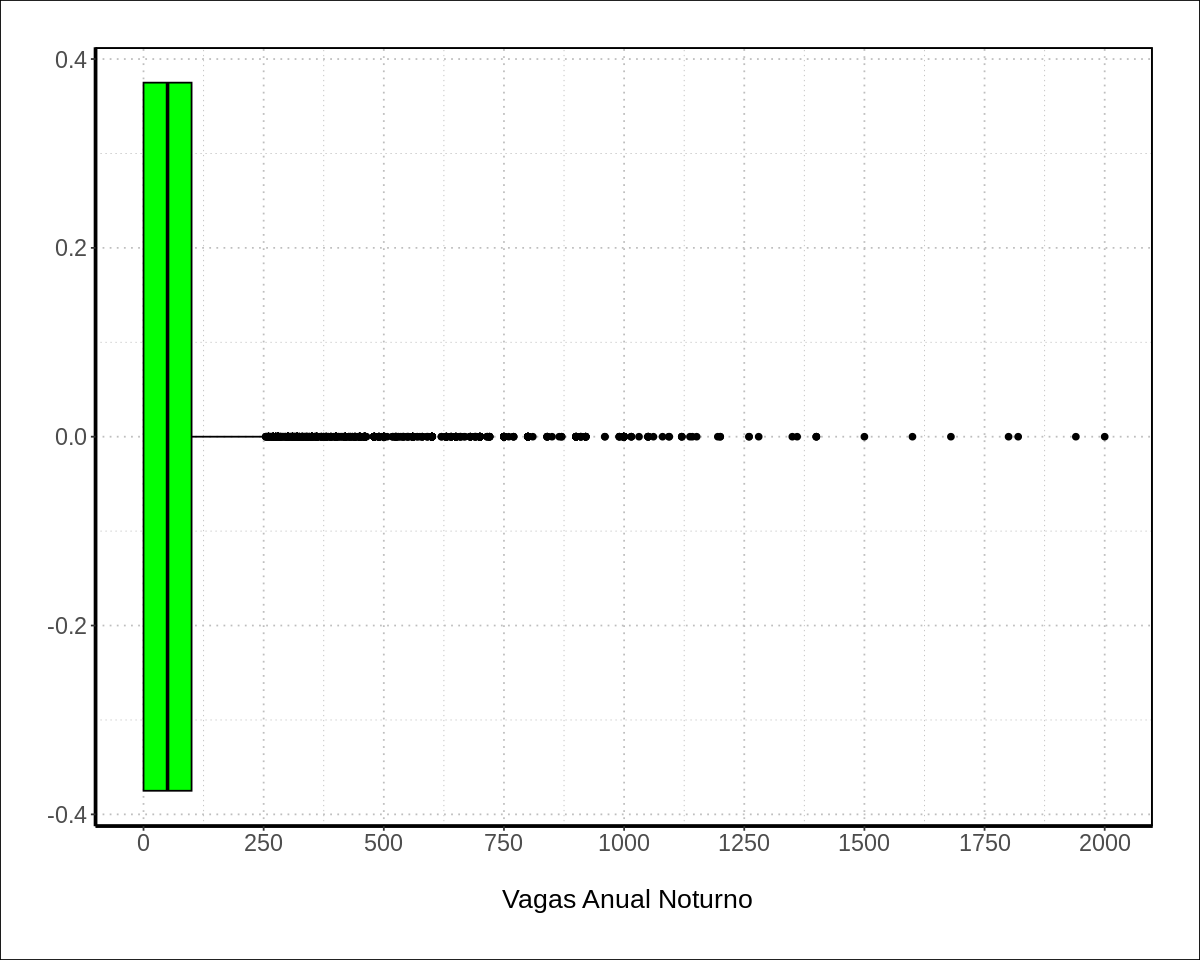

In [ ]:
####################
#    Individual    #
####################

# O código a seguir ajusta as opções de plotagem para definir a largura e altura 
# dos gráficos gerados posteriormente. Em seguida, utiliza a biblioteca ggplot2 para 
# criar um boxplot a partir do dataframe "df_trienio". O eixo x do gráfico é definido 
# como a variável "QT_VAGAS_ANUAL_NOTURNO" do dataframe.
# No código, a função "geom_boxplot()" é usada para desenhar o boxplot, onde os 
# retângulos que representam os quartis e a mediana são preenchidos em verde. Os 
# argumentos "fill", "color" e "size" são usados para definir a cor de preenchimento, 
# a cor da borda e a espessura da linha, respectivamente.
# Em seguida, são aplicadas diversas configurações estéticas ao gráfico, como a definição 
# dos rótulos dos eixos x e y usando a função "labs()", o ajuste do tamanho das f
# ontes dos eixos e do título do gráfico utilizando as funções 
# "theme(axis.text = element_text(), axis.title = element_text(), plot.title = element_text())". 
# Além disso, são definidos estilos para as grades do painel, fundo do painel, 
# fundo do gráfico, margem do gráfico, borda do painel e linha dos eixos.
# A função "scale_x_continuous()" é usada para configurar a escala do eixo x. Os 
# limites do eixo são definidos com base nos valores mínimos e máximos da variável 
# "QT_VAGAS_ANUAL_NOTURNO" do dataframe. Além disso, são especificados os intervalos 
# dos rótulos do eixo x com base em uma sequência de valores.
# O objetivo desse código é gerar um gráfico boxplot que representa a distribuição 
# dos valores da variável "QT_VAGAS_ANUAL_NOTURNO" do dataframe "df_trienio", com 
# personalizações visuais e configurações estéticas para melhor apresentação dos dados.

options(repr.plot.width=10, repr.plot.height=8)

ggplot(df_trienio, aes(x = QT_VAGAS_ANUAL_NOTURNO)) +
  geom_boxplot(fill = "green", color = "black", size = 0.5) +
  labs(x = "\n Vagas Anual Noturno") +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 16)) +
  theme(plot.title = element_text(size = 18)) +
  theme(panel.grid.major = element_line(linetype = "dotted", color = "gray", size = 0.5),
        panel.grid.minor = element_line(linetype = "dotted", color = "gray", size = 0.25)) +
  theme(panel.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(plot.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(legend.position = "none") +
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm")) +
  theme(panel.border = element_rect(colour = "black", fill = NA, size = 1, linewidth = 0.5)) +
  theme(axis.line = element_line(colour = "black", size = 1, linewidth = 0.5)) +
  scale_x_continuous(limits = c(min(df_trienio$QT_VAGAS_ANUAL_NOTURNO), max(df_trienio$QT_VAGAS_ANUAL_NOTURNO)),
                      breaks = seq(min(df_trienio$QT_VAGAS_ANUAL_NOTURNO), max(df_trienio$QT_VAGAS_ANUAL_NOTURNO), 250))

**11.2 Outliers**

Outliers são valores que se afastam significativamente do restante dos dados em um conjunto de dados. Eles podem ser resultado de erros de medição ou representar valores extremos dentro da população em análise. Identificar outliers é importante para entender a distribuição dos dados e tomar decisões informadas em análises estatísticas. Existem diversas técnicas para identificar outliers, como a análise de boxplot, o cálculo de desvio padrão e o método interquartil.

In [ ]:
##############################################
#   Identificação das linhas com outliers    #
##############################################

# O código a seguir realiza cálculos estatísticos para identificar e destacar as 
# linhas que contêm outliers na coluna especificada. Primeiramente, é atribuído o 
# nome da coluna a uma variável chamada "coluna". Em seguida, são calculados o primeiro 
# quartil (Q1) e o terceiro quartil (Q3) usando a função "quantile()" aplicada à 
# coluna correspondente do dataframe "df_trienio".
# A partir dos valores do primeiro e terceiro quartis, é calculada a amplitude interquartil 
# (IQR) como a diferença entre Q3 e Q1.
# Em seguida, são determinados os limites superior e inferior para identificar os 
# outliers. O limite superior é calculado somando 1,5 vezes o IQR ao valor de Q3, 
# enquanto o limite inferior é obtido subtraindo 1,5 vezes o IQR do valor de Q1.
# Posteriormente, é utilizada a função "which()" para obter as linhas do dataframe 
# que possuem valores acima do limite superior, armazenando o resultado na variável "outlier_linhas".
# Por fim, é exibida uma mensagem que indica as linhas do dataframe "df_trienio" que 
# contêm outliers para a coluna especificada, usando a função "cat()" para imprimir o texto.

coluna <- "QT_VAGAS_ANUAL_NOTURNO"

Q1 <- quantile(df_trienio[[coluna]], 0.25)

Q3 <- quantile(df_trienio[[coluna]], 0.75)

IQR <- Q3 - Q1

limite_superior <- Q3 + (1.5 * IQR)

limite_inferior <- Q1 - (1.5 * IQR)

outlier_linhas <- which(df_trienio[[coluna]] > limite_superior)

cat("Linhas com outliers para a", coluna, "do dataframe df_trienio: \n\n", outlier_linhas)

Linhas com outliers para a QT_VAGAS_ANUAL_NOTURNO do dataframe df_trienio: 

 32 100 108 115 127 129 192 202 230 231 234 236 239 241 242 243 244 245 286 307 309 331 418 441 545 553 557 635 779 786 795 900 982 1034 1045 1059 1064 1113 1120 1123 1337 1341 1470 1501 1508 1532 1538 1669 1672 1701 1707 1710 1712 1723 1740 1935 2004 2072 2098 2135 2137 2143 2151 2202 2203 2204 2205 2208 2209 2211 2212 2315 2331 2344 2360 2408 2414 2478 2531 2542 2560 2584 2634 2664 2866 2895 2919 3005 3056 3073 3074 3075 3076 3077 3078 3111 3121 3128 3138 3236 3238 3267 3272 3275 3309 3341 3422 3436 3661 3664 3665 3666 3667 3668 3669 3671 3731 3745 3748 3755 3759 3792 3886 4013 4020 4248 4254 4499 4502 4503 4504 4506 4515 4723 5173 5257 5259 5688 5693 5750 5845 5881 5882 5883 5885 5886 5898 5901 6089 6091 6092 6093 6094 6095 6096 6098 6122 6123 6229 6449 6570 6722 6741 6746 6757 6854 6855 6860 6882 6963 6988 6992 6993 6994 6995 6997 6998 7091 7104 7153 7154 7172 7174 7176 7177 7178 7179 7203 7212 7213 7214 7

In [ ]:
###########################################################
#   Número de outliers por coluna que inicia com "QT_"    #
###########################################################

# O código a seguir tem como objetivo contar e exibir a quantidade de outliers 
# em cada coluna do dataframe "df_trienio" que começa com "QT_".
# Primeiramente, é criado um novo dataframe chamado "df" que contém apenas as colunas 
# do dataframe "df_trienio" que satisfazem a condição especificada utilizando a função "grep()".
# Em seguida, é definida uma função chamada "contar_outliers" que recebe como argumento 
# uma coluna e realiza o cálculo do número de outliers presente nessa coluna.
# Dentro da função, a coluna é filtrada para remover os valores iguais a zero, 
# utilizando a sintaxe "coluna[coluna != 0]".
# Em seguida, é verificado se a coluna não possui nenhum valor após a filtragem. 
# Caso isso ocorra, a função retorna zero indicando que não há outliers.
# Caso contrário, são calculados o primeiro quartil (q[1]) e o terceiro quartil 
# (q[2]) da coluna utilizando a função "quantile()".
# A amplitude interquartil (iqr) é calculada como a diferença entre o terceiro e 
# o primeiro quartil.
# Um limiar é definido como 1.5, que será multiplicado pelo iqr para determinar os 
# limites superiores e inferiores dos outliers.
# A variável "outliers" é criada para armazenar um vetor de booleanos que indica 
# quais valores da coluna são outliers, usando operadores lógicos e comparações com 
# os limites.
# Por fim, a função retorna a soma dos valores "TRUE" no vetor "outliers", ou seja, 
# a quantidade de outliers presentes na coluna.
# Em seguida, a função "sapply()" é utilizada para aplicar a função "contar_outliers" 
# a cada coluna do dataframe "df".
# Os resultados são armazenados em "outliers_por_coluna".
# Em seguida, é feito um filtro para selecionar apenas as colunas que possuem outliers, 
# descartando aquelas com quantidade igual a zero.
# Os resultados são organizados em uma tabela chamada "outliers_table" usando a 
# função "data.frame()".
# Por fim, a tabela é impressa na saída utilizando a função "print()".

df <- df_trienio[, grep("^QT_", colnames(df_trienio))]

contar_outliers <- function(coluna) {
  coluna <- coluna[coluna != 0] 
  if (length(coluna) == 0) {
    return(0)
  }
  q <- quantile(coluna, probs = c(0.25, 0.75))
  iqr <- q[2] - q[1]
  limiar <- 1.5 
  outliers <- (coluna < q[1] - limiar*iqr) | (coluna > q[2] + limiar*iqr)
  return(sum(outliers))
}

outliers_por_coluna <- sapply(df, contar_outliers)

outliers_por_coluna <- outliers_por_coluna[outliers_por_coluna != 0]

outliers_table <- data.frame(Outliers = outliers_por_coluna)

print(outliers_table)

                              Outliers
QT_MATRICULA_TOTAL                6379
QT_CONCLUINTE_TOTAL               4628
QT_INGRESSO_TOTAL                 5998
QT_INSC_ANUAL_INTEGRAL             583
QT_INSC_ANUAL_MATUTINO            1428
QT_INSC_ANUAL_VESPERTINO           319
QT_INSC_ANUAL_NOTURNO             3358
QT_INSC_ANUAL_EAD                  151
QT_VAGAS_ANUAL_INTEGRAL            405
QT_VAGAS_ANUAL_MATUTINO           2165
QT_VAGAS_ANUAL_VESPERTINO          222
QT_VAGAS_ANUAL_NOTURNO            4237
QT_VAGAS_ANUAL_EAD                 216
QT_INGRESSO_PROCESSO_SELETIVO     5648
QT_VAGA_TOTAL                     5003
QT_INSCRITO_TOTAL                 7460


In [ ]:
################################
#    Intervalo Interquartil    #
################################

# O código a seguir tem como objetivo calcular o intervalo interquartil (IQR) para 
# cada coluna do dataframe "df_trienio" que começa com "QT_" e exibir os valores não 
# nulos do IQR em uma tabela.
# Inicialmente, é criado um novo dataframe chamado "df" que contém apenas as colunas 
# do dataframe "df_trienio" que satisfazem a condição especificada utilizando a função 
# "grep()". Essas colunas contêm valores quantitativos a partir das quais o IQR será calculado.
# Em seguida, são calculados os primeiros quartis (Q1) e os terceiros quartis (Q3) 
# para cada coluna do dataframe "df" utilizando a função "apply()" com o argumento 
# "2" indicando que a função será aplicada por coluna. A função "quantile()" é utilizada 
# com o argumento "0.25" para calcular o primeiro quartil e "0.75" para calcular o 
# terceiro quartil.
# O IQR é calculado como a diferença entre o terceiro e o primeiro quartil para cada 
# coluna utilizando o operador "-". Os valores não nulos do IQR são selecionados 
# utilizando a sintaxe "IQR[IQR != 0]" e armazenados na variável "nao_zero_IQR".
# A tabela "outliers_table" é criada utilizando a função "data.frame()" com a coluna 
# "IQR" contendo os valores não nulos do IQR.
# Por fim, a tabela é impressa na saída utilizando a função "print()". A tabela exibirá 
# os valores do IQR para cada coluna do dataframe "df_trienio" que não forem iguais a 
# zero, proporcionando uma visão dos intervalos interquartis para as variáveis quantitativas.

df <- df_trienio[, grep("^QT_", colnames(df_trienio))]

Q1 <- apply(df, 2, quantile, 0.25)
Q3 <- apply(df, 2, quantile, 0.75)
IQR <- Q3 - Q1

nao_zero_IQR <- IQR[IQR != 0]

outliers_table <- data.frame(IQR = nao_zero_IQR)
print(outliers_table)

                              IQR
QT_MATRICULA_TOTAL            191
QT_CONCLUINTE_TOTAL            38
QT_INGRESSO_TOTAL              69
QT_INSC_ANUAL_NOTURNO          88
QT_VAGAS_ANUAL_MATUTINO        40
QT_VAGAS_ANUAL_NOTURNO        100
QT_INGRESSO_PROCESSO_SELETIVO  65
QT_VAGA_TOTAL                 108
QT_INSCRITO_TOTAL             227


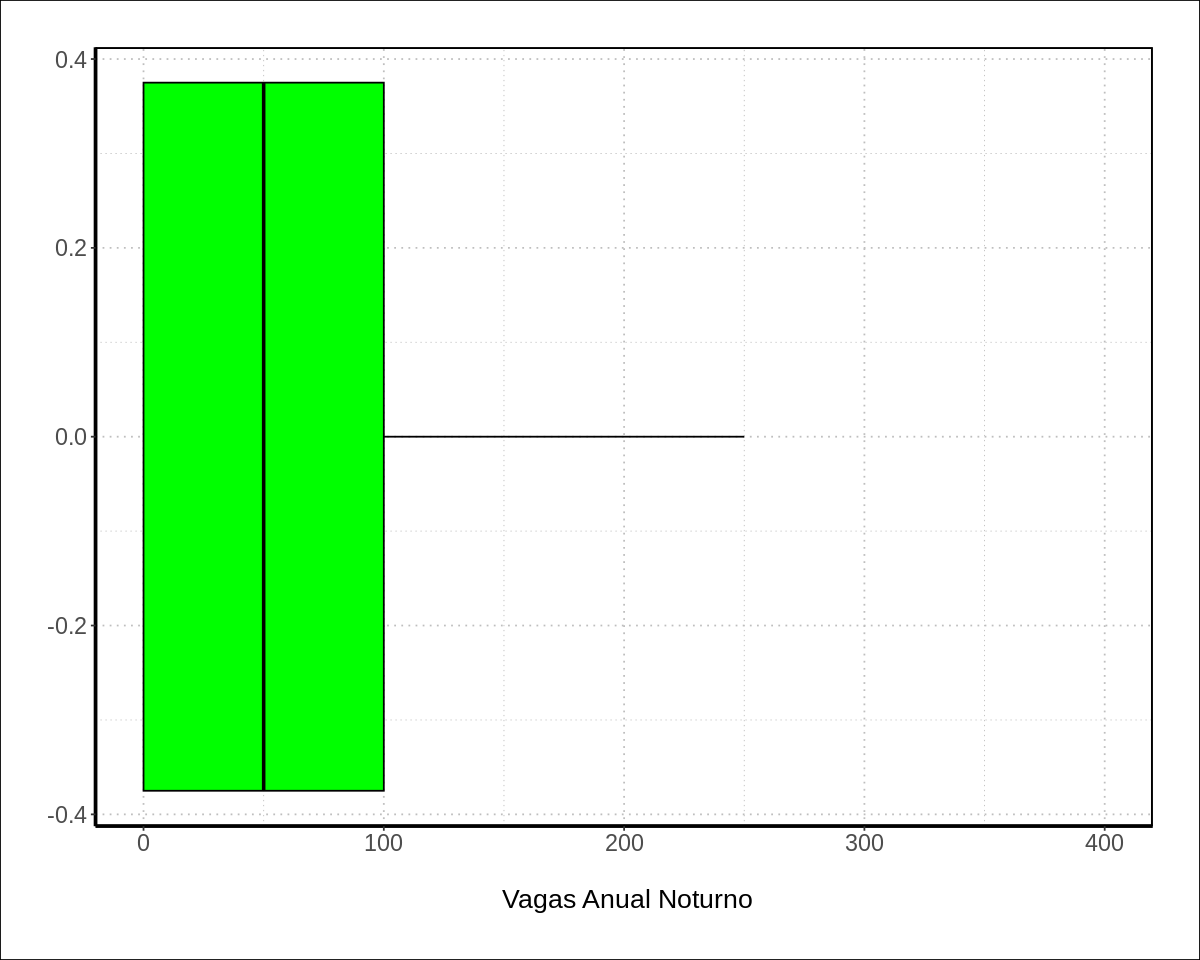

In [ ]:
##################################################
#   Remoção de outliers - Apenas graficamente    #
##################################################

# O código a seguir tem como objetivo criar um gráfico de boxplot utilizando a 
# biblioteca ggplot2 no R. Primeiramente, é definido o tamanho da figura utilizando 
# as opções "repr.plot.width" e "repr.plot.height".
# Em seguida, é utilizado o comando "ggplot()" para especificar o dataframe "df_trienio" 
# e mapear a variável "QT_VAGAS_ANUAL_NOTURNO" no eixo x.
# A função "geom_boxplot()" é usada para criar o próprio boxplot. O argumento "outlier.shape = NA" 
# é utilizado para omitir a representação gráfica dos outliers. A cor de preenchimento 
# do boxplot é definida como verde ("fill = 'green'"), a cor das linhas é preta ("color = 'black'") 
# e a espessura das linhas é definida como 0.5 ("size = 0.5").
# Em seguida, são configurados os rótulos do eixo x através da função 
# "labs(x = '\n Vagas Anual Noturno')". O texto dos rótulos e títulos dos eixos são 
# definidos com as funções "axis.text" e "axis.title" do pacote "theme", respectivamente.
# Outros aspectos visuais do gráfico, como as grades, plano de fundo e margens, são 
# ajustados através das funções "theme(panel.grid.major)", "theme(panel.grid.minor)", 
# "theme(panel.background)", "theme(plot.background)", "theme(plot.title)", 
# "theme(legend.position)", "theme(plot.margin)", "theme(panel.border)" e "theme(axis.line)".
# Por fim, a função "coord_cartesian()" é usada para limitar o eixo x do gráfico ao 
# intervalo de valores entre 0 e o valor máximo do boxplot somado a 1,5 vezes o IQR 
# (Intervalo Interquartil) da variável "QT_VAGAS_ANUAL_NOTURNO" do dataframe 
# "df_trienio". Isso garante que o gráfico seja ajustado adequadamente aos dados.
# Em resumo, o código cria um gráfico de boxplot para visualizar a distribuição da 
# variável "QT_VAGAS_ANUAL_NOTURNO" no dataframe "df_trienio", ajustando o estilo 
# e os limites do gráfico para uma apresentação visualmente agradável.

options(repr.plot.width=10, repr.plot.height=8)

ggplot(df_trienio, aes(x = QT_VAGAS_ANUAL_NOTURNO)) +
  geom_boxplot(outlier.shape = NA, fill = "green", color = "black", size = 0.5) +
  labs(x = "\n Vagas Anual Noturno") +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 16)) +
  theme(plot.title = element_text(size = 18)) +
  theme(panel.grid.major = element_line(linetype = "dotted", color = "gray", size = 0.5),
        panel.grid.minor = element_line(linetype = "dotted", color = "gray", size = 0.25)) +
  theme(panel.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(plot.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(legend.position = "none") +
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm")) +
  theme(panel.border = element_rect(colour = "black", fill = NA, size = 1, linewidth = 0.5)) +
  theme(axis.line = element_line(colour = "black", size = 1, linewidth = 0.5)) +
  coord_cartesian(xlim = c(0, boxplot.stats(df_trienio$QT_VAGAS_ANUAL_NOTURNO)$stats[5] + 1.5 * IQR(df_trienio$QT_VAGAS_ANUAL_NOTURNO)))


In [ ]:
###########################################
#   Remoção de outliers - No dataframe    #
###########################################

# O código a seguir realiza uma filtragem de um dataframe chamado "df_trienio" 
# para selecionar apenas as colunas que possuem nomes iniciados por "QT_". Em seguida, 
# são calculados os valores do primeiro quartil (Q1) e terceiro quartil (Q3) para 
# cada uma das colunas selecionadas, utilizando a função "apply" com o argumento "2" 
# para aplicar a operação por coluna.
# Com base nos valores do Q1 e Q3, é calculado o Intervalo Interquartil (IQR) para 
# cada coluna. O limite inferior é definido como Q1 subtraído de 1,5 vezes o IQR, 
# e o limite superior é definido como Q3 adicionado de 1,5 vezes o IQR. Esses limites 
# são utilizados para identificar os outliers.
# Em seguida, é criado um novo dataframe chamado "df_sem_outliers", que contém apenas 
# as linhas em que todos os valores estão dentro dos limites definidos. Isso é feito 
# utilizando a função "apply" com o argumento "1" para aplicar a operação por linha, 
# verificando se todos os valores da linha estão dentro dos limites definidos.
# Por fim, são exibidas as primeiras linhas do dataframe "df_sem_outliers" utilizando 
# a função "head". Dessa forma, o código filtra o dataframe original removendo as 
# linhas que possuem outliers nas colunas selecionadas, resultando em um novo dataframe 
# com valores sem outliers.

df <- df_trienio[grep("^QT_", names(df_trienio))] # select columns starting with "QT_"

Q1 <- apply(df, 2, quantile, probs=0.25, na.rm=TRUE)
Q3 <- apply(df, 2, quantile, probs=0.75, na.rm=TRUE)

IQR <- Q3 - Q1

lim_inferior <- Q1 - 1.5 * IQR
lim_superior <- Q3 + 1.5 * IQR

df_sem_outliers <- df[apply(df, 1, function(row) all(row >= lim_inferior & row <= lim_superior)), ]

head(df_sem_outliers)

,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL,QT_INSC_VAGA_NOVA_INTEGRAL,QT_INSC_VAGA_NOVA_MATUTINO,QT_INSC_VAGA_NOVA_VESPERTINO,QT_INSC_VAGA_NOVA_NOTURNO,QT_INSC_VAGA_NOVA_EAD,QT_INSC_VAGA_REMAN_INTEGRAL,QT_INSC_VAGA_REMAN_MATUTINO,⋯,QT_VAGAS_OUTRAS_EAD,QT_VAGAS_ANUAL_INTEGRAL,QT_VAGAS_ANUAL_MATUTINO,QT_VAGAS_ANUAL_VESPERTINO,QT_VAGAS_ANUAL_NOTURNO,QT_VAGAS_ANUAL_EAD,QT_INGRESSO_VAGA_NOVA,QT_INGRESSO_PROCESSO_SELETIVO,QT_VAGA_TOTAL,QT_INSCRITO_TOTAL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,127,38,46,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,45,100,92
4,104,32,23,0,0,0,0,0,0,0,⋯,0,0,0,0,80,0,0,23,80,37
5,123,0,62,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,46,100,109
6,14,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,120,0,0,0,120,0
7,284,53,77,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,77,100,197
8,174,49,37,0,0,0,0,0,0,0,⋯,0,0,0,0,100,0,0,37,100,236


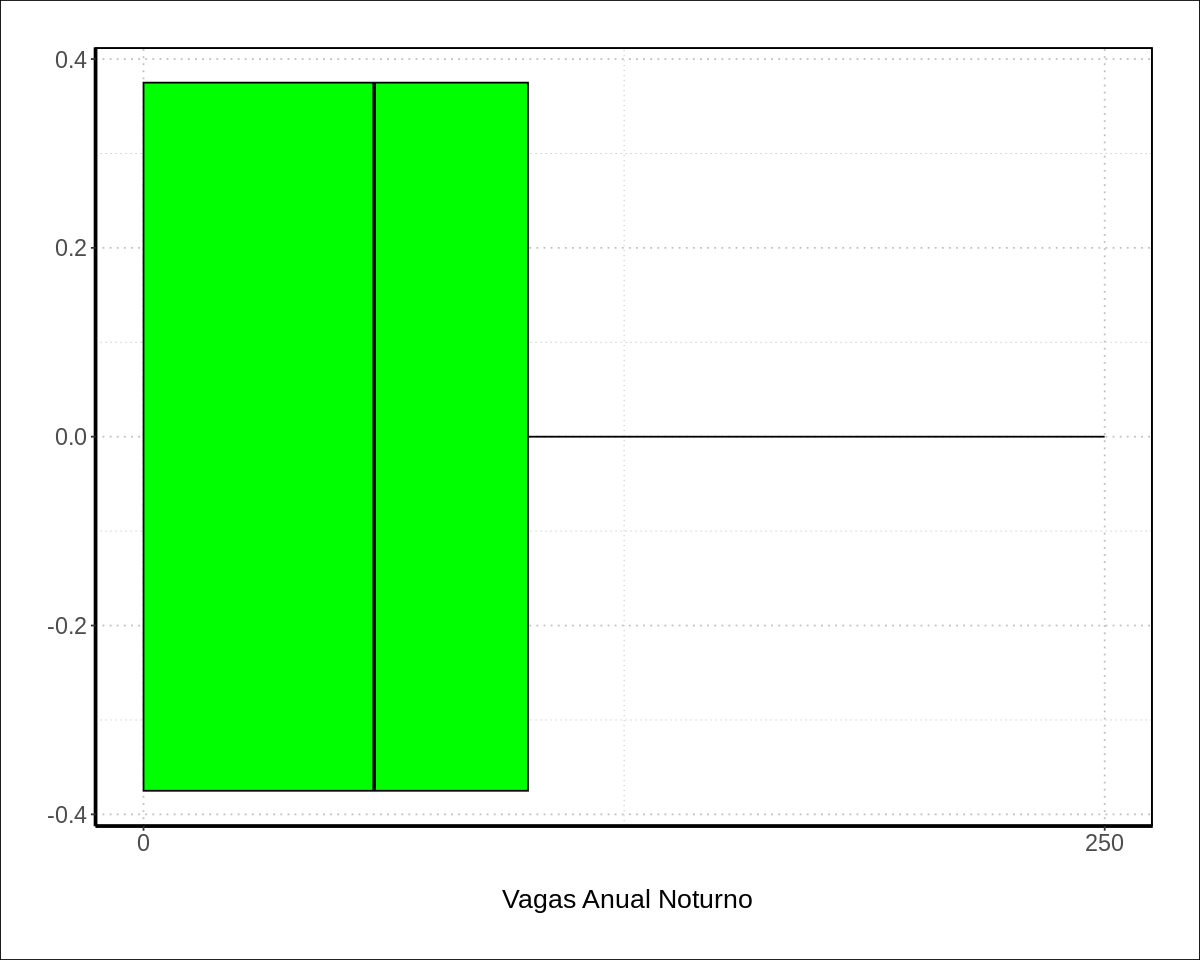

In [ ]:
########################################################################
#     Diagrama de caixas após a remoção dos outliers no dataframe      #
########################################################################

# O código a seguir utiliza a biblioteca ggplot2 para criar um gráfico boxplot 
# com base no dataframe "df_sem_outliers". O gráfico é personalizado com diferentes 
# elementos visuais e opções de tema.
# A função ggplot() define o dataframe a ser utilizado e a variável a ser mapeada 
# no eixo x, que é "QT_VAGAS_ANUAL_NOTURNO" neste caso. Em seguida, a função geom_boxplot() 
# é usada para criar o gráfico boxplot em si, definindo a cor de preenchimento como 
# verde, a cor da borda como preta e o tamanho da linha como 0.5.
# As funções labs(), theme() e scale_x_continuous() são utilizadas para ajustar os 
# rótulos dos eixos, o tema do gráfico e os limites do eixo x, respectivamente. O 
# tema do gráfico é personalizado para definir o tamanho do texto dos eixos, título 
# e grades, além de ajustar as margens, a cor de fundo do painel e do gráfico, a
# posição da legenda e outras propriedades visuais.
# Por fim, a função options() é usada para definir as dimensões da figura do gráfico, 
# especificando a largura e altura em polegadas.
# Em resumo, o código gera um gráfico boxplot para a variável "QT_VAGAS_ANUAL_NOTURNO" 
# do dataframe "df_sem_outliers", com personalizações visuais e ajustes de tema.

options(repr.plot.width=10, repr.plot.height=8)

ggplot(df_sem_outliers, aes(x = QT_VAGAS_ANUAL_NOTURNO)) +
  geom_boxplot(fill = "green", color = "black", size = 0.5) +
  labs(x = "\n Vagas Anual Noturno") +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 16)) +
  theme(plot.title = element_text(size = 18)) +
  theme(panel.grid.major = element_line(linetype = "dotted", color = "gray", size = 0.5),
        panel.grid.minor = element_line(linetype = "dotted", color = "gray", size = 0.25)) +
  theme(panel.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(plot.background = element_rect(fill = "white", colour = "black", linewidth = 0.5)) +
  theme(legend.position = "none") +
  theme(plot.margin = unit(c(1, 1, 1, 1), "cm")) +
  theme(panel.border = element_rect(colour = "black", fill = NA, size = 1, linewidth = 0.5)) +
  theme(axis.line = element_line(colour = "black", size = 1, linewidth = 0.5)) +
  scale_x_continuous(limits = c(min(df_sem_outliers$QT_VAGAS_ANUAL_NOTURNO), max(df_sem_outliers$QT_VAGAS_ANUAL_NOTURNO)),
                      breaks = seq(min(df_sem_outliers$QT_VAGAS_ANUAL_NOTURNO), max(df_sem_outliers$QT_VAGAS_ANUAL_NOTURNO), 250))

In [ ]:
#######################################
#   Quantidade de linhas removidas    #
#######################################

# O código a seguir realiza uma comparação entre dois dataframes: "df_1" e "df_2". 
# Primeiramente, "df_1" é criado selecionando apenas as colunas que possuem nomes 
# que começam com "QT_" do dataframe "df_trienio". Em seguida, "df_2" é criado da 
# mesma maneira, porém a partir do dataframe "df_sem_outliers".
# A função cat() é utilizada para imprimir informações sobre os dataframes. O texto 
# impresso inclui o número de linhas e colunas de cada dataframe. Além disso, é exibida 
# a diferença entre o número de linhas do "df_1" (com outliers) e o número de linhas 
# do "df_2" (sem outliers), representando o número de linhas removidas durante o 
# processo de remoção de outliers.

df_1 <- df_trienio[grep("^QT_", colnames(df_trienio))]

df_2 <- df_sem_outliers[grep("^QT_", colnames(df_sem_outliers))]

cat("df_1 (com outliers):\n\nLinhas =", nrow(df_1),
    "\nColunas =", ncol(df_1),
    "\n\n df_2 (sem outliers):\n\nLinhas =", nrow(df_2),
    "\nColunas =", ncol(df_2),
    "\n\nLinhas removidas =", nrow(df_1) - nrow(df_2))

df_1 (com outliers):

Linhas = 89547 
Colunas = 67 

 df_2 (sem outliers):

Linhas = 47830 
Colunas = 67 

Linhas removidas = 41717

### Barras

Gráficos de barras são representações visuais de dados em que informações são apresentadas por meio de barras retangulares. Essas barras podem ser desenhadas vertical ou horizontalmente e a altura ou comprimento delas representa a magnitude da informação que está sendo apresentada. Eles são uma ferramenta eficaz para visualizar rapidamente as informações e identificar tendências ou padrões, permitindo que tomadas de decisão sejam mais assertivas.

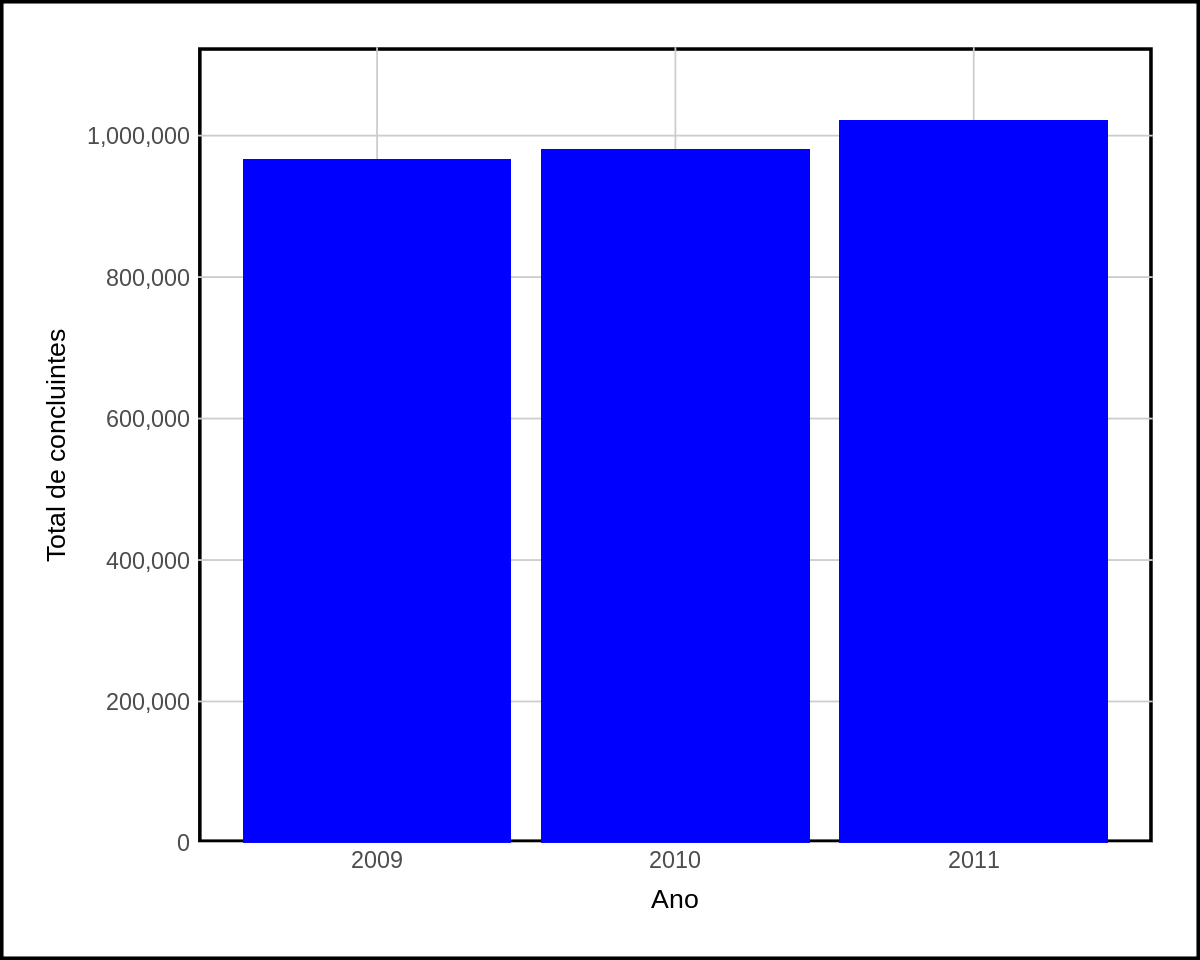

In [ ]:
###########################################
#   Gráfico de barras de uma variável     #
###########################################

# O código a seguir tem como objetivo gerar um gráfico de barras que representa 
# a soma dos concluintes por ano. Primeiramente, é criada a variável "soma_concluintes_por_ano" 
# através do uso do pipe operator ("%>%"). Nessa etapa, o dataframe "df_trienio" é 
# agrupado pelo ano do censo (NU_ANO_CENSO) e, em seguida, é realizada a soma dos 
# valores da variável "QT_CONCLUINTE_TOTAL" para cada grupo. A função "mutate" é 
# usada para converter a variável "NU_ANO_CENSO" para o tipo "character".
# Em seguida, o ggplot é utilizado para criar o gráfico de barras. A estética do 
# gráfico é definida com "aes(x = NU_ANO_CENSO, y = QT_CONCLUINTE_TOTAL)", onde o 
# eixo x representa o ano e o eixo y representa o total de concluintes. A função 
# "geom_bar(stat = 'identity')" é utilizada para criar as barras do gráfico.
# São adicionados rótulos aos eixos x e y com "labs(x = 'Ano', y = 'Total de concluintes')".
# O eixo y é ajustado com a função "scale_y_continuous" para mostrar os valores de 
# forma mais legível, limitando o eixo y ao valor máximo dos dados e definindo 
# intervalos e rótulos específicos.
# O tema do gráfico é personalizado usando as funções "theme_minimal()" e "theme()", 
# definindo elementos como plano de fundo, títulos, tamanhos de texto, grades, 
# bordas e margens. O objetivo é fornecer um gráfico com uma aparência limpa e legível.

options(repr.plot.width=10, repr.plot.height=8)

soma_concluintes_por_ano <- df_trienio %>%
  group_by(NU_ANO_CENSO) %>%
  summarise(QT_CONCLUINTE_TOTAL = sum(QT_CONCLUINTE_TOTAL)) %>%
  mutate(NU_ANO_CENSO = as.character(NU_ANO_CENSO))
##
ggplot(soma_concluintes_por_ano, aes(x = NU_ANO_CENSO, y = QT_CONCLUINTE_TOTAL)) +
  geom_bar(stat = 'identity', fill = 'blue') +
  labs(x = 'Ano', y = 'Total de concluintes') +
  scale_y_continuous(labels = scales::comma, expand = c(0,0), limits = c(0, max(soma_concluintes_por_ano$QT_CONCLUINTE_TOTAL) * 1.1), breaks = seq(0, max(soma_concluintes_por_ano$QT_CONCLUINTE_TOTAL) * 1.1, by = 200000)) +
  expand_limits(y = 0) +
  theme_minimal() +
  theme(
    plot.background = element_rect(fill = "white"),
    panel.background = element_rect(fill = "white"),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    legend.position = "bottom",
    legend.title = element_blank()
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
    axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))
  ) +
  theme(
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  ) +
  theme(
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  ) +
  theme(
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  )


### Barras empilhadas

Gráficos de barras empilhadas são uma variação dos gráficos de barras tradicionais, que permitem visualizar a composição dos dados de uma maneira mais detalhada. Em um gráfico de barras empilhadas, cada barra é dividida em segmentos coloridos que representam diferentes categorias ou subcategorias de dados. Esses segmentos são empilhados uns sobre os outros, permitindo que se visualize a contribuição de cada categoria para o total representado pela barra. Essa técnica é útil para comparar a distribuição de categorias em diferentes grupos de dados.

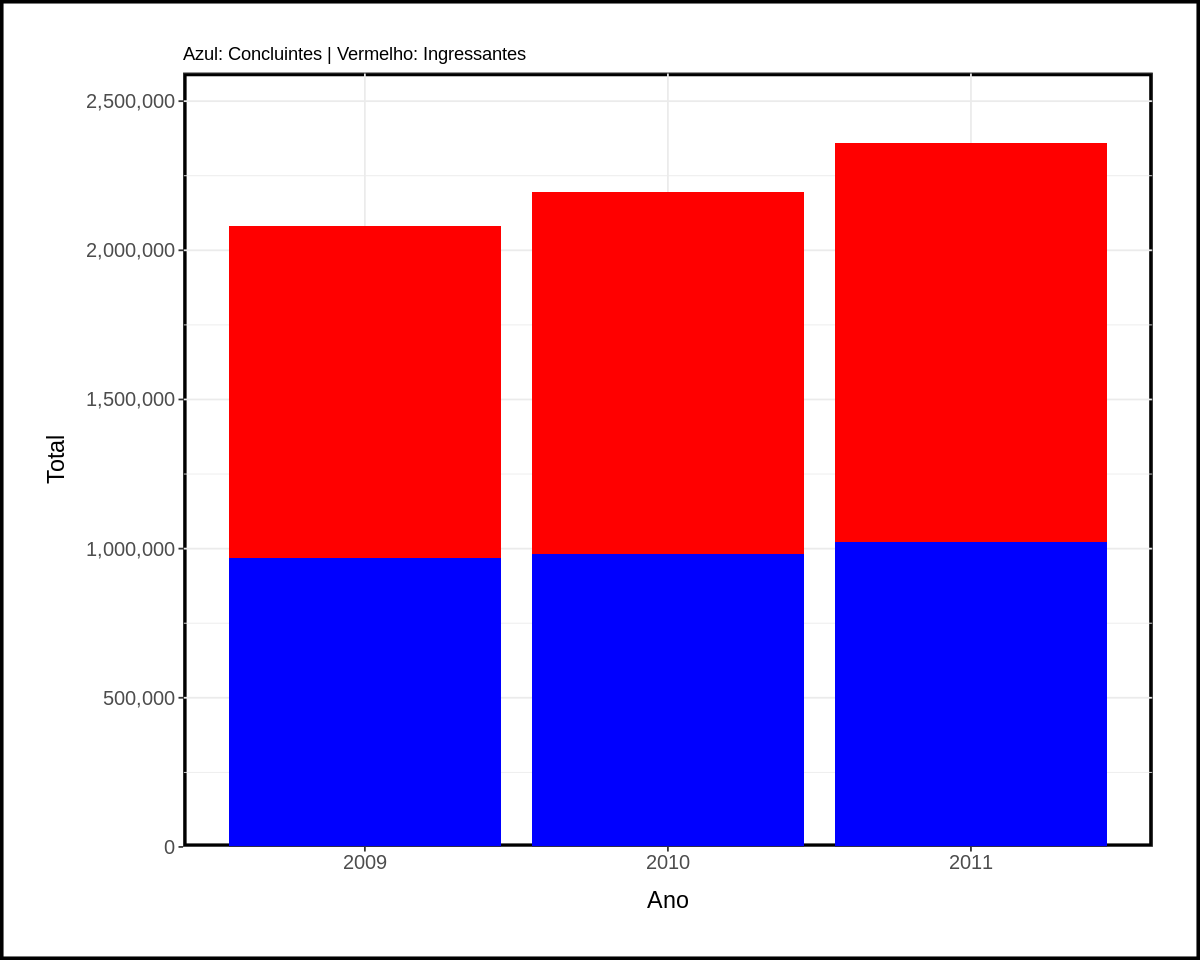

In [ ]:
####################################
#   Gráfico de barras empilhado    #
####################################

# O código a seguir tem como objetivo gerar um gráfico de barras que representa 
# a soma dos concluintes e ingressantes por ano. Inicialmente, é criada a variável 
# "soma_por_ano" utilizando o pipe operator ("%>%"). Nessa etapa, o dataframe "df_trienio" 
# é agrupado pelo ano do censo (NU_ANO_CENSO), e a função "summarise" é utilizada 
# para calcular a soma das variáveis "QT_CONCLUINTE_TOTAL" e "QT_INGRESSO_TOTAL" 
# para cada grupo. Em seguida, a variável "NU_ANO_CENSO" é convertida para o tipo 
# "character" com a função "mutate".
# Após isso, é determinado o valor máximo do eixo y com a variável "max_y", sendo 
# 1.1 vezes o máximo entre as variáveis "QT_INGRESSO_TOTAL" e "QT_CONCLUINTE_TOTAL".
# Utilizando o ggplot, é criado o gráfico de barras. A estética é definida com 
# "aes(x = NU_ANO_CENSO)", indicando que o eixo x representa o ano. São utilizadas 
# duas camadas de barras com "geom_bar", uma para a variável "QT_INGRESSO_TOTAL" 
# e outra para "QT_CONCLUINTE_TOTAL". O parâmetro "fill" define as cores das barras, 
# sendo vermelho para ingressantes e azul para concluintes. Também são adicionados 
# rótulos aos eixos x e y com "labs(x = 'Ano', y = 'Total')", e o título do gráfico 
# é definido com "subtitle".
# O eixo y é ajustado com a função "scale_y_continuous" para exibir rótulos 
# formatados com a função "scales::comma" e com intervalos e limites específicos 
# definidos por "breaks" e "expand". O tema do gráfico é definido com "theme_bw()" 
# e "theme()", estabelecendo elementos visuais como título, margens, plano de fundo, 
# legendas, tamanhos de texto e estilos.
# Por fim, é adicionada uma legenda com "guides(fill=guide_legend(title="Legenda"))" 
# para representar as cores das barras.

options(repr.plot.width=10, repr.plot.height=8)

soma_por_ano <- df_trienio %>%
  group_by(NU_ANO_CENSO) %>%
  summarise(QT_CONCLUINTE_TOTAL = sum(QT_CONCLUINTE_TOTAL),
            QT_INGRESSO_TOTAL = sum(QT_INGRESSO_TOTAL)) %>%
  mutate(NU_ANO_CENSO = as.character(NU_ANO_CENSO))

soma_por_ano$NU_ANO_CENSO <- as.character(as.integer(soma_por_ano$NU_ANO_CENSO))

####

max_y <- max(soma_por_ano$QT_INGRESSO_TOTAL, soma_por_ano$QT_CONCLUINTE_TOTAL) * 1.1

ggplot(soma_por_ano, aes(x = NU_ANO_CENSO)) +
  geom_bar(aes(y = QT_INGRESSO_TOTAL), stat = "identity", fill = "red", position = "stack") +
  geom_bar(aes(y = QT_CONCLUINTE_TOTAL), stat = "identity", fill = "blue") +
  labs(x = "Ano", y = "Total", fill = NULL, 
       subtitle = "Azul: Concluintes | Vermelho: Ingressantes") +
  scale_y_continuous(labels = scales::comma, 
                     breaks = seq(0, max_y, 500000), 
                     expand = expansion(mult = c(0, 0.1))) +
  theme_bw() +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
    axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)),
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black"),
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    legend.position = "bottom",
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 14)
  ) +
  guides(fill=guide_legend(title="Legenda"))

In [ ]:
head(soma_por_ano)

NU_ANO_CENSO,QT_CONCLUINTE_TOTAL,QT_INGRESSO_TOTAL
<chr>,<int>,<int>
2009,967558,2081382
2010,980662,2196822
2011,1022711,2359409


### Mapas de calor

Gráficos do tipo mapa de calor são uma representação visual de dados que utiliza cores para indicar a magnitude de uma variável em relação a outras. Geralmente, são utilizados em análises de dados multidimensionais, em que é necessário identificar padrões ou correlações entre variáveis. O mapa de calor é construído a partir de uma matriz de dados, em que as linhas representam uma variável e as colunas representam outra. Cada célula da matriz é preenchida com uma cor que representa o valor da variável em relação às outras. Quanto mais escuro o tom da cor, maior o valor da variável, e quanto mais claro, menor o valor.

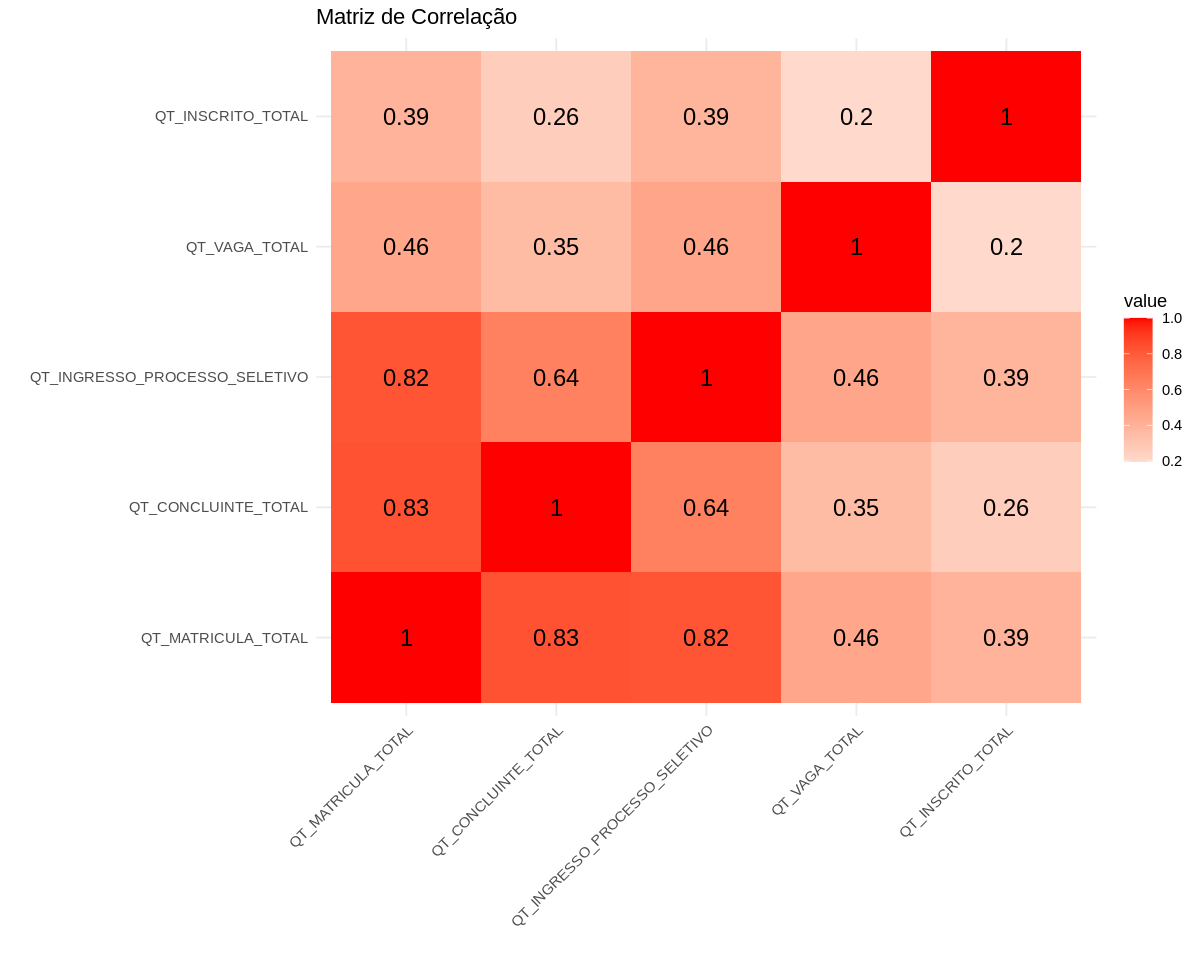

In [ ]:
#######################
#    Mapa de calor    #
#######################

# O código apresentado tem como objetivo criar um gráfico de matriz de correlação. 
# Primeiramente, são definidas as colunas a serem consideradas na análise, armazenadas 
# na variável "cols". Em seguida, a função "cor" é aplicada ao dataframe "df_trienio" 
# para calcular a correlação entre as colunas especificadas, utilizando o parâmetro 
# "use = 'complete.obs'" para lidar com valores ausentes.
# O próximo passo é transformar a matriz de correlação em um formato longo com a 
# função "melt", resultando no dataframe "melted_corr". Essa etapa é necessária para 
# que o ggplot possa plotar a matriz de correlação como um gráfico de tile.
# Utilizando o ggplot, é criado o gráfico de matriz de correlação. A estética é definida 
# com "aes(Var1, Var2, fill = value)", em que "Var1" e "Var2" representam as variáveis 
# que compõem a matriz e "value" representa os valores de correlação. A função "geom_tile" 
# é utilizada para criar os blocos de cor que representam as correlações.
# A escala de cores é definida com "scale_fill_gradient2", utilizando uma escala de 
# cores que vai do azul (low) ao vermelho (high), passando pelo branco (mid). O ponto 
# de transição é definido pelo parâmetro "midpoint". São adicionados rótulos aos 
# eixos x e y com "labs(title = 'Matriz de Correlação', x = '', y = '')".
# O tema do gráfico é definido com "theme_minimal()" e "theme()", estabelecendo 
# elementos visuais como texto do eixo x inclinado, cor e tamanho do texto dos 
# valores de correlação.
# Por fim, a função "geom_text" é utilizada para adicionar os valores de correlação 
# no gráfico. Os valores são arredondados com "round(value, 2)" e são exibidos em 
# preto com tamanho de fonte 3.

options(repr.plot.width=10, repr.plot.height=8)

cols <- c('QT_MATRICULA_TOTAL', 'QT_CONCLUINTE_TOTAL', 'QT_INGRESSO_PROCESSO_SELETIVO', 'QT_VAGA_TOTAL', 'QT_INSCRITO_TOTAL')
corr <- cor(df_trienio[, cols], use="complete.obs")

melted_corr <- melt(corr)

ggplot(melted_corr, aes(Var1, Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low="blue", mid="white", high="red", midpoint=0) +
  labs(title = "Matriz de Correlação", x = "", y = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle=45, hjust=1)) +
  geom_text(aes(label=round(value,2)), color="black", size=5) 

### Dispersão

Gráficos de dispersão são uma forma de visualização de dados que mostram a relação entre duas variáveis numéricas. Cada ponto no gráfico representa um par de valores para essas duas variáveis, e a posição desses pontos no espaço do gráfico indica a magnitude de cada uma delas. Esses gráficos são particularmente úteis para detectar possíveis correlações entre as variáveis e identificar possíveis outliers ou padrões nos dados. Através da análise visual do gráfico de dispersão, é possível obter insights valiosos sobre a relação entre as variáveis estudadas.

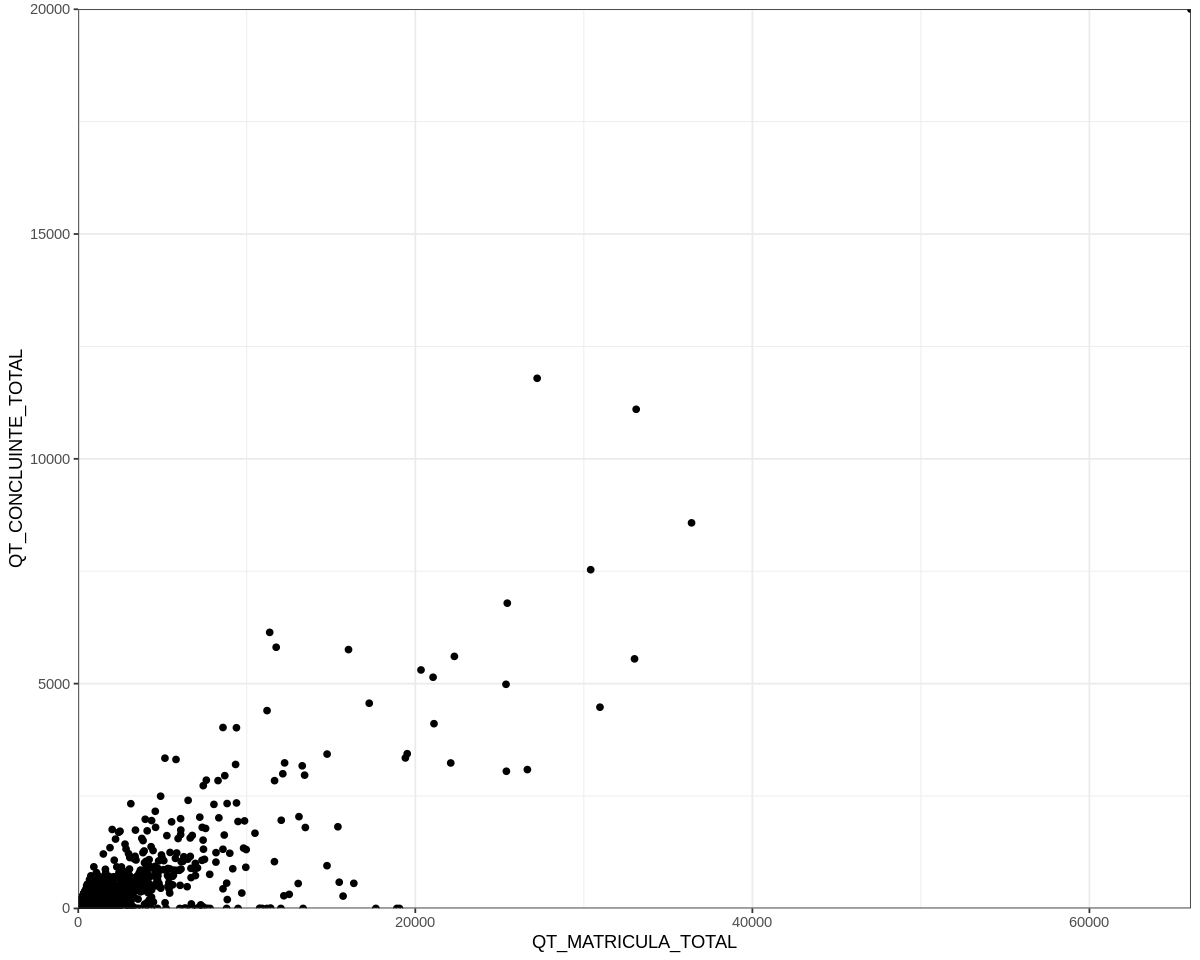

In [ ]:
#################################
#   Dispersão - Com outliers    #
#################################

# O código abaixo tem como objetivo criar um gráfico de dispersão (scatter plot) 
# usando o pacote ggplot2. Primeiro, são definidas as dimensões da figura com 
# "options(repr.plot.width=10, repr.plot.height=8)", que ajusta a largura e a 
# altura do gráfico.
# Em seguida, é criado o objeto "fig" que contém o gráfico. O dataframe "df_trienio" 
# é utilizado como fonte de dados. A estética é definida com 
# "aes(x = QT_MATRICULA_TOTAL, y = QT_CONCLUINTE_TOTAL)", em que "QT_MATRICULA_TOTAL" 
# representa a variável para o eixo x e "QT_CONCLUINTE_TOTAL" representa a variável 
# para o eixo y.
# O "geom_point" é utilizado para plotar os pontos no gráfico, representando a relação 
# entre as variáveis. Em seguida, são adicionados rótulos para os eixos x e y com 
# "labs(x = 'QT_MATRICULA_TOTAL', y = 'QT_CONCLUINTE_TOTAL')".
# As escalas dos eixos x e y são definidas como contínuas com "scale_x_continuous" 
# e "scale_y_continuous", respectivamente. A opção "expand = expansion(mult = c(0, 0))" 
# remove a expansão dos limites dos eixos, garantindo que os pontos fiquem exatamente 
# nos limites do gráfico.
# O tema do gráfico é definido com "theme_bw()", que aplica um tema de fundo branco 
# com linhas pretas.
# Por fim, o gráfico é impresso na saída com "print(fig)". Isso exibe o gráfico na 
# tela ou gera uma visualização, dependendo do ambiente de execução.

options(repr.plot.width=10, repr.plot.height=8)

fig <- ggplot(df_trienio, aes(x=QT_MATRICULA_TOTAL, y=QT_CONCLUINTE_TOTAL)) +
  geom_point() +
  labs(x = "QT_MATRICULA_TOTAL", y = "QT_CONCLUINTE_TOTAL") +
  scale_x_continuous(expand = expansion(mult = c(0, 0))) +
  scale_y_continuous(expand = expansion(mult = c(0, 0))) +
  theme_bw()

print(fig)

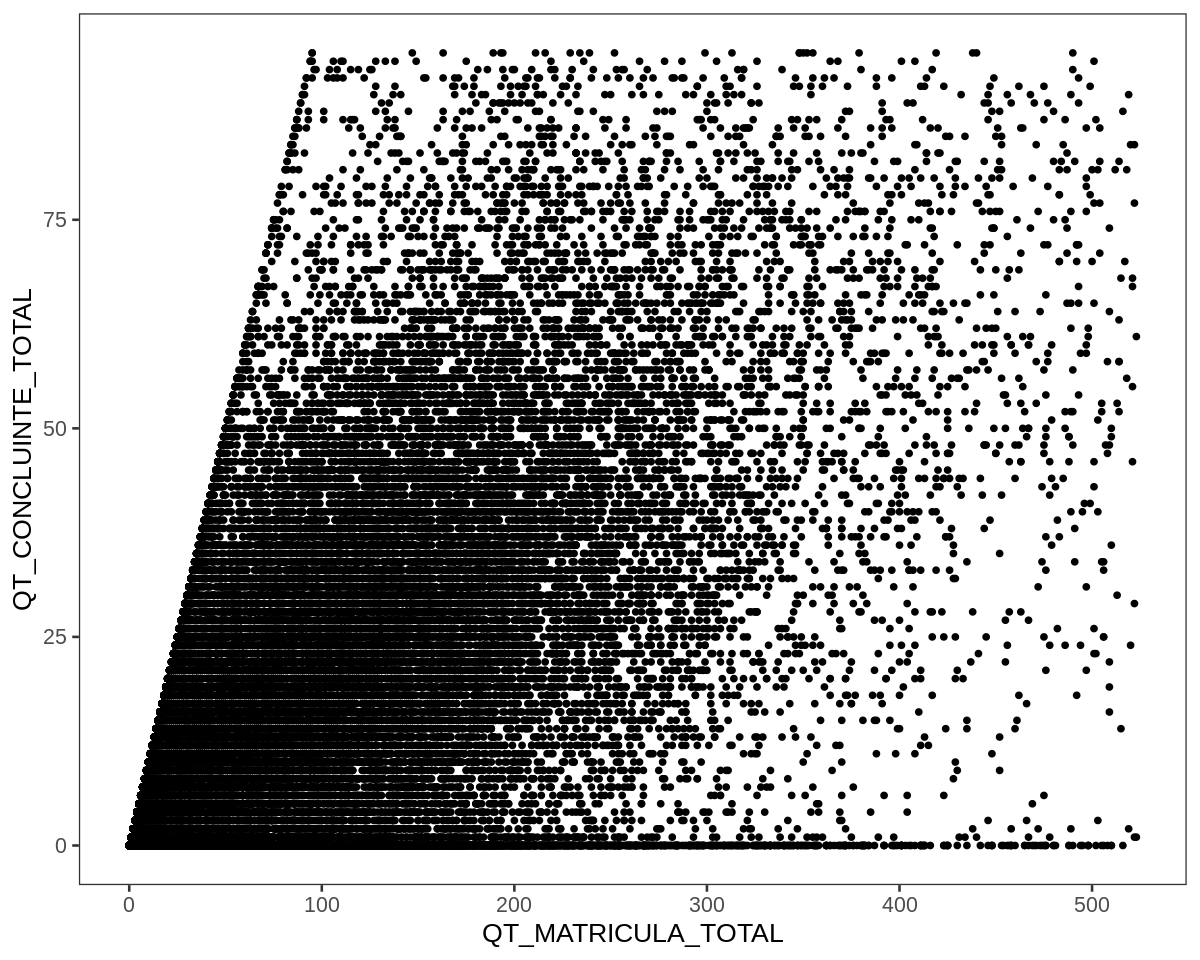

In [ ]:
#################################
#   Dispersão - Sem outliers    #
#################################

# O código a seguir tem como objetivo criar um gráfico de dispersão (scatter plot) 
# usando o pacote ggplot2. Inicialmente, são definidas as dimensões da figura com 
# "options(repr.plot.width=10, repr.plot.height=8)", estabelecendo a largura e a 
# altura do gráfico.
# Em seguida, é criado o objeto "fig" que contém o gráfico. O dataframe "df_sem_outliers" 
# é especificado como a fonte de dados. A estética do gráfico é definida com 
# "aes(x = QT_MATRICULA_TOTAL, y = QT_CONCLUINTE_TOTAL)", em que "QT_MATRICULA_TOTAL" 
# representa a variável para o eixo x e "QT_CONCLUINTE_TOTAL" representa a variável 
# para o eixo y.
# O "geom_point" é utilizado para plotar os pontos no gráfico, representando a 
# relação entre as variáveis. Os rótulos para os eixos x e y são adicionados com 
# "labs(x = 'QT_MATRICULA_TOTAL', y = 'QT_CONCLUINTE_TOTAL')".
# As escalas dos eixos x e y são definidas como contínuas com "scale_x_continuous" e 
# "scale_y_continuous", respectivamente. O argumento "limits" é usado para definir 
# os limites dos eixos. No caso, "c(0, NA)" indica que o limite inferior é 0 e o 
# limite superior é calculado automaticamente com base nos dados.
# O tema do gráfico é definido como "theme_bw()", aplicando um tema de fundo branco 
# com linhas pretas. O parâmetro "base_size = 16" define o tamanho base das fontes 
# no gráfico.
# Além disso, o tema do painel do gráfico é personalizado com 
# "theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())", 
# removendo as linhas de grade principais e secundárias.
# Por fim, o gráfico é impresso na saída com "print(fig)", exibindo-o na tela ou 
# gerando uma visualização, dependendo do ambiente de execução.

options(repr.plot.width=10, repr.plot.height=8)

fig <- ggplot(data = df_sem_outliers, aes(x = QT_MATRICULA_TOTAL, y = QT_CONCLUINTE_TOTAL)) +
  geom_point() +
  labs(x = "QT_MATRICULA_TOTAL", y = "QT_CONCLUINTE_TOTAL") +
  scale_x_continuous(limits = c(0, NA)) +
  scale_y_continuous(limits = c(0, NA)) +
  theme_bw(base_size = 16) +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

print(fig)

### Pizza

Os gráficos de pizza são um tipo de visualização de dados que representam proporções e porcentagens em um círculo dividido em setores. Cada setor representa uma categoria e seu tamanho é proporcional à porcentagem que essa categoria representa em relação ao todo. São úteis para comparar a contribuição de cada categoria para o total e para identificar a categoria dominante ou minoritária. 

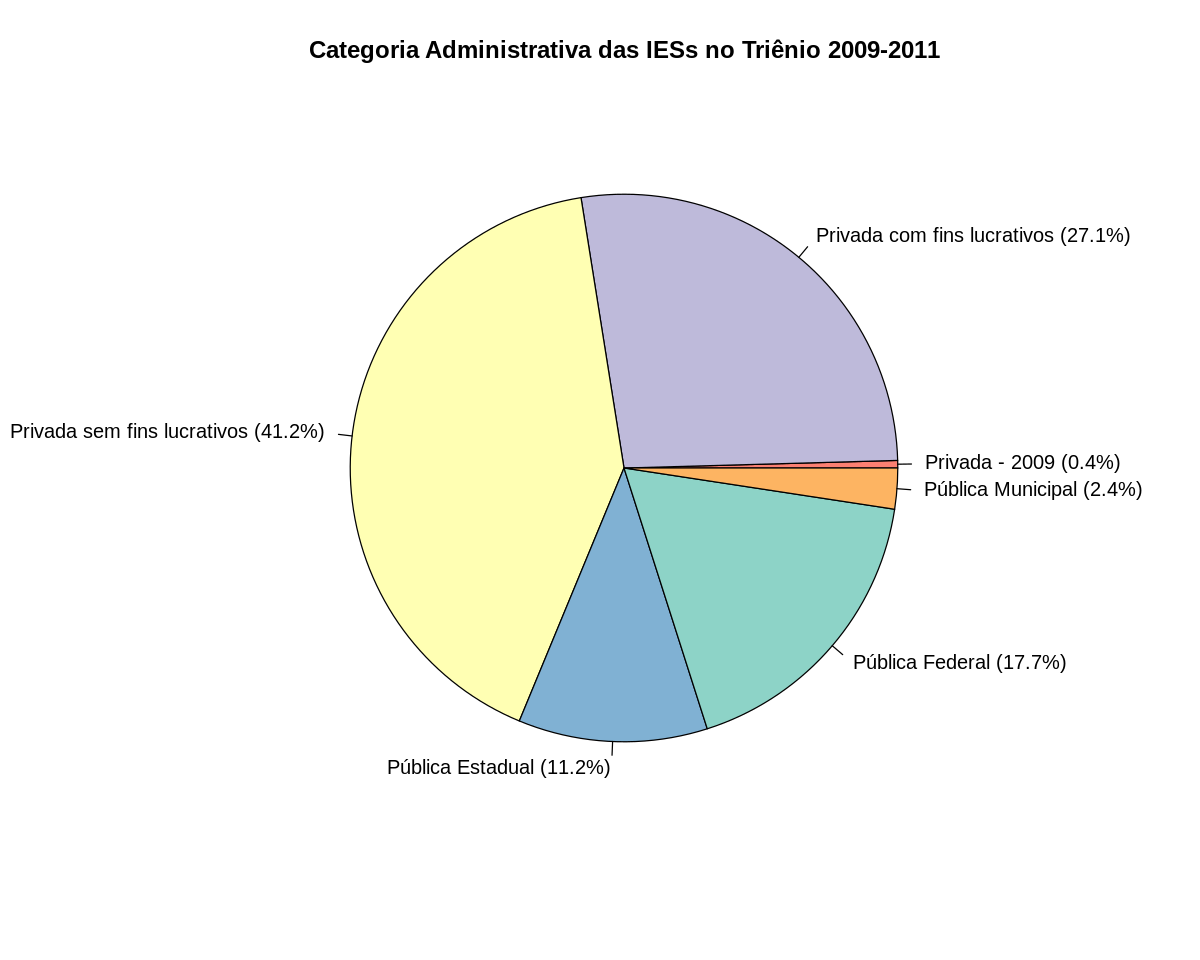

In [ ]:
#######################
#   Pizza - Triênio   #
#######################

# O código a seguir realiza a criação de um gráfico de pizza (pie chart) usando a 
# função pie() do R.
# Antes de criar o gráfico, algumas variáveis auxiliares são definidas. Primeiro, 
# é extraída a lista de categorias únicas presentes na coluna "NO_CATEGORIA_ADMINISTRATIVA" 
# do dataframe "df_trienio". Em seguida, é calculado o número total de categorias 
# e geradas cores correspondentes a cada categoria usando a função brewer.pal().
# A variável color_dict é criada como um dicionário de cores, associando cada 
# categoria à sua cor correspondente.
# Em seguida, as opções de largura e altura do gráfico são configuradas com 
# "options(repr.plot.width = 10, repr.plot.height = 8)" para definir o tamanho da 
# figura de saída.
# A tabela de contagem de ocorrências de cada categoria administrativa é gerada com 
# table(df_trienio$NO_CATEGORIA_ADMINISTRATIVA). A partir dessa tabela, é calculado 
# o percentual de ocorrência de cada categoria em relação ao total, arredondado com 
# uma casa decimal.
# Os rótulos para cada fatia do gráfico de pizza são criados com 
# labels <- paste(names(percent_trienio), sprintf('(%0.1f%%)', percent_trienio), sep = ' '), 
# concatenando o nome de cada categoria com o percentual correspondente.
# Finalmente, o gráfico de pizza é criado com 
# pie(contagem_trienio, labels = labels, col = color_dict[names(contagem_trienio)]), 
# em que contagem_trienio representa os valores de cada categoria, labels são os 
# rótulos das fatias e col é o argumento que define as cores para cada categoria 
# usando o dicionário color_dict. A função title() é utilizada para adicionar um 
# título ao gráfico, indicando a categoria administrativa das IESs no triênio 2009-2011.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- brewer.pal(num_categories, "Set3")

color_dict <- setNames(colors, categories)

options(repr.plot.width = 10, repr.plot.height = 8)

contagem_trienio <- table(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
percent_trienio <- round(100 * contagem_trienio / sum(contagem_trienio), 1)
labels <- paste(names(percent_trienio), sprintf('(%0.1f%%)', percent_trienio), sep = ' ')

pie(contagem_trienio, labels = labels, col = color_dict[names(contagem_trienio)])
title('Categoria Administrativa das IESs no Triênio 2009-2011')

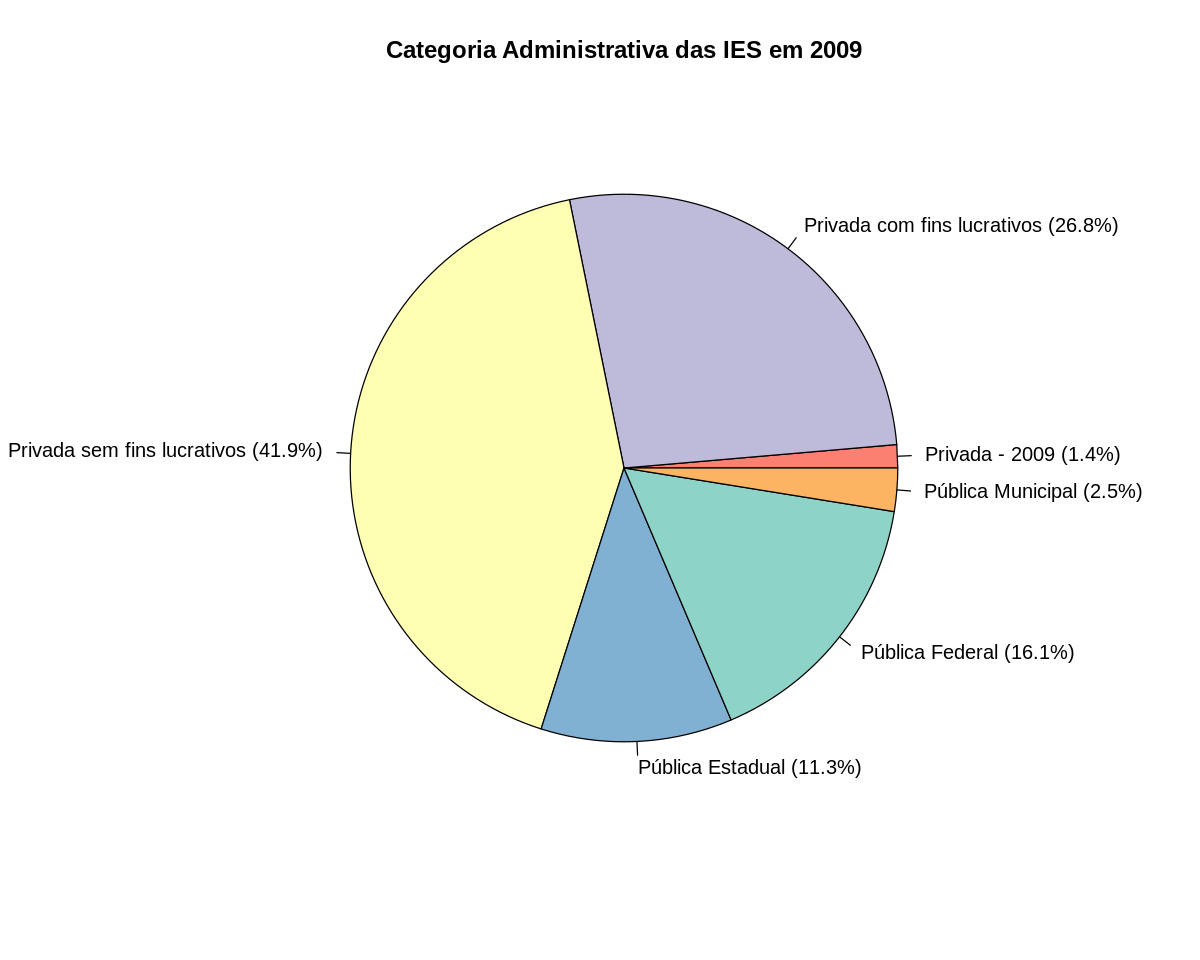

In [ ]:
################################
#    Pizza - Apenas em 2009    #
################################

# O código abaixo tem como objetivo criar um gráfico de pizza (pie chart) que representa 
# a distribuição das categorias administrativas das Instituições de Ensino Superior (IES) 
# no ano de 2009.
# Primeiramente, a variável "categories" é criada para armazenar as categorias 
# administrativas únicas presentes na coluna "NO_CATEGORIA_ADMINISTRATIVA" do dataframe 
# "df_trienio". Em seguida, a variável "num_categories" recebe o número de categorias 
# encontradas.
# A função "brewer.pal()" é utilizada para gerar uma paleta de cores para as categorias 
# administrativas, sendo "Set3" o nome da paleta selecionada. Essas cores são armazenadas 
# na variável "colors".
# O dicionário "color_dict" é criado usando a função "setNames()", em que as cores 
# da paleta são associadas às categorias administrativas.
# Em seguida, são definidas as opções de largura e altura do gráfico utilizando 
# "options(repr.plot.width = 10, repr.plot.height = 8)".
# Uma nova variável "df_2009" é criada para armazenar apenas as linhas do dataframe 
# "df_trienio" em que o valor da coluna "NU_ANO_CENSO" é igual a 2009.
# A tabela de contagem de ocorrências de cada categoria administrativa em 2009 é 
# gerada com a função "table()", utilizando a coluna "NO_CATEGORIA_ADMINISTRATIVA" 
# do dataframe "df_2009". Em seguida, é calculado o percentual de ocorrência de cada 
# categoria e arredondado com uma casa decimal.
# Os rótulos para cada fatia do gráfico de pizza são criados com 
# "labels <- paste(names(percent_2009), sprintf('(%0.1f%%)', percent_2009), sep = ' ')", 
# concatenando o nome de cada categoria com o respectivo percentual.
# Por fim, o gráfico de pizza é criado com a função "pie()", utilizando a tabela de 
# contagem, os rótulos e as cores definidas pelo dicionário "color_dict". A função 
# "title()" é utilizada para adicionar um título ao gráfico, indicando a categoria 
# administrativa das IES em 2009.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- brewer.pal(num_categories, "Set3")

color_dict <- setNames(colors, categories)

options(repr.plot.width = 10, repr.plot.height = 8)

df_2009 <- df_trienio[df_trienio$NU_ANO_CENSO == 2009,]
contagem_2009 <- table(df_2009$NO_CATEGORIA_ADMINISTRATIVA)
percent_2009 <- round(100 * contagem_2009 / sum(contagem_2009), 1)
labels <- paste(names(percent_2009), sprintf('(%0.1f%%)', percent_2009), sep = ' ')

pie(contagem_2009, labels = labels, col = color_dict[names(contagem_2009)])
title('Categoria Administrativa das IES em 2009')

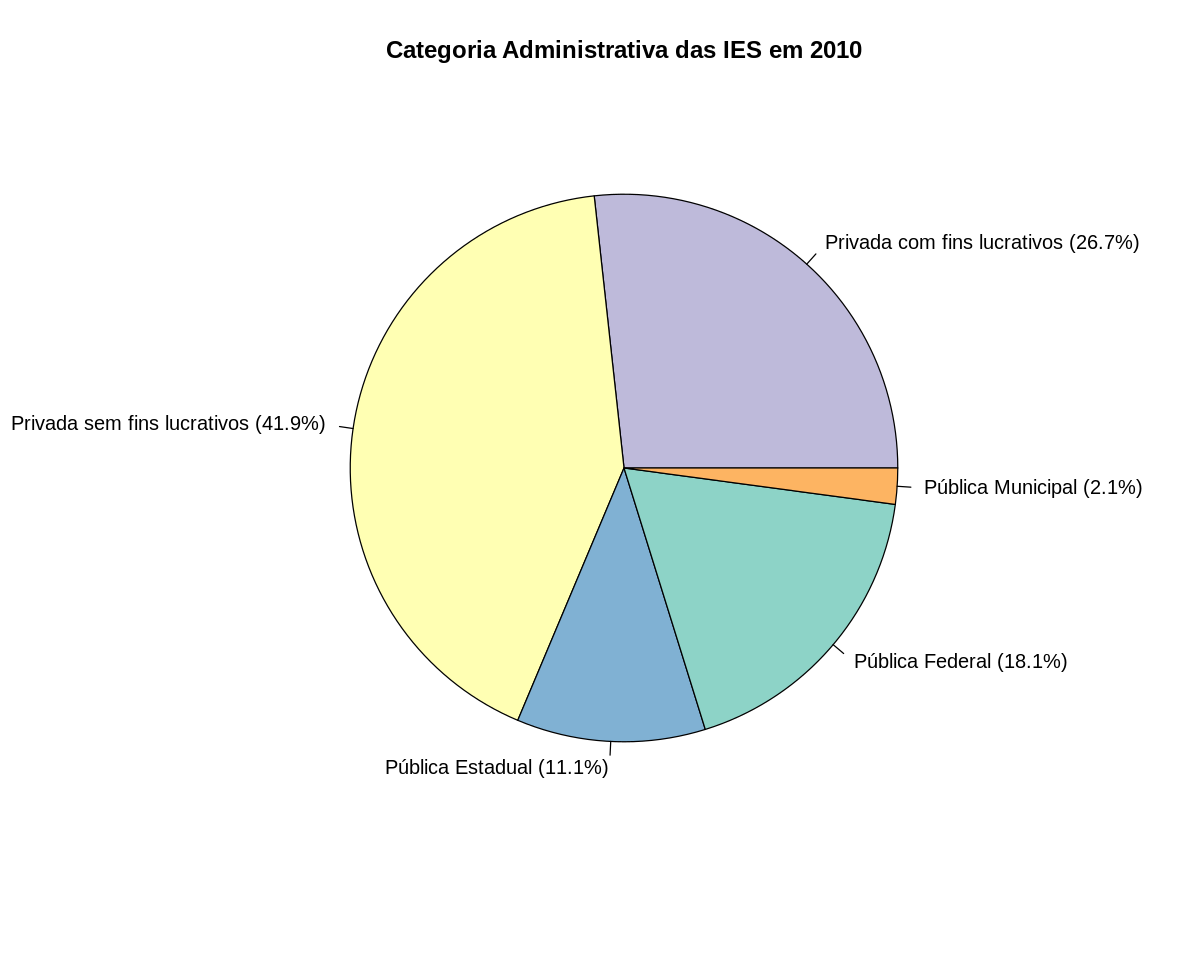

In [ ]:
################################
#    Pizza - Apenas em 2010    #
################################

#O código abaixo tem como objetivo criar um gráfico de pizza (pie chart) que representa 
# a distribuição das categorias administrativas das Instituições de Ensino Superior (IES) 
# no ano de 2010.
# Primeiramente, a variável "categories" é criada para armazenar as categorias 
# administrativas únicas presentes na coluna "NO_CATEGORIA_ADMINISTRATIVA" do dataframe 
# "df_trienio". Em seguida, a variável "num_categories" recebe o número de categorias 
# encontradas.
# A função "brewer.pal()" é utilizada para gerar uma paleta de cores para as categorias 
# administrativas, sendo "Set3" o nome da paleta selecionada. Essas cores são armazenadas 
# na variável "colors".
# O dicionário "color_dict" é criado usando a função "setNames()", em que as cores 
# da paleta são associadas às categorias administrativas.
# Em seguida, são definidas as opções de largura e altura do gráfico utilizando 
# "options(repr.plot.width = 10, repr.plot.height = 8)".
# Uma nova variável "df_2010" é criada para armazenar apenas as linhas do dataframe 
# "df_trienio" em que o valor da coluna "NU_ANO_CENSO" é igual a 2010.
# A tabela de contagem de ocorrências de cada categoria administrativa em 2010 é 
# gerada com a função "table()", utilizando a coluna "NO_CATEGORIA_ADMINISTRATIVA" 
# do dataframe "df_2010". Em seguida, é calculado o percentual de ocorrência de cada 
# categoria e arredondado com uma casa decimal.
# Os rótulos para cada fatia do gráfico de pizza são criados com 
# "labels <- paste(names(percent_2010), sprintf('(%0.1f%%)', percent_2010), sep = ' ')", 
# concatenando o nome de cada categoria com o respectivo percentual.
# Por fim, o gráfico de pizza é criado com a função "pie()", utilizando a tabela de 
# contagem, os rótulos e as cores definidas pelo dicionário "color_dict". A função 
# "title()" é utilizada para adicionar um título ao gráfico, indicando a categoria 
# administrativa das IES em 2010.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- brewer.pal(num_categories, "Set3")

color_dict <- setNames(colors, categories)

options(repr.plot.width = 10, repr.plot.height = 8)

df_2010 <- df_trienio[df_trienio$NU_ANO_CENSO == 2010,]
contagem_2010 <- table(df_2010$NO_CATEGORIA_ADMINISTRATIVA)
percent_2010 <- round(100 * contagem_2010 / sum(contagem_2010), 1)
labels <- paste(names(percent_2010), sprintf('(%0.1f%%)', percent_2010), sep = ' ')

pie(contagem_2010, labels = labels, col = color_dict[names(contagem_2010)])
title('Categoria Administrativa das IES em 2010')

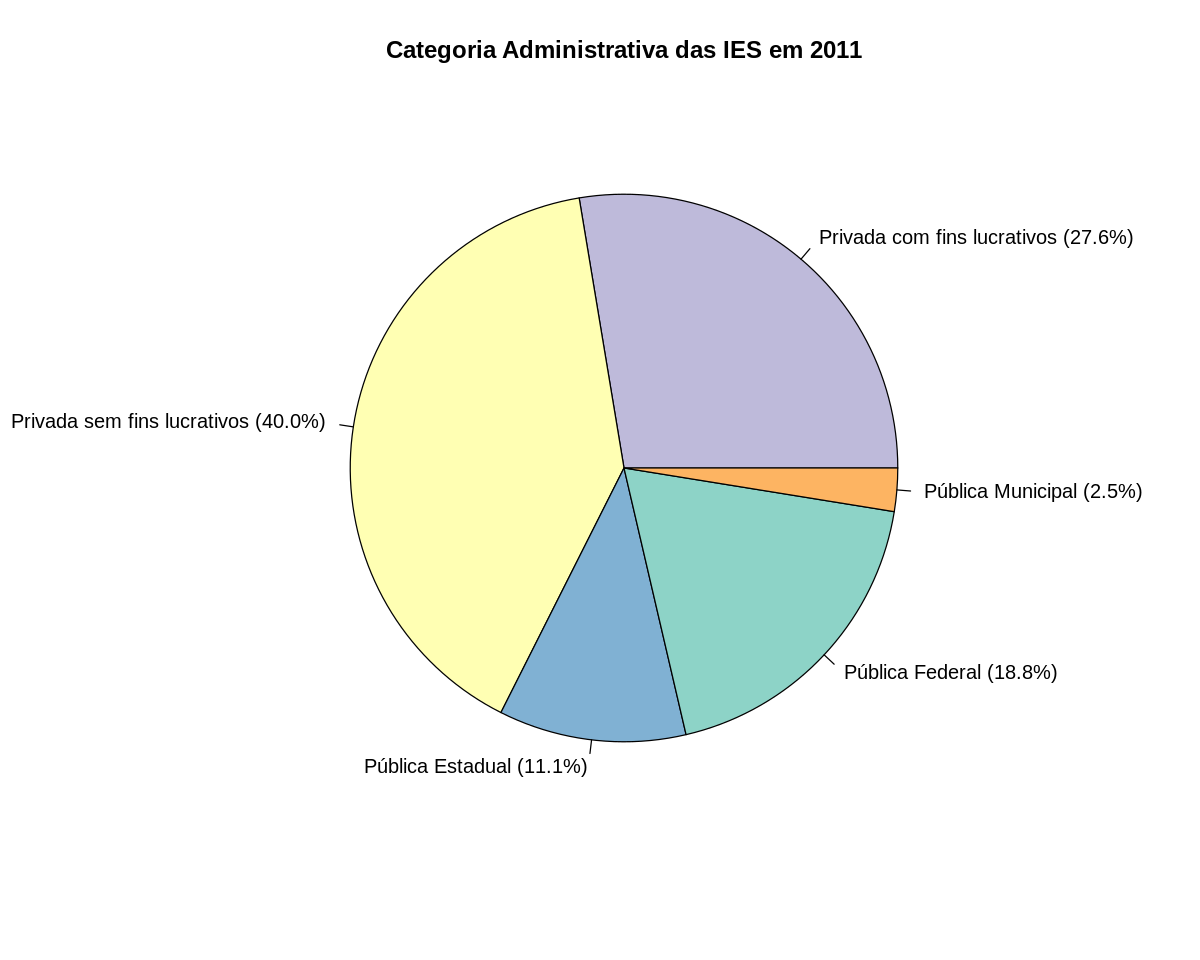

In [ ]:
################################
#    Pizza - Apenas em 2011    #
################################

#O código abaixo tem como objetivo criar um gráfico de pizza (pie chart) que representa 
# a distribuição das categorias administrativas das Instituições de Ensino Superior (IES) 
# no ano de 2011.
# Primeiramente, a variável "categories" é criada para armazenar as categorias 
# administrativas únicas presentes na coluna "NO_CATEGORIA_ADMINISTRATIVA" do dataframe 
# "df_trienio". Em seguida, a variável "num_categories" recebe o número de categorias 
# encontradas.
# A função "brewer.pal()" é utilizada para gerar uma paleta de cores para as categorias 
# administrativas, sendo "Set3" o nome da paleta selecionada. Essas cores são armazenadas 
# na variável "colors".
# O dicionário "color_dict" é criado usando a função "setNames()", em que as cores 
# da paleta são associadas às categorias administrativas.
# Em seguida, são definidas as opções de largura e altura do gráfico utilizando 
# "options(repr.plot.width = 10, repr.plot.height = 8)".
# Uma nova variável "df_2011" é criada para armazenar apenas as linhas do dataframe 
# "df_trienio" em que o valor da coluna "NU_ANO_CENSO" é igual a 2011.
# A tabela de contagem de ocorrências de cada categoria administrativa em 2011 é 
# gerada com a função "table()", utilizando a coluna "NO_CATEGORIA_ADMINISTRATIVA" 
# do dataframe "df_2011". Em seguida, é calculado o percentual de ocorrência de cada 
# categoria e arredondado com uma casa decimal.
# Os rótulos para cada fatia do gráfico de pizza são criados com 
# "labels <- paste(names(percent_2011), sprintf('(%0.1f%%)', percent_2011), sep = ' ')", 
# concatenando o nome de cada categoria com o respectivo percentual.
# Por fim, o gráfico de pizza é criado com a função "pie()", utilizando a tabela de 
# contagem, os rótulos e as cores definidas pelo dicionário "color_dict". A função 
# "title()" é utilizada para adicionar um título ao gráfico, indicando a categoria 
# administrativa das IES em 2011.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- brewer.pal(num_categories, "Set3")

color_dict <- setNames(colors, categories)

options(repr.plot.width = 10, repr.plot.height = 8)

df_2011 <- df_trienio[df_trienio$NU_ANO_CENSO == 2011,]
contagem_2011 <- table(df_2011$NO_CATEGORIA_ADMINISTRATIVA)
percent_2011 <- round(100 * contagem_2011 / sum(contagem_2011), 1)
labels <- paste(names(percent_2011), sprintf('(%0.1f%%)', percent_2011), sep = ' ')

pie(contagem_2011, labels = labels, col = color_dict[names(contagem_2011)])
title('Categoria Administrativa das IES em 2011')

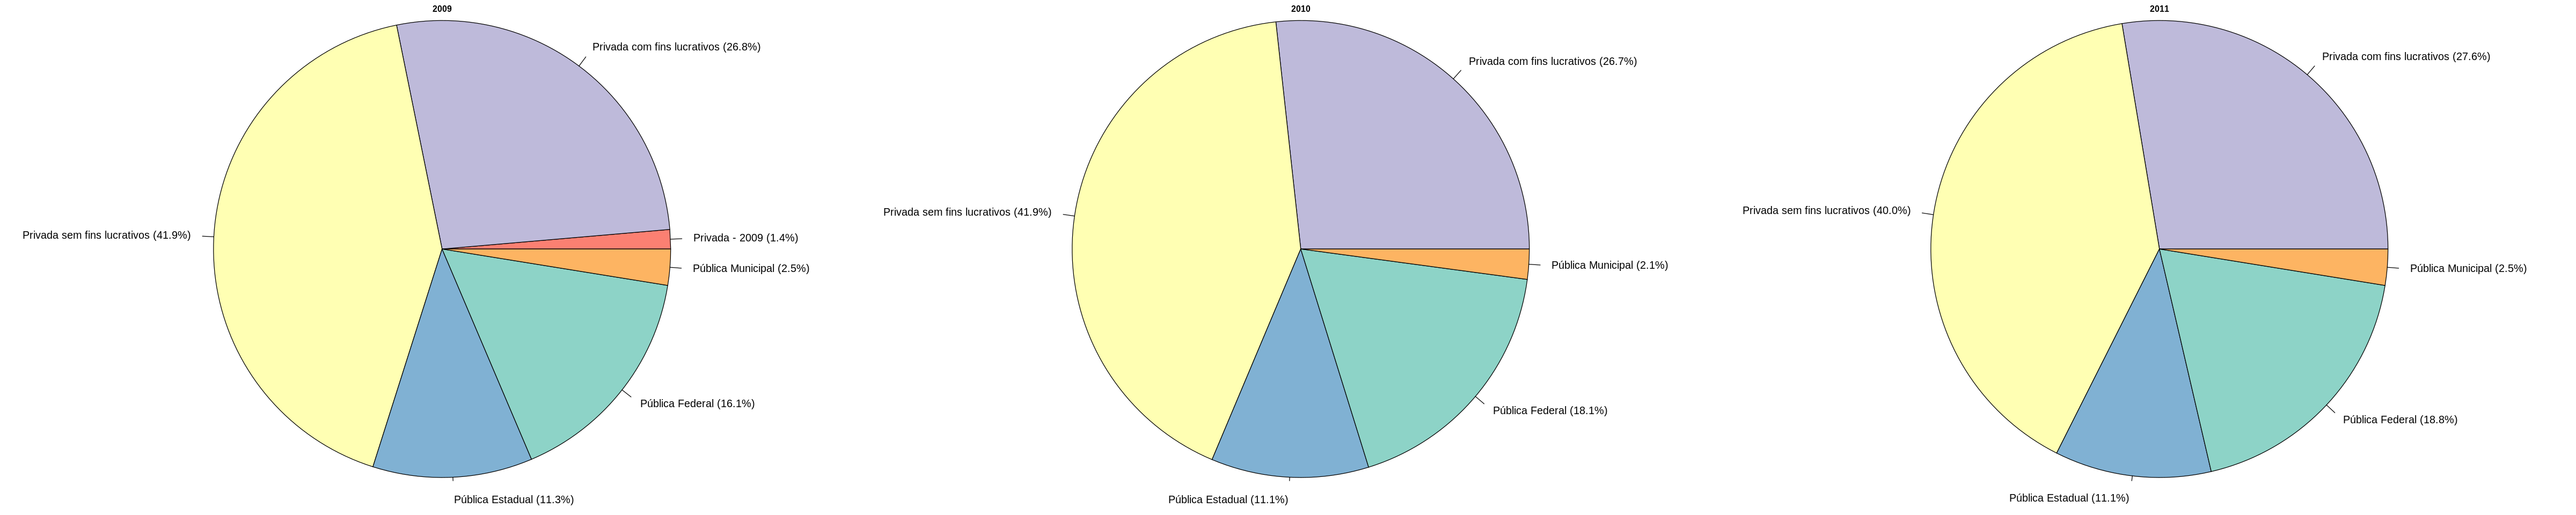

In [ ]:
################################################
#   Múltiplos gráficos de pizza, lado a lado   #
################################################

# O código a seguir cria três gráficos de pizza, cada um representando a distribuição 
# das categorias administrativas das Instituições de Ensino Superior (IES) nos anos 
# de 2009, 2010 e 2011.
# Inicialmente, a variável "categories" é criada para armazenar as categorias 
# administrativas únicas presentes na coluna "NO_CATEGORIA_ADMINISTRATIVA" do dataframe 
# "df_trienio". Em seguida, a variável "num_categories" recebe o número de categorias encontradas.
# A função "brewer.pal()" é utilizada para gerar uma paleta de cores para as categorias 
# administrativas, sendo "Set3" o nome da paleta selecionada. Essas cores são armazenadas 
# na variável "colors".
# O dicionário "color_dict" é criado usando a função "setNames()", em que as cores 
# da paleta são associadas às categorias administrativas.
# Em seguida, são definidas as opções de largura e altura do gráfico utilizando 
# "options(repr.plot.width = 40, repr.plot.height = 8)".
# O parâmetro "mfrow" é utilizado para dividir o espaço do gráfico em uma matriz de 
# 1 linha por 3 colunas, indicando que os gráficos serão exibidos em uma linha e 
# três colunas. O parâmetro "mar" ajusta as margens do gráfico.
# Para cada ano (2009, 2010, 2011), o código cria um subset do dataframe 
# "df_trienio" contendo apenas as linhas com o ano correspondente. Em seguida, 
# a tabela de contagem de ocorrências de cada categoria administrativa é gerada com 
# a função "table()", utilizando a coluna "NO_CATEGORIA_ADMINISTRATIVA" do respectivo 
# subset. O percentual de ocorrência de cada categoria é calculado e arredondado 
# com uma casa decimal.
# Os rótulos para cada fatia do gráfico de pizza são criados com 
# "labels <- paste(names(percent_ano), sprintf('(%0.1f%%)', percent_ano), sep = ' ')", 
# concatenando o nome de cada categoria com o respectivo percentual.
# Por fim, cada gráfico de pizza é criado com a função "pie()", utilizando a tabela 
# de contagem, os rótulos, o título correspondente ao ano e a paleta de cores 
# definida pelo dicionário "color_dict". Os parâmetros "radius" e "cex" são utilizados 
# para controlar o tamanho do gráfico e do texto, respectivamente.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- brewer.pal(num_categories, "Set3")

color_dict <- setNames(colors, categories)

options(repr.plot.width = 40, repr.plot.height = 8)

par(mfrow = c(1, 3), mar = c(4, 4, 2, 1))

# 2009
df_2009 <- df_trienio[df_trienio$NU_ANO_CENSO == 2009, ]
contagem_2009 <- table(df_2009$NO_CATEGORIA_ADMINISTRATIVA)
percent_2009 <- round(100 * contagem_2009 / sum(contagem_2009), 1)
labels <- paste(names(percent_2009), sprintf('(%0.1f%%)', percent_2009), sep = ' ')
pie(contagem_2009, labels = labels, main = '2009', radius = 4, col = color_dict[names(contagem_2009)], cex = 1.5)

# 2010
df_2010 <- df_trienio[df_trienio$NU_ANO_CENSO == 2010, ]
contagem_2010 <- table(df_2010$NO_CATEGORIA_ADMINISTRATIVA)
percent_2010 <- round(100 * contagem_2010 / sum(contagem_2010), 1)
labels <- paste(names(percent_2010), sprintf('(%0.1f%%)', percent_2010), sep = ' ')
pie(contagem_2010, labels = labels, main = '2010', radius = 4, col = color_dict[names(contagem_2010)], cex = 1.5)

# 2011
df_2011 <- df_trienio[df_trienio$NU_ANO_CENSO == 2011, ]
contagem_2011 <- table(df_2011$NO_CATEGORIA_ADMINISTRATIVA)
percent_2011 <- round(100 * contagem_2011 / sum(contagem_2011), 1)
labels <- paste(names(percent_2011), sprintf('(%0.1f%%)', percent_2011), sep = ' ')
pie(contagem_2011, labels = labels, main = '2011', radius = 4, col = color_dict[names(contagem_2011)], cex = 1.5)


### Anel

texto texto texto

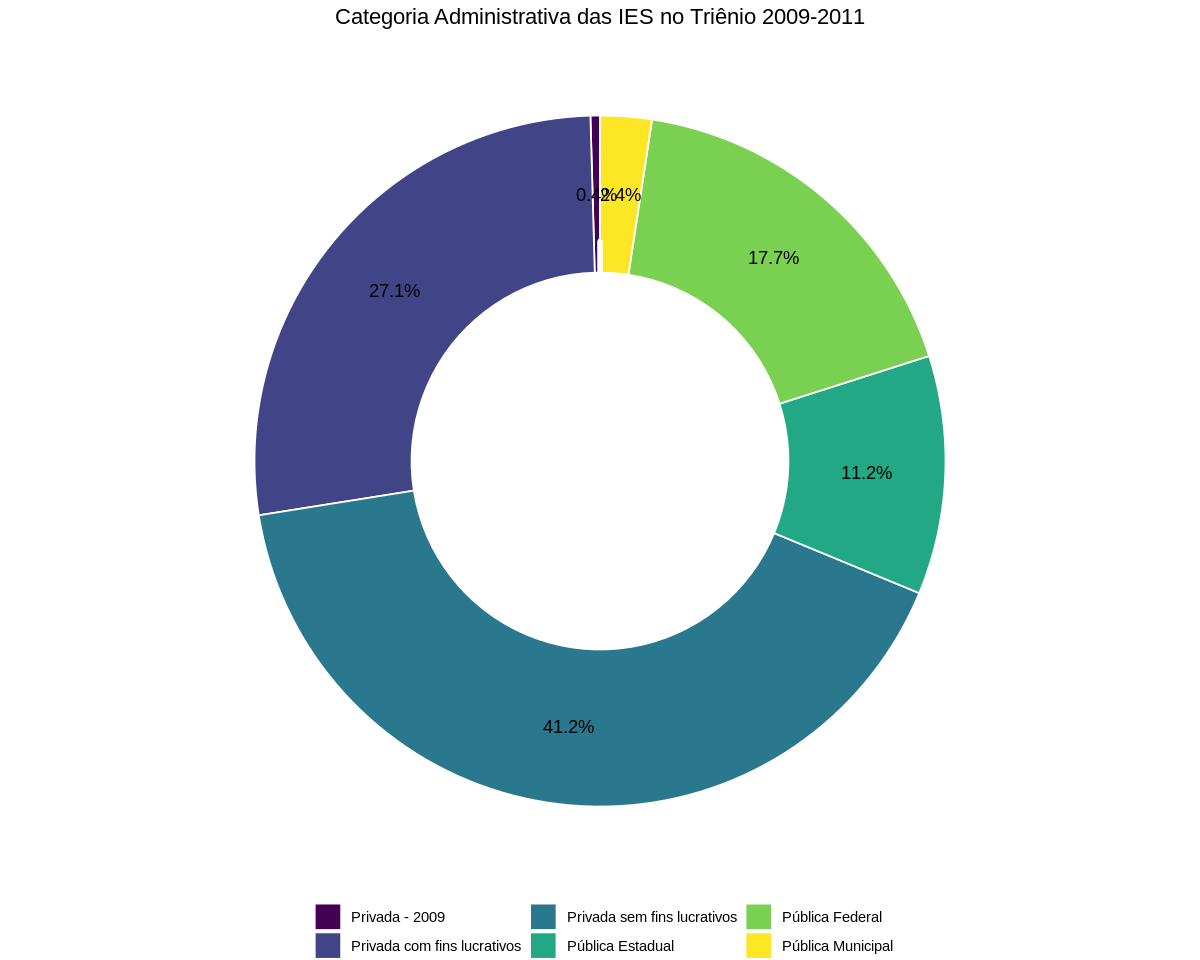

In [ ]:
######################
#   Anel - Triênio   #
######################

# O código abaixo cria um gráfico de pizza com porcentagens para representar a 
# distribuição das categorias administrativas das Instituições de Ensino Superior 
# (IES) no triênio 2009-2011.
# Inicialmente, a variável "contagem" é criada usando o operador pipe (%>%) para 
# encadear as operações. Ela conta o número de ocorrências de cada categoria 
# administrativa no dataframe "df_trienio".
# Em seguida, é calculado o percentual de cada categoria em relação ao total, 
# arredondado com uma casa decimal. Esses percentuais são adicionados ao dataframe 
# "contagem" na coluna "percent".
# O objeto "pie_chart" é criado usando a função "ggplot()" e passando o dataframe 
# "contagem" como dados. As estéticas são definidas, sendo que o eixo x é vazio ("") 
# para criar o gráfico de pizza e o eixo y representa o número de ocorrências. A cor 
# de preenchimento das fatias é determinada pela categoria administrativa.
# O comando "geom_bar(stat = "identity", width = 1, color = "white")" cria as fatias 
# do gráfico de pizza. O parâmetro "width" define a largura das fatias e "color" 
# determina a cor da borda das fatias.
# A função "coord_polar()" é usada para transformar o gráfico de barras em um gráfico 
# de pizza. O parâmetro "y" indica que o eixo y será utilizado para o ângulo polar das fatias.
# Outras configurações estéticas são definidas com 
# "ggtitle()", "theme_void()", "scale_fill_viridis_d()", "labs()", e "theme()".
# A função "geom_text()" adiciona as porcentagens em cada fatia do gráfico de pizza, 
# utilizando a coluna "percent" do dataframe "contagem". O parâmetro "position_stack(vjust = 0.5)" 
# posiciona os rótulos no centro vertical das fatias.
# Por fim, o comando 
# "pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)" 
# adiciona um círculo branco no centro do gráfico de pizza para criar uma aparência mais estilizada.

options(repr.plot.width=10, repr.plot.height=8)

contagem <- df_trienio %>%
  count(NO_CATEGORIA_ADMINISTRATIVA)

percent <- round(100*contagem$n/sum(contagem$n),1)
contagem$percent <- paste0(percent,"%")
##
pie_chart <- ggplot(data = contagem, aes(x = "", y = n, fill = NO_CATEGORIA_ADMINISTRATIVA)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Categoria Administrativa das IES no Triênio 2009-2011") +
  theme_void() +
  scale_fill_viridis_d() +
  labs(fill = "") +    # Remove the legend title
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5))

pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)

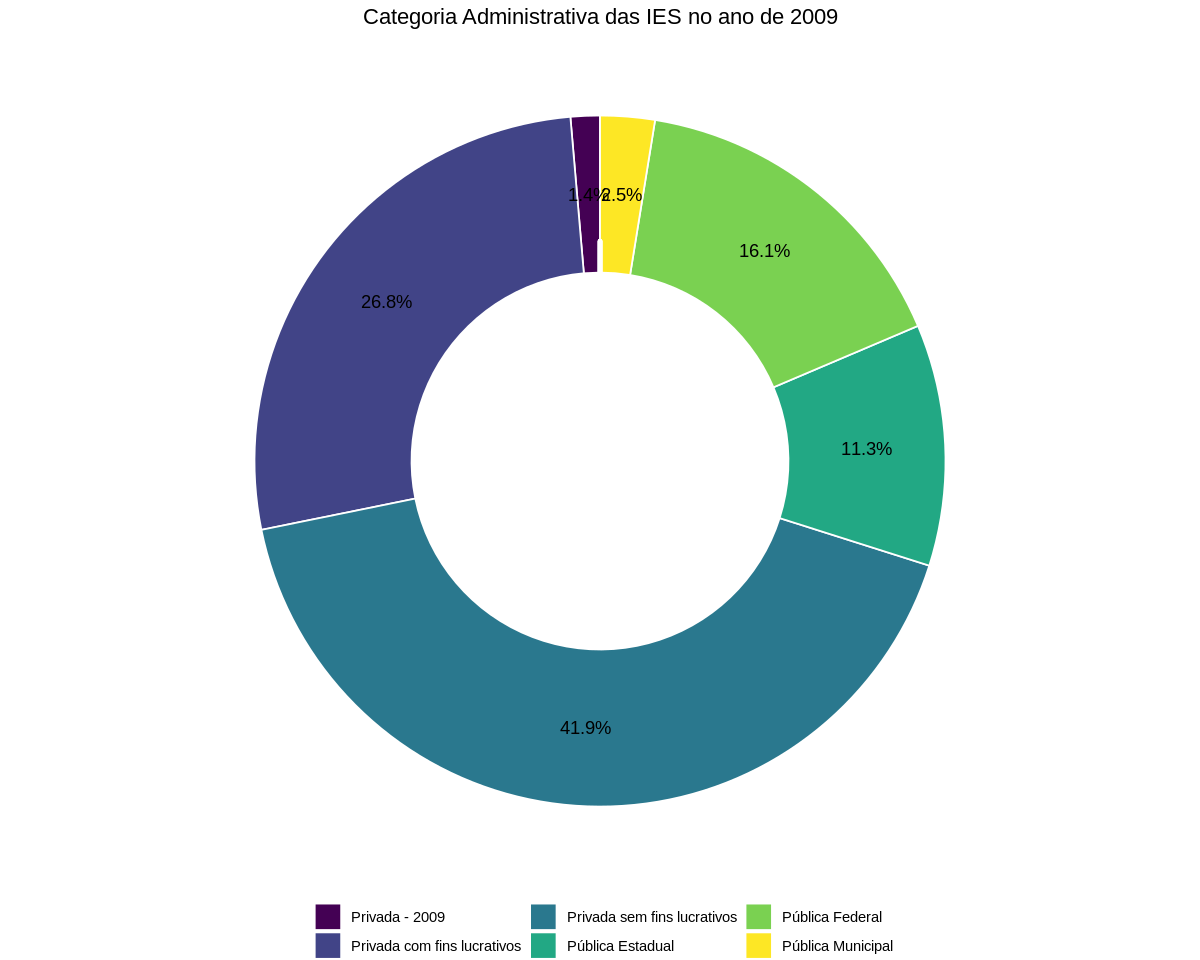

In [ ]:
###############################
#    Anel - Apenas em 2009    #
###############################

# O código abaixo cria um gráfico de pizza com porcentagens para representar a 
# distribuição das categorias administrativas das Instituições de Ensino Superior 
# (IES) no ano de 2009.
# Primeiramente, a variável "contagem" é criada usando o operador pipe (%>%) para 
# encadear as operações. Ela filtra o dataframe "df_trienio" para incluir apenas as 
# observações referentes ao ano de 2009 e, em seguida, conta o número de ocorrências 
# de cada categoria administrativa.
# Depois, é calculado o percentual de cada categoria em relação ao total, arredondado 
# com uma casa decimal. Esses percentuais são adicionados ao dataframe "contagem" na 
# coluna "percent".
# O objeto "pie_chart" é criado usando a função "ggplot()" e passando o dataframe 
# "contagem" como dados. As estéticas são definidas, sendo que o eixo x é vazio ("") 
# para criar o gráfico de pizza e o eixo y representa o número de ocorrências. A cor
#  de preenchimento das fatias é determinada pela categoria administrativa.
# O comando "geom_bar(stat = "identity", width = 1, color = "white")" cria as fatias 
# do gráfico de pizza. O parâmetro "width" define a largura das fatias e "color" determina 
# a cor da borda das fatias.
# A função "coord_polar()" é usada para transformar o gráfico de barras em um gráfico 
# de pizza. O parâmetro "y" indica que o eixo y será utilizado para o ângulo polar das fatias.
# Outras configurações estéticas são definidas com 
# "ggtitle()", "theme_void()", "scale_fill_viridis_d()", "labs()", e "theme()".
# A função "geom_text()" adiciona as porcentagens em cada fatia do gráfico de pizza, 
# utilizando a coluna "percent" do dataframe "contagem". O parâmetro "position_stack(vjust = 0.5)" 
# posiciona os rótulos no centro vertical das fatias.
# Por fim, o comando 
# "pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)" 
# adiciona um círculo branco no centro do gráfico de pizza para criar uma aparência mais estilizada.

options(repr.plot.width=10, repr.plot.height=8)

contagem <- df_trienio %>%
  filter(NU_ANO_CENSO == 2009) %>%
  count(NO_CATEGORIA_ADMINISTRATIVA)

percent <- round(100*contagem$n/sum(contagem$n),1)
contagem$percent <- paste0(percent,"%")
##
pie_chart <- ggplot(data = contagem, aes(x = "", y = n, fill = NO_CATEGORIA_ADMINISTRATIVA)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Categoria Administrativa das IES no ano de 2009") +
  theme_void() +
  scale_fill_viridis_d() +
  labs(fill = "") +    # Remove the legend title
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5))

pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)

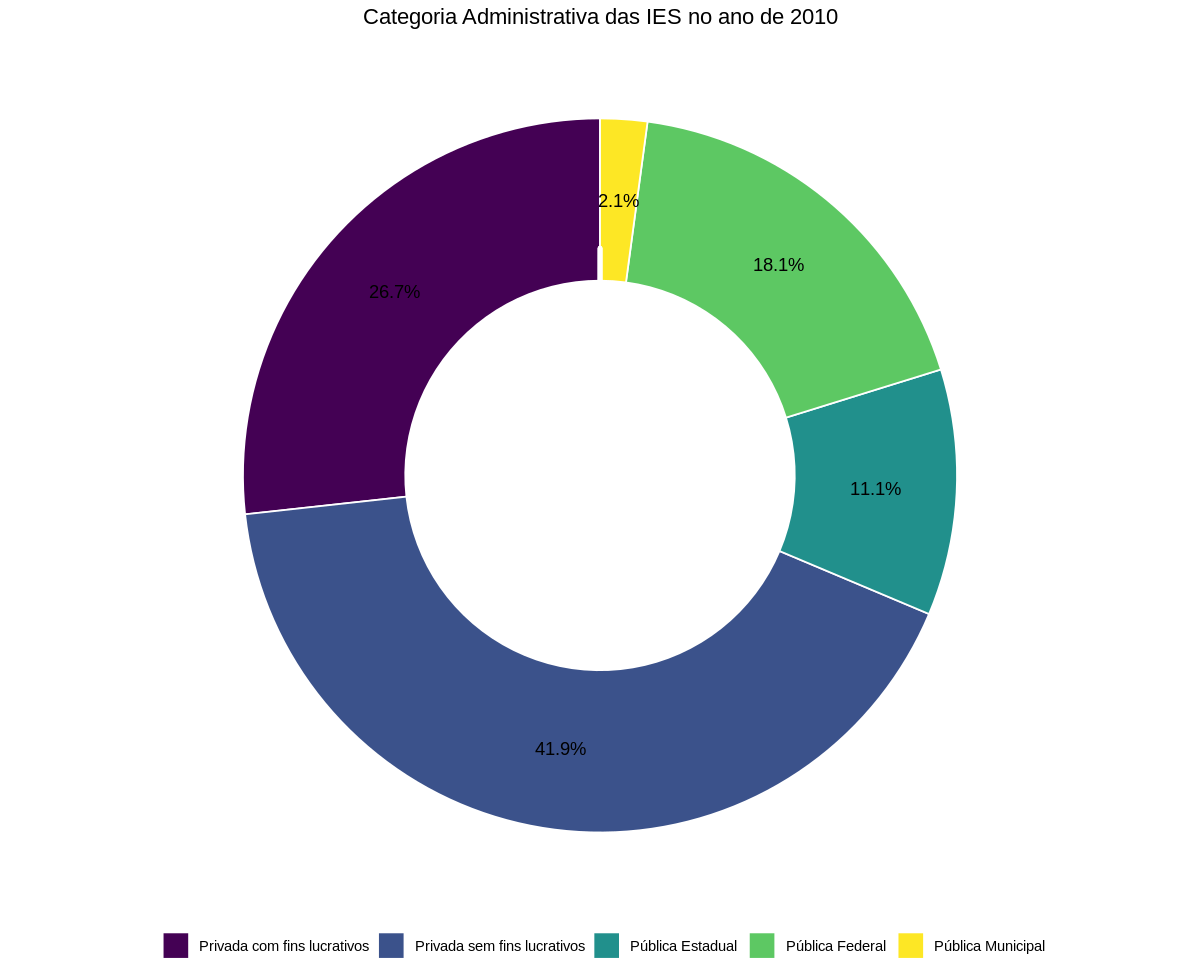

In [ ]:
###############################
#    Anel - Apenas em 2010    #
###############################

# O código a seguir cria um gráfico de pizza com porcentagens para representar a 
# distribuição das categorias administrativas das Instituições de Ensino Superior 
# (IES) no ano de 2010.
# Primeiramente, a variável "contagem" é criada usando o operador pipe (%>%) para 
# encadear as operações. Ela filtra o dataframe "df_trienio" para incluir apenas as 
# observações referentes ao ano de 2010 e, em seguida, conta o número de ocorrências 
# de cada categoria administrativa.
# Depois, é calculado o percentual de cada categoria em relação ao total, arredondado 
# com uma casa decimal. Esses percentuais são adicionados ao dataframe "contagem" na 
# coluna "percent".
# O objeto "pie_chart" é criado usando a função "ggplot()" e passando o dataframe 
# "contagem" como dados. As estéticas são definidas, sendo que o eixo x é vazio ("") 
# para criar o gráfico de pizza e o eixo y representa o número de ocorrências. A cor
#  de preenchimento das fatias é determinada pela categoria administrativa.
# O comando "geom_bar(stat = "identity", width = 1, color = "white")" cria as fatias 
# do gráfico de pizza. O parâmetro "width" define a largura das fatias e "color" determina 
# a cor da borda das fatias.
# A função "coord_polar()" é usada para transformar o gráfico de barras em um gráfico 
# de pizza. O parâmetro "y" indica que o eixo y será utilizado para o ângulo polar das fatias.
# Outras configurações estéticas são definidas com 
# "ggtitle()", "theme_void()", "scale_fill_viridis_d()", "labs()", e "theme()".
# A função "geom_text()" adiciona as porcentagens em cada fatia do gráfico de pizza, 
# utilizando a coluna "percent" do dataframe "contagem". O parâmetro "position_stack(vjust = 0.5)" 
# posiciona os rótulos no centro vertical das fatias.
# Por fim, o comando 
# "pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)" 
# adiciona um círculo branco no centro do gráfico de pizza para criar uma aparência mais estilizada.

options(repr.plot.width=10, repr.plot.height=8)

contagem <- df_trienio %>%
  filter(NU_ANO_CENSO == 2010) %>%
  count(NO_CATEGORIA_ADMINISTRATIVA)

percent <- round(100*contagem$n/sum(contagem$n),1)
contagem$percent <- paste0(percent,"%")
##
pie_chart <- ggplot(data = contagem, aes(x = "", y = n, fill = NO_CATEGORIA_ADMINISTRATIVA)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Categoria Administrativa das IES no ano de 2010") +
  theme_void() +
  scale_fill_viridis_d() +
  labs(fill = "") +    # Remove the legend title
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5))

pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)

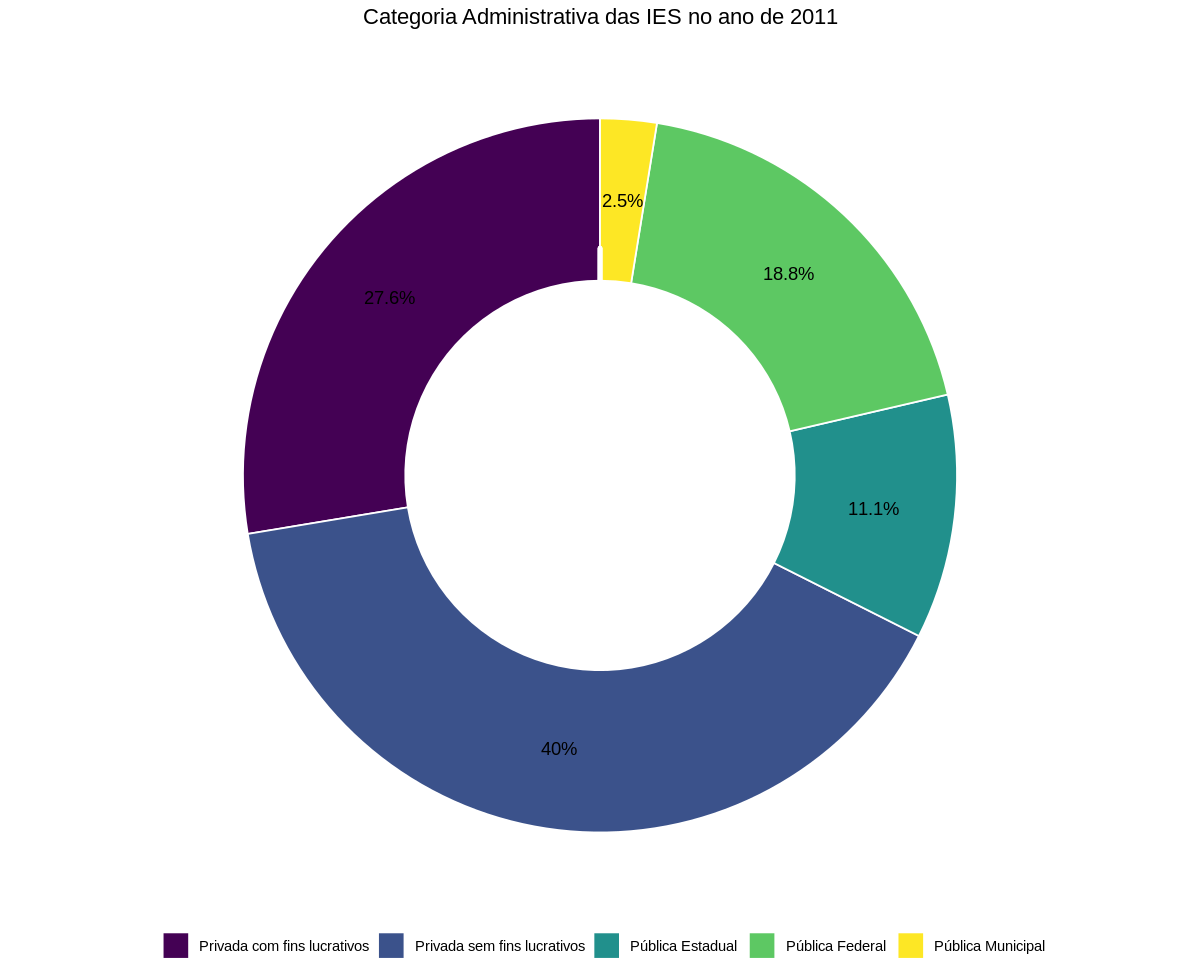

In [ ]:
###############################
#    Anel - Apenas em 2011    #
###############################

# O código a seguir cria um gráfico de pizza com porcentagens para representar a 
# distribuição das categorias administrativas das Instituições de Ensino Superior 
# (IES) no ano de 2011.
# Primeiramente, a variável "contagem" é criada usando o operador pipe (%>%) para 
# encadear as operações. Ela filtra o dataframe "df_trienio" para incluir apenas as 
# observações referentes ao ano de 2011 e, em seguida, conta o número de ocorrências 
# de cada categoria administrativa.
# Depois, é calculado o percentual de cada categoria em relação ao total, arredondado 
# com uma casa decimal. Esses percentuais são adicionados ao dataframe "contagem" na 
# coluna "percent".
# O objeto "pie_chart" é criado usando a função "ggplot()" e passando o dataframe 
# "contagem" como dados. As estéticas são definidas, sendo que o eixo x é vazio ("") 
# para criar o gráfico de pizza e o eixo y representa o número de ocorrências. A cor
#  de preenchimento das fatias é determinada pela categoria administrativa.
# O comando "geom_bar(stat = "identity", width = 1, color = "white")" cria as fatias 
# do gráfico de pizza. O parâmetro "width" define a largura das fatias e "color" determina 
# a cor da borda das fatias.
# A função "coord_polar()" é usada para transformar o gráfico de barras em um gráfico 
# de pizza. O parâmetro "y" indica que o eixo y será utilizado para o ângulo polar das fatias.
# Outras configurações estéticas são definidas com 
# "ggtitle()", "theme_void()", "scale_fill_viridis_d()", "labs()", e "theme()".
# A função "geom_text()" adiciona as porcentagens em cada fatia do gráfico de pizza, 
# utilizando a coluna "percent" do dataframe "contagem". O parâmetro "position_stack(vjust = 0.5)" 
# posiciona os rótulos no centro vertical das fatias.
# Por fim, o comando 
# "pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)" 
# adiciona um círculo branco no centro do gráfico de pizza para criar uma aparência mais estilizada.

options(repr.plot.width=10, repr.plot.height=8)

contagem <- df_trienio %>%
  filter(NU_ANO_CENSO == 2011) %>%
  count(NO_CATEGORIA_ADMINISTRATIVA)

percent <- round(100*contagem$n/sum(contagem$n),1)
contagem$percent <- paste0(percent,"%")
##
pie_chart <- ggplot(data = contagem, aes(x = "", y = n, fill = NO_CATEGORIA_ADMINISTRATIVA)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  ggtitle("Categoria Administrativa das IES no ano de 2011") +
  theme_void() +
  scale_fill_viridis_d() +
  labs(fill = "") +    # Remove the legend title
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = percent), position = position_stack(vjust = 0.5))

pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)

# ggsave("grafico_anel_2011.png")

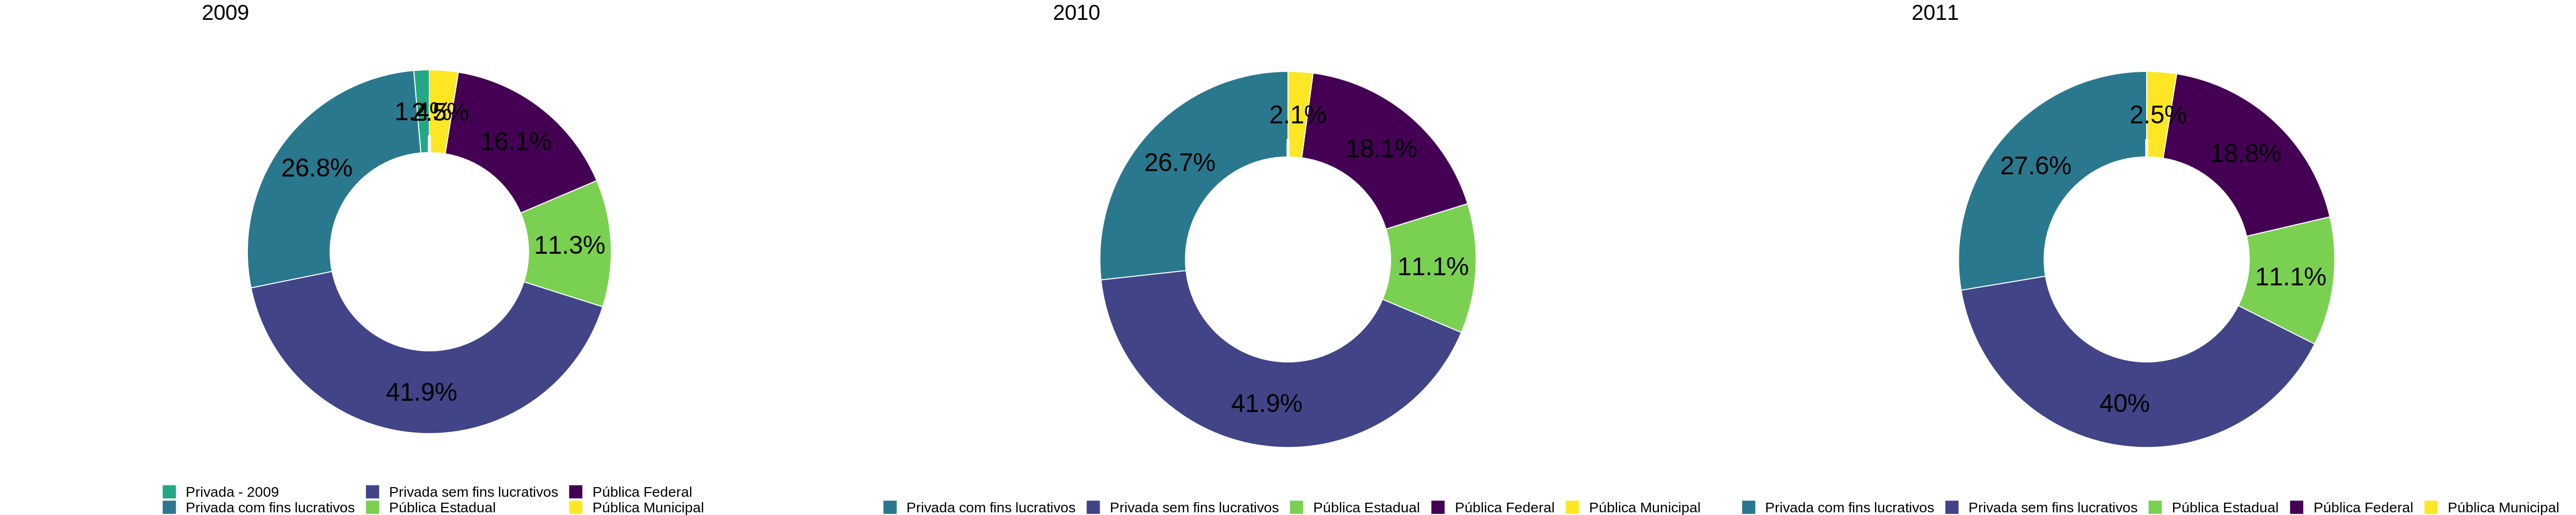

In [ ]:
##############################################
#  Múltiplos gráficos de anel, lado a lado   #
##############################################

# O código a seguir cria três gráficos de pizza lado a lado para representar a 
# distribuição das categorias administrativas das Instituições de Ensino Superior 
# (IES) nos anos de 2009, 2010 e 2011.
# Inicialmente, as variáveis "categories" e "num_categories" são definidas para 
# armazenar as categorias administrativas únicas presentes no dataframe "df_trienio" 
# e o número total de categorias, respectivamente.
# A variável "colors" recebe uma sequência de cores geradas pela função "viridis()" 
# com base no número de categorias.
# Em seguida, a variável "color_dict" é criada para associar as cores às categorias 
# administrativas usando a função "setNames()".
# As opções "repr.plot.width" e "repr.plot.height" são definidas para especificar 
# as dimensões do gráfico de saída.
# O código utiliza um loop "for" para percorrer os anos 2009, 2010 e 2011. Dentro 
# do loop, o dataframe "contagem" é criado filtrando as observações do ano atual e 
# contando o número de ocorrências de cada categoria administrativa.
# As porcentagens de cada categoria são calculadas e adicionadas ao dataframe "contagem".
# Em seguida, o objeto "pie_chart" é criado usando a função "ggplot()" e definindo 
# o dataframe "contagem" como dados. São definidas as estéticas, incluindo a criação 
# das fatias do gráfico de pizza com a função "geom_bar()", a transformação do gráfico 
# de barras em um gráfico de pizza com a função "coord_polar()", a adição das porcentagens 
# nas fatias com a função "geom_text()", e a configuração de diversos aspectos estéticos 
# e de tema com a função "theme()".
# O gráfico de pizza também é estilizado com a adição de um círculo branco no centro 
# usando a função "geom_circle()".
# A cada iteração do loop, o gráfico de pizza correspondente ao ano atual é adicionado 
# à lista "plots" usando o nome do ano como índice.
# Por fim, a função "grid.arrange()" do pacote "gridExtra" é utilizada para organizar 
# os gráficos de pizza lado a lado em uma grade com três colunas, utilizando os gráficos 
# armazenados na lista "plots".
# Dessa forma, o resultado é a exibição dos gráficos de pizza das categorias administrativas 
# das IES nos anos de 2009, 2010 e 2011, permitindo a comparação visual das distribuições 
# ao longo do tempo.

categories <- unique(df_trienio$NO_CATEGORIA_ADMINISTRATIVA)
num_categories <- length(categories)
colors <- viridis(num_categories)

color_dict <- setNames(colors, categories)

options(repr.plot.width = 40, repr.plot.height = 8)

plots <- list()

for (year in c(2009, 2010, 2011)) {
  contagem <- df_trienio %>%
    filter(NU_ANO_CENSO == year) %>%
    count(NO_CATEGORIA_ADMINISTRATIVA)
  
  percent <- round(100 * contagem$n / sum(contagem$n), 1)
  contagem$percent <- paste0(percent, "%")
  
  pie_chart <- ggplot(data = contagem, aes(x = "", y = n, fill = NO_CATEGORIA_ADMINISTRATIVA)) +
    geom_bar(stat = "identity", width = 1, color = "white") +
    coord_polar("y", start = 0) +
    ggtitle(paste(year)) +
    theme_void() +
    scale_fill_manual(values = color_dict) +
    guides(fill = guide_legend(title = NULL, override.aes = list(label = ""))) +
    theme(legend.position = "bottom",
          text = element_text(size = 20)) +
    geom_text(aes(label = percent), position = position_stack(vjust = 0.5), size = 10)
  
  pie_chart <- pie_chart + geom_circle(aes(x0 = 0, y0 = 0, r = 0.7), color = "white", fill = "white", size = 1.25)
  
  plots[[year]] <- pie_chart
}

gridExtra::grid.arrange(plots[[2009]], plots[[2010]], plots[[2011]], ncol = 3)

### Histograma

Um histograma é um gráfico de frequência que representa a distribuição de valores de uma variável quantitativa. Ele é construído a partir da divisão do intervalo dos valores da variável em várias faixas, chamadas de "bins", e contabiliza quantos valores da variável estão dentro de cada bin. Assim, o eixo x do histograma representa os valores da variável, enquanto o eixo y representa a contagem de observações dentro de cada bin. O histograma é útil para visualizar a forma da distribuição dos dados, bem como a presença de eventuais assimetrias, outliers ou outras características relevantes.

Warning message:
“Removed 62 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


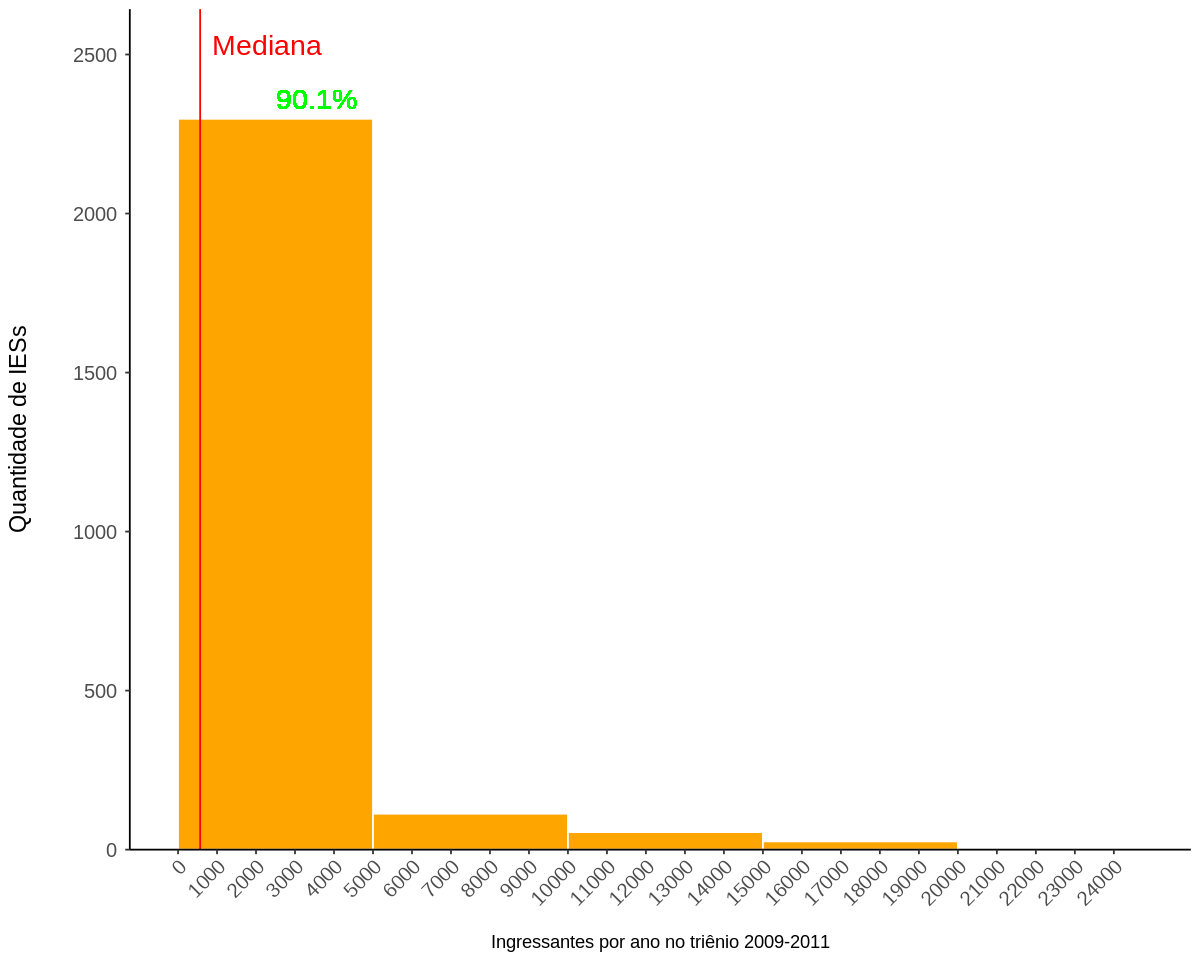

In [ ]:
###################################################
#   Histograma do total de ingressantes por IES   #
###################################################

# O código abaixo realiza a criação de um histograma para visualizar a distribuição 
# do número de ingressantes por ano no triênio de 2009 a 2011 das Instituições de 
# Ensino Superior (IES) presentes no dataframe "df_trienio".
# Inicialmente, é criado o objeto "grupo" através da função pipe %>%. Ele agrupa as 
# observações do dataframe por CO_IES (Código da IES) e calcula a soma total dos 
# ingressantes (QT_INGRESSO_TOTAL) de cada instituição, removendo os valores ausentes 
# (na.rm = TRUE).
# O número de "bins" é definido como 100 para o histograma.
# A função "hist()" é aplicada aos valores de QT_INGRESSO_TOTAL no dataframe "grupo", 
# gerando o histograma. O resultado é armazenado na variável "hist".
# O valor da largura de cada barra é obtido através da função "diff()" aplicada aos 
# intervalos do histograma.
# Em seguida, o objeto "plot" é criado usando a função "ggplot()" e definindo o 
# dataframe com as colunas "x" (médias dos intervalos do histograma) e "y" (contagens 
# das observações em cada intervalo) como dados. São adicionadas as camadas estéticas, 
# como as barras com a função "geom_bar()", os rótulos dos eixos com a função "labs()", 
# as escalas dos eixos com a função "scale_x_continuous()" e "scale_y_continuous()", e 
# configurações estéticas e de tema com a função "theme()".
# A variável "total" armazena o comprimento do vetor de ingressos totais das instituições.
# São calculadas as porcentagens correspondentes às contagens de cada intervalo do 
# histograma em relação ao total de instituições. O índice do intervalo com a contagem 
# máxima é obtido.
# Se a porcentagem correspondente ao intervalo com a contagem máxima for maior ou 
# igual a 2%, um texto é adicionado ao gráfico com a função "geom_text()" para 
# exibir essa porcentagem.
# O valor da mediana dos ingressos totais é calculado e uma linha vertical é 
# adicionada ao gráfico com a função "geom_vline()". Também é adicionado um texto 
# indicando a mediana usando a função "annotate()".
# Dessa forma, o resultado é a exibição do histograma com as barras representando 
# a quantidade de IESs em cada intervalo de ingressantes, destacando a porcentagem 
# correspondente ao intervalo com a maior contagem e marcando a posição da mediana. 
# Isso permite visualizar a distribuição dos ingressos por ano no triênio 2009-2011 
# e identificar informações relevantes, como a concentração de IESs em determinadas 
# faixas de ingressantes e a posição da mediana.

# Obs.: As mensagens de erro que aparecem podem ser ignoradas!

grupo <- df_trienio %>%
  group_by(CO_IES) %>%
  summarize(QT_INGRESSO_TOTAL = sum(QT_INGRESSO_TOTAL, na.rm = TRUE)) %>%
  ungroup()

bins <- 100

hist <- suppressWarnings(hist(grupo$QT_INGRESSO_TOTAL, breaks = bins, plot = FALSE))

bar_width <- diff(hist$breaks)[1]

plot <- ggplot(data = data.frame(x = hist$mids, y = hist$counts),
               aes(x = x, y = y)) +
  geom_bar(stat = "identity", width = bar_width,
           color = "white", fill = "orange") +
  labs(x = "\nIngressantes por ano no triênio 2009-2011",
       y = "Quantidade de IESs\n") +
  scale_x_continuous(limits = c(0, max(df_trienio$QT_INGRESSO_TOTAL)),
                     breaks = seq(0, max(df_trienio$QT_INGRESSO_TOTAL),
                                   by = 1000)) +
  scale_y_continuous(limits = c(0, max(hist$counts) + 0.15 * max(hist$counts)),
                     expand = c(0, 0)) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  
        axis.text.y = element_text(margin = margin(r = 5), size = 12),  
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0), size = 14))  

total <- length(grupo$QT_INGRESSO_TOTAL)
percentages <- (hist$counts / total) * 100
max_index <- which.max(hist$counts)

if (percentages[max_index] >= 2) {
  plot <- plot +
    geom_text(aes(x = hist$mids[max_index], y = hist$counts[max_index],
                  label = paste0(sprintf("%.1f", percentages[max_index]), "%")),
              hjust = 0, vjust = -0.5, color = "green", size = 6)  
}

median <- median(grupo$QT_INGRESSO_TOTAL)
plot <- plot +
  geom_vline(xintercept = median, color = "red") +
  annotate("text", x = median * 1.05, y = max(hist$counts) * 1.1,
           label = "Mediana", color = "red", size = 6, hjust = -.1)  

plot


Warning message:
“Removed 81 rows containing missing values (`position_stack()`).”


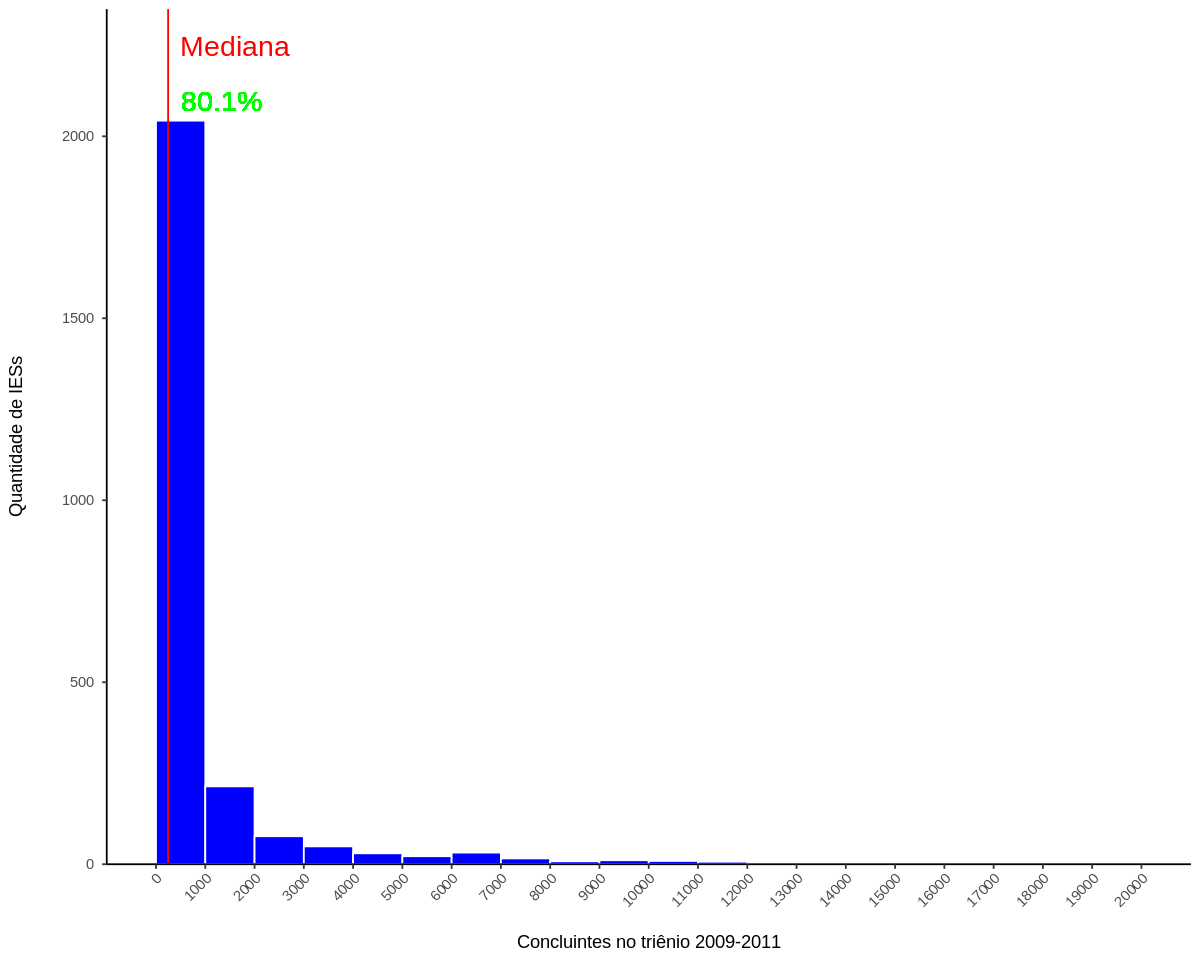

In [ ]:
################################################
#  Histograma do total de concluintes por IES  #
################################################

# O código a seguir cria um histograma para visualizar a distribuição do número de 
# concluintes no triênio de 2009 a 2011 das Instituições de Ensino Superior (IES) 
# presentes no dataframe "df_trienio".
# Primeiramente, é realizado um agrupamento por CO_IES (Código da IES) e a soma 
# total dos concluintes (QT_CONCLUINTE_TOTAL) de cada instituição é calculada 
# utilizando as funções "group_by()", "summarize()" e "ungroup()". O resultado é 
# armazenado no objeto "grupo".
# O número de intervalos ("bins") para o histograma é definido como 100.
# Em seguida, é criado o histograma utilizando a função "hist()", passando os valores 
# de QT_CONCLUINTE_TOTAL do dataframe "grupo". O parâmetro "plot" é definido como 
# FALSE para evitar a exibição gráfica do histograma.
# A largura de cada barra é calculada a partir dos intervalos do histograma utilizando 
# a função "diff()" e armazenada na variável "bar_width".
# O objeto "plot" é criado com a função "ggplot()", utilizando um dataframe com as 
# colunas "x" (médias dos intervalos do histograma) e "y" (contagens das observações 
# em cada intervalo) como dados. São adicionadas as camadas estéticas, como as barras 
# com a função "geom_bar()", os rótulos dos eixos com a função "labs()", as escalas 
# dos eixos com a função "scale_x_continuous()" e "scale_y_continuous()", configurações 
# estéticas e de tema com a função "theme()", e configuração do limite dos eixos 
# com a função "coord_cartesian()".
# A quantidade total de concluintes é calculada através do comprimento do vetor de 
# QT_CONCLUINTE_TOTAL das instituições. São calculadas as porcentagens correspondentes 
# às contagens de cada intervalo do histograma em relação ao total de instituições, 
# e é identificado o índice do intervalo com a contagem máxima.
# Se a porcentagem correspondente ao intervalo com a contagem máxima for maior ou 
# igual a 2%, um texto é adicionado ao gráfico utilizando a função "geom_text()" 
# para exibir essa porcentagem.
# O valor da mediana dos concluintes totais é calculado e uma linha vertical é 
# adicionada ao gráfico com a função "geom_vline()". Também é adicionado um texto 
# indicando a mediana utilizando a função "annotate()".
# O resultado final é a exibição do histograma com as barras representando a quantidade 
# de IESs em cada intervalo de concluintes, destacando a porcentagem correspondente 
# ao intervalo com a maior contagem e marcando a posição da mediana. Isso permite 
# visualizar a distribuição dos concluintes no triênio 2009-2011 e identificar 
# informações relevantes, como a concentração de IESs em determinadas faixas de 
# concluintes e a posição da mediana.

options(repr.plot.width=10, repr.plot.height=8)

# group by 'CO_IES' and sum 'QT_CONCLUINTE_TOTAL'
grupo <- df_trienio %>%
  group_by(CO_IES) %>%
  summarize(QT_CONCLUINTE_TOTAL = sum(QT_CONCLUINTE_TOTAL)) %>%
  ungroup()

bins <- 100

# create histogram
hist <- hist(grupo$QT_CONCLUINTE_TOTAL, breaks = bins, plot = FALSE)

# calculate width of each bar
bar_width <- diff(hist$breaks)[1]

# create plot
plot <- ggplot(data = data.frame(x = hist$mids, y = hist$counts),
               aes(x = x, y = y)) +
  geom_bar(stat = "identity", width = bar_width,
           color = "white", fill = "blue") +
  labs(x = "\nConcluintes no triênio 2009-2011",
       y = "Quantidade de IESs\n") +
  scale_x_continuous(limits = c(0, max(df_trienio$QT_CONCLUINTE_TOTAL)),
                     breaks = seq(0, max(df_trienio$QT_CONCLUINTE_TOTAL),
                                   by = 1000)) +
  scale_y_continuous(limits = c(0, max(hist$counts) + 0.15 * max(hist$counts)),
                     expand = c(0, 0)) + # set y-axis to start at 0
  coord_cartesian(xlim = c(0, max(df_trienio$QT_CONCLUINTE_TOTAL)), ylim = c(0, NA)) + # set limits
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.text.y = element_text(margin = margin(r = 5)),
        axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))

# add percentage label
total <- length(grupo$QT_CONCLUINTE_TOTAL)
percentages <- (hist$counts / total) * 100
max_index <- which.max(hist$counts)

if (percentages[max_index] >= 2) {
  plot <- plot +
    geom_text(aes(x = hist$mids[max_index], y = hist$counts[max_index],
                  label = paste0(sprintf("%.1f", percentages[max_index]), "%")),
              hjust = 0, vjust = -0.5, color = "green", size = 6)
}

# add median line and label
median <- median(grupo$QT_CONCLUINTE_TOTAL)
plot <- plot +
  geom_vline(xintercept = median, color = "red") +
  annotate("text", x = median * 1.05, y = max(hist$counts) * 1.1,
           label = "Mediana", color = "red", size = 6, hjust = -.1)
plot

## 10. Download 

**10.1 Dataframes**

Para fazer o download de arquivos CSV na versão R do Google Colab, pode-se utilizar os comandos *write.csv()* ou *write.table()* para salvar os data frames em formato CSV. Em seguida, para fazer o download do arquivo, basta clicar com o botão direito no arquivo na seção "Arquivos" do menu lateral e selecionar a opção "Download". O arquivo será baixado para a pasta de downloads padrão do navegador

In [ ]:
######################################
#   Arqquivo CSV com separador ','   #
######################################

# Este código realiza a escrita de um dataframe chamado "df_trienio" em um arquivo 
# CSV chamado "df_trienio_1.csv". A função utilizada é "write.csv()", que permite 
# salvar dados em formato CSV. O parâmetro "df_trienio" especifica o dataframe a 
# ser gravado, o segundo argumento "df_trienio_1.csv" é o nome do arquivo de saída, 
# e o parâmetro "row.names = FALSE" indica que as linhas do dataframe não serão 
# incluídas como uma coluna separada no arquivo CSV. Dessa forma, o código cria um 
# arquivo CSV contendo os dados do dataframe "df_trienio", que pode ser posteriormente 
# utilizado para armazenar ou compartilhar os dados em um formato amplamente compatível 
# e legível por outros softwares.

write.csv(df_trienio, "df_trienio_1.csv", row.names = FALSE)

In [ ]:
#####################################################################
#   Arqquivo CSV com separador diferente de vírgula, no caso, '|'   #
#####################################################################

# O código acima realiza a escrita de um dataframe chamado "df_trienio" em um 
# arquivo CSV chamado "df_trienio_2.csv". A função utilizada é "write.table()", 
# que permite salvar dados em formato de tabela. No caso desse código, o parâmetro 
# "df_trienio" especifica o dataframe a ser gravado, o segundo argumento "df_trienio_2.csv" 
# é o nome do arquivo de saída, e o parâmetro "sep = "|"" define o caractere de 
# separação a ser utilizado, nesse caso, o caractere "|". O parâmetro "row.names = FALSE" 
# indica que as linhas do dataframe não serão incluídas como uma coluna separada no 
# arquivo CSV. Dessa forma, o código cria um arquivo CSV com os dados do dataframe 
# "df_trienio", utilizando o caractere "|" como separador entre as colunas. Esse 
# formato de arquivo pode ser útil quando se deseja utilizar um separador diferente 
# da vírgula padrão ou quando é necessário garantir a compatibilidade com outros 
# sistemas que utilizam o caractere "|" como separador de campo.

write.table(df_trienio, "df_trienio_2.csv", sep = "|", row.names = FALSE)

**10.2 Gráficos**

O código *ggsave()* é utilizado para salvar um gráfico produzido pelo pacote ggplot2 em um arquivo com determinado formato, neste caso, o formato .png. Os parâmetros utilizados incluem o nome do arquivo, "grafico_barras_trienio_concluintes.png", que será criado no diretório de trabalho atual. Os parâmetros *width* e *height* definem a largura e altura do gráfico em polegadas, respectivamente, enquanto o parâmetro *dpi* define a resolução em pontos por polegada. Por fim, o objeto p, que representa o gráfico produzido previamente, é salvo como um arquivo .png no diretório de trabalho atual com as dimensões e resolução especificadas.

In [ ]:
#################
#    Gráfico    #
#################

options(repr.plot.width=10, repr.plot.height=8)

soma_concluintes_por_ano <- df_trienio %>%
  group_by(NU_ANO_CENSO) %>%
  summarise(QT_CONCLUINTE_TOTAL = sum(QT_CONCLUINTE_TOTAL)) %>%
  mutate(NU_ANO_CENSO = as.character(NU_ANO_CENSO))

p <- ggplot(soma_concluintes_por_ano, aes(x = NU_ANO_CENSO, y = QT_CONCLUINTE_TOTAL)) +
  geom_bar(stat = 'identity', fill = 'blue') +
  labs(x = 'Ano', y = 'Total de concluintes') +
  scale_y_continuous(labels = scales::comma, expand = c(0,0), limits = c(0, max(soma_concluintes_por_ano$QT_CONCLUINTE_TOTAL) * 1.1), breaks = seq(0, max(soma_concluintes_por_ano$QT_CONCLUINTE_TOTAL) * 1.1, by = 200000)) +
  expand_limits(y = 0) +
  theme_minimal() +
  theme(
    plot.background = element_rect(fill = "white"),
    panel.background = element_rect(fill = "white"),
    plot.title = element_text(size = 20),
    axis.title = element_text(size = 16),
    axis.text = element_text(size = 14),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    legend.position = "bottom",
    legend.title = element_blank()
  ) +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.title.x = element_text(margin = margin(t = 10, r = 0, b = 0, l = 0)),
    axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))
  ) +
  theme(
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  ) +
  theme(
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  ) +
  theme(
    plot.background = element_rect(fill = "white", size = 2, color = "black"),
    panel.background = element_rect(fill = "white", size = 2, color = "black")
  )

ggsave("grafico_barras_trienio_concluitntes.png", p, width = 10, height = 8, dpi = 300)

# p

Para fazer o download de gráficos na versão R do Google Colab, basta clicar no ícone "Arquivos" na barra lateral esquerda, navegar até o diretório de trabalho onde o arquivo está salvo e clicar no botão "Download" ao lado do nome do arquivo. Isso fará com que o arquivo seja baixado para o computador local em que o Google Colab está sendo acessado. É importante lembrar que, antes de fazer o download, é necessário ter certeza de que o arquivo foi salvo no diretório correto do Google Colab.

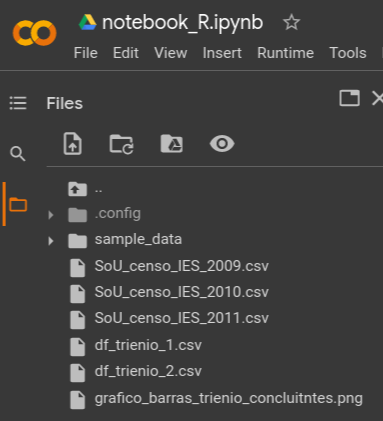

## 11. Documentação R

Ao longo deste tutorial, foram abordados os principais tópicos envolvidos na Análise Exploratória de Dados. Contudo, a depender das necessidades de pesquisa, existe ainda um acervo imenso  a ser explorado de ferramentas R focadas especificamente em Ciência de Dados. 

Um requisito fundamental para qualquer Cientista de Dados é acessar, quase que diariamente, a documentação técnica das bibliotecas utilizadas em seus projetos, esta documentação é uma espécie de "manual de intruções" abrangendo todas as ferramentas contidas numa determinada biblioteca R.

A equipe de Dados do SoU_Ciência elenca abaixo os links com todas as documentaçoes técnicas das bibliotecas R usadas neste tutorial, para que você explore e aprenda todas as potencialidades do R.

readr \\

<https://readr.tidyverse.org/>

dplyr \\

<https://www.rdocumentation.org/packages/dplyr/versions/0.7.8>

tidyverse \\

<https://www.tidyverse.org/>

tibble \\

<https://cran.r-project.org/web/packages/tibble/tibble.pdf>

tidyr \\

<https://cran.r-project.org/web/packages/tidyr/tidyr.pdf>

ggplot2 \\

<https://ggplot2.tidyverse.org/>

viridis \\

<https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html>

ggforce \\

<https://cran.r-project.org/web/packages/ggforce/ggforce.pdf>

reshape2 \\

<https://cran.r-project.org/web/packages/reshape2/reshape2.pdf>

RColorBrewer \\

<https://cran.r-project.org/web/packages/RColorBrewer/RColorBrewer.pdf>

gridExtra \\

<https://cran.r-project.org/web/packages/gridExtra/gridExtra.pdf>

IRdisplay \\

<https://cran.r-project.org/web/packages/IRdisplay/IRdisplay.pdf>

# Contato

Agradecemos todas as críticas e sugestões recebidas de pesquisadores e usuários que estão colaborando para a melhoria na qualidade da prestação das informações. 
Qualquer sugestão ou dúvida pode ser encaminhada para o e-mail <souciencia@unifesp.br>. 

# Obrigado

A equipe de Dados do SoU_Ciência elaborou este tutorial para auxiliar a todos os interessados em trabalhar com os nossos bancos de dados a terem um primeiro contato com o mundo das linguagens de programação. Contudo, para os mais experientes, este material ainda constitui um ótimo guia rápido de acesso à informação para o dia a dia, agilizando a rotina de trabalho dos Cientistas de Dados.

O SoU_Ciência deseja todo o sucesso em sua pesquisa e conte conosco ao longo desta incrível jornada.

In [ ]:
#@title
display_html("<marquee style='width: 60%;'>
                 <b style='font-size: 30px;'>Sucesso!!!!</b>
              </marquee>")

Sucesso!!!!

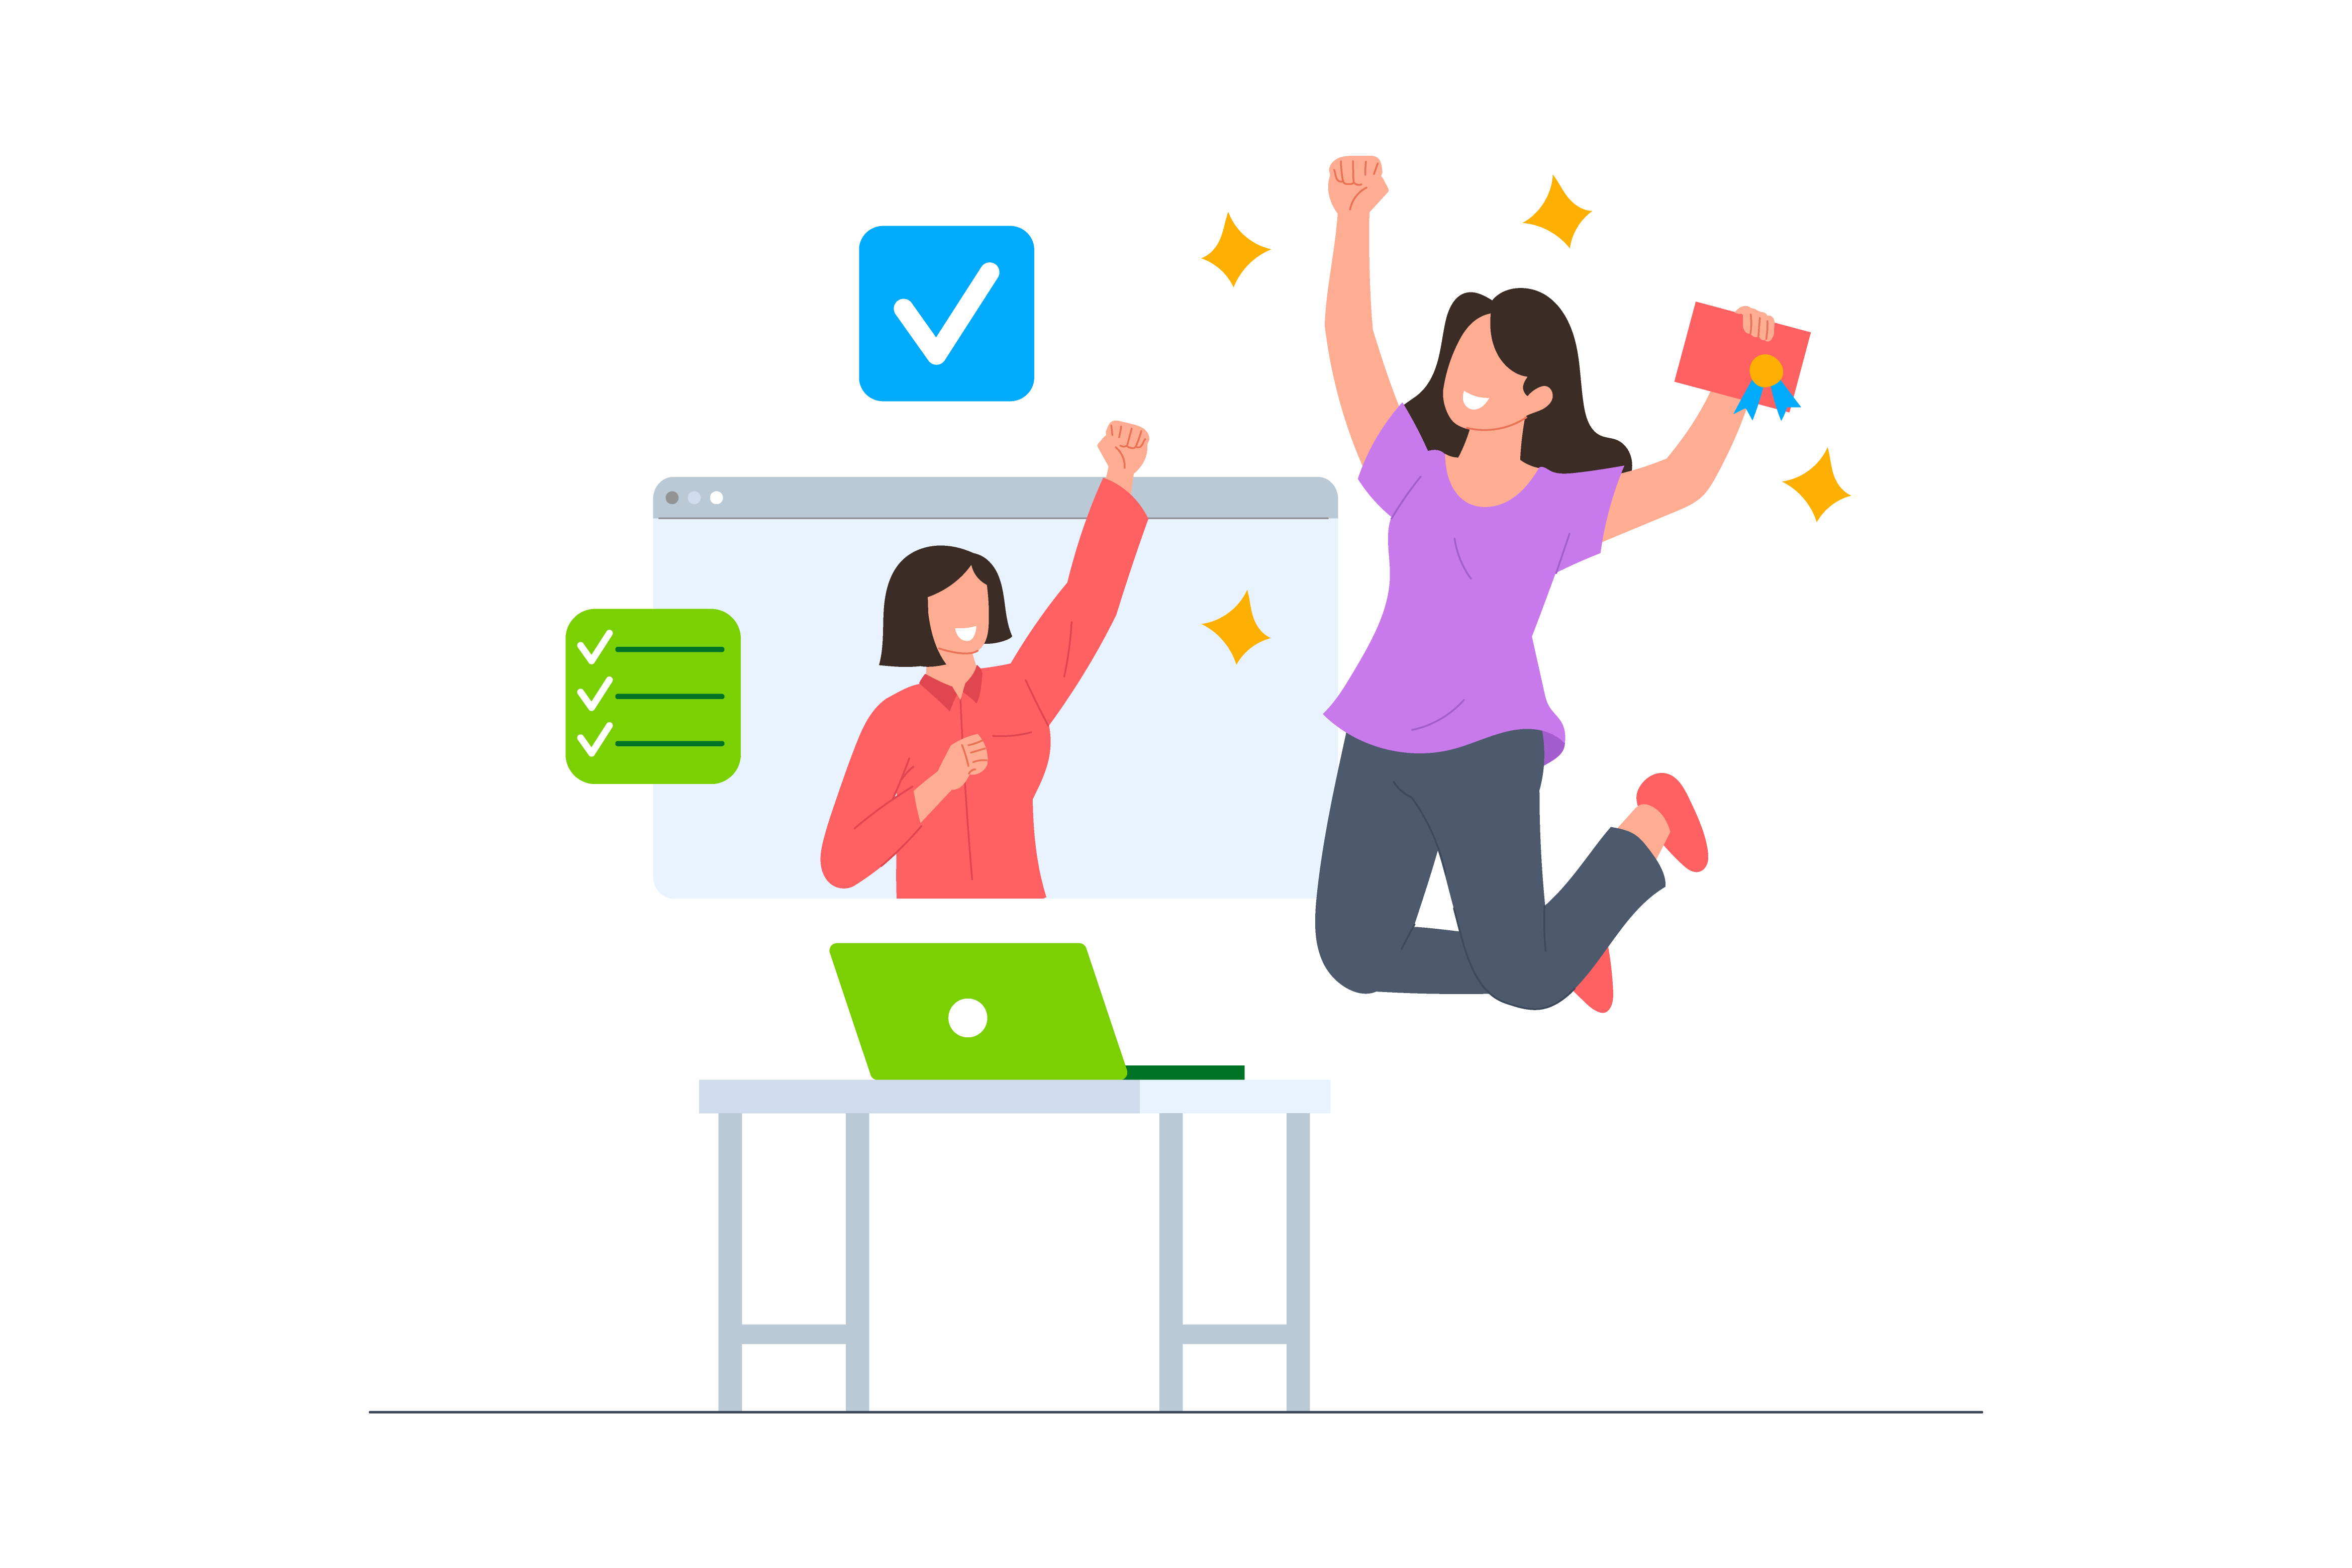